     TICKER PER      DATE  TIME    OPEN    HIGH     LOW   CLOSE        VOL
0      SBER   D  20130603     0   97.79  100.65   96.88   98.70  102004920
1      SBER   D  20130604     0   99.73  101.50   98.73   98.79   79600700
2      SBER   D  20130605     0   98.21   99.20   97.20   97.50   80424380
3      SBER   D  20130606     0   97.25   98.15   96.30   96.80   65533080
4      SBER   D  20130607     0   97.64   99.56   96.93   99.20   79715290
...     ...  ..       ...   ...     ...     ...     ...     ...        ...
2023   SBER   D  20210616     0  312.50  314.54  311.03  311.61   38224960
2024   SBER   D  20210617     0  311.00  315.42  310.46  313.90   44164540
2025   SBER   D  20210618     0  313.44  313.82  308.13  309.30   62327060
2026   SBER   D  20210621     0  308.45  310.40  306.56  310.40   36086020
2027   SBER   D  20210622     0  310.79  311.17  309.00  309.57    6834320

[2028 rows x 9 columns]


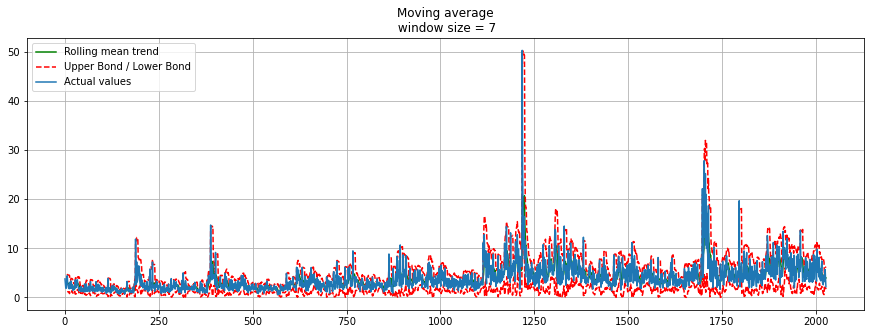

In [1]:
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt
dataset = pd.read_csv("SBER_5.csv",sep=',')
df = pd.DataFrame(dataset, columns=['TICKER','PER','DATE','TIME','OPEN','HIGH','LOW','CLOSE','VOL'])
print(df)
def moving_average(series, n):
    return np.average(series[-n:])

moving_average(dataset['OPEN'], 24)
def plotMovingAverage(series, n):

    """
    series - dataframe with timeseries
    n - rolling window size 

    """

    rolling_mean = series.rolling(window=n).mean()

    # При желании, можно строить и доверительные интервалы для сглаженных значений
    rolling_std =  series.rolling(window=n).std()
    upper_bond = rolling_mean+1.96*rolling_std
    lower_bond = abs(rolling_mean-1.96*rolling_std)

    plt.figure(figsize=(15,5))
    plt.title("Moving average\n window size = {}".format(n))
    plt.plot(rolling_mean, "g", label="Rolling mean trend")

    plt.plot(upper_bond, "r--", label="Upper Bond / Lower Bond")
    plt.plot(lower_bond, "r--")
    plt.plot(df["HIGH"]-df["LOW"], label="Actual values")
    plt.legend(loc="upper left")
    plt.grid(True)
plotMovingAverage(df["HIGH"]-df["LOW"], 7)

In [71]:
df["RV1"] = np.zeros(len(df["HIGH"]))
df["RV5"] = np.zeros(len(df["HIGH"]))
df["RV21"] = np.zeros(len(df["HIGH"]))
df["DELTA"] = df["HIGH"] - df["LOW"]
df["RV1"][1:] = df["DELTA"][:-1]
df["RV1"][0] = 0
for i in range(len(df["HIGH"])):
    for j in range(2,6):
        df["RV5"][i] += df["DELTA"][max(i-j,0)] 
    df["RV5"][i] /= 4
for i in range(len(df["HIGH"])):
    for j in range(7,22):
        df["RV21"][i] += df["DELTA"][max(i-j,0)] 
    df["RV21"][i] /= 15
train = []
a = df['RV1'].tolist()
b = df['RV5'].tolist()
c = df['RV21'].tolist()
for i in range(len(df["HIGH"])):
    train.append([a[i], b[i], c[i]])
from sklearn.linear_model import SGDRegressor
from sklearn import linear_model
clf = linear_model.SGDRegressor()
clf.fit(train[:int(0.75*len(train))], df["DELTA"][:int(0.75*len(train))])
clf.coef_
predict = np.sum(np.array((clf.coef_ * train[int(0.75*len(train)):])),axis=1).tolist()
#df["PREDICT"] = predict
#p = df["PREDICT"]
#delta = df["DELTA"]

Test MSE: 6.675
507


<Figure size 432x288 with 0 Axes>

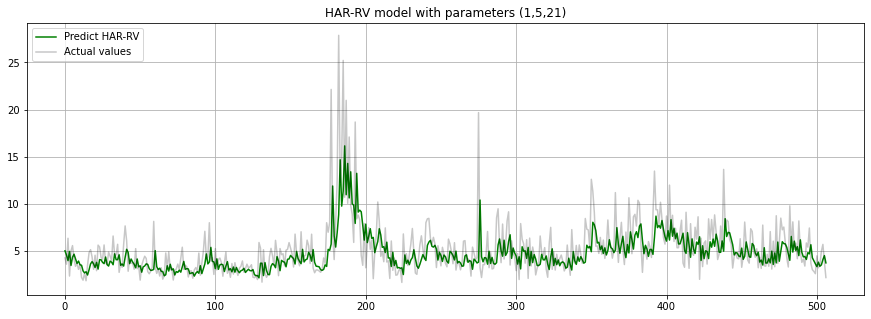

In [78]:
plt.clf()
plt.figure(figsize=(15,5))
plt.title("HAR-RV model with parameters (1,5,21)")
plt.plot(predict, "g", label="Predict HAR-RV")
plt.plot(df["DELTA"].values[int(0.75*len(train)):], "#0a0b0c3a",label="Actual values")
plt.legend(loc="upper left")
plt.grid(True)
error = mean_squared_error(df["DELTA"][int(0.75*len(train)):], predict)
print('Test MSE: %.3f' % error)
print(len(predict))
pred = predict

In [68]:
import sys
import warnings
warnings.filterwarnings('ignore')
from tqdm import tqdm

import pandas as pd
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

import statsmodels.formula.api as smf
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs
from scipy.optimize import minimize

import matplotlib.pyplot as plt
dataset_1 = pd.read_csv("SBERP.csv",sep=';')
df_1 = pd.DataFrame(dataset_1, columns=['TICKER','PER','DATE','TIME','OPEN','HIGH','LOW','CLOSE','VOL'])
print(df_1)

    TICKER PER      DATE  TIME    OPEN    HIGH     LOW   CLOSE      VOL
0    SBERP   D  20180601     0  195.40  196.85  194.94  196.02  3050100
1    SBERP   D  20180604     0  196.46  198.48  194.89  195.39  8052100
2    SBERP   D  20180605     0  195.30  196.09  191.08  191.30  5361700
3    SBERP   D  20180606     0  192.01  193.88  191.30  193.10  3054800
4    SBERP   D  20180607     0  194.20  194.82  192.50  192.50  2813200
..     ...  ..       ...   ...     ...     ...     ...     ...      ...
767  SBERP   D  20210616     0  291.33  293.10  289.52  291.00  4395110
768  SBERP   D  20210617     0  290.03  292.85  289.82  290.91  4092140
769  SBERP   D  20210618     0  291.00  291.36  285.11  286.70  5125090
770  SBERP   D  20210621     0  285.83  286.74  283.56  286.67  4106120
771  SBERP   D  20210622     0  287.63  288.05  284.75  285.71   737910

[772 rows x 9 columns]


In [69]:
df_1["RV1"] = np.zeros(len(df_1["HIGH"]))
df_1["RV5"] = np.zeros(len(df_1["HIGH"]))
df_1["RV21"] = np.zeros(len(df_1["HIGH"]))
df_1["DELTA"] = df_1["HIGH"] - df_1["LOW"]
df_1["RV1"][1:] = df_1["DELTA"][:-1]
df_1["RV1"][0] = 0
for i in range(len(df_1["HIGH"])):
    for j in range(1,6):
        df_1["RV5"][i] += df_1["DELTA"][max(i-j,0)] 
    df_1["RV5"][i] /= 5
for i in range(len(df_1["HIGH"])):
    for j in range(1,22):
        df_1["RV21"][i] += df_1["DELTA"][max(i-j,0)] 
    df_1["RV21"][i] /= 21
df_1

,TICKER,PER,DATE,TIME,OPEN,HIGH,LOW,CLOSE,VOL,RV1,RV5,RV21,DELTA
0,SBERP,D,20180601,0,195.40,196.85,194.94,196.02,3050100,0.00,1.910,1.910000,1.91
1,SBERP,D,20180604,0,196.46,198.48,194.89,195.39,8052100,1.91,1.910,1.910000,3.59
2,SBERP,D,20180605,0,195.30,196.09,191.08,191.30,5361700,3.59,2.246,1.990000,5.01
3,SBERP,D,20180606,0,192.01,193.88,191.30,193.10,3054800,5.01,2.866,2.137619,2.58
4,SBERP,D,20180607,0,194.20,194.82,192.50,192.50,2813200,2.58,3.000,2.169524,2.32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,SBERP,D,20210616,0,291.33,293.10,289.52,291.00,4395110,2.48,2.506,3.823333,3.58
768,SBERP,D,20210617,0,290.03,292.85,289.82,290.91,4092140,3.58,2.720,3.887619,3.03
769,SBERP,D,20210618,0,291.00,291.36,285.11,286.70,5125090,3.03,2.808,3.773810,6.25
770,SBERP,D,20210621,0,285.83,286.74,283.56,286.67,4106120,6.25,3.594,3.864762,3.18


In [70]:
validation = []
a_v = df_1['RV1'].tolist()
b_v = df_1['RV5'].tolist()
c_v = df_1['RV21'].tolist()
for i in range(len(df_1["HIGH"])):
    validation.append([a_v[i], b_v[i], c_v[i]])
predict_v = np.sum(np.array((clf.coef_ * validation)),axis=1).tolist()
df_1["PREDICT"] = predict_v
pred = df_1["PREDICT"]
delta_v = df_1["DELTA"]

Test MSE: 3.968
772


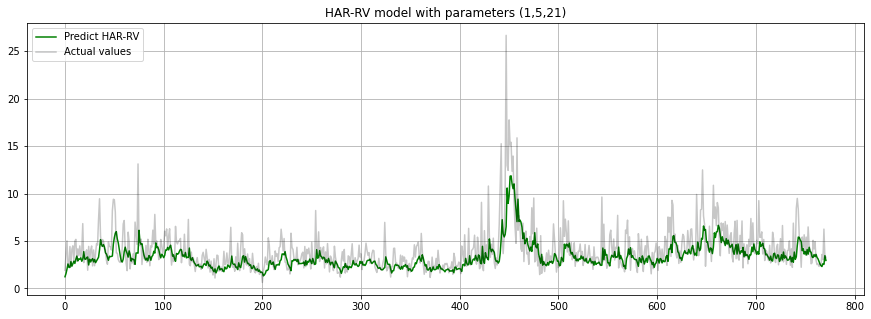

In [126]:
plt.figure(figsize=(15,5))
plt.title("HAR-RV model with parameters (1,5,21)")
plt.plot(pred, "g", label="Predict HAR-RV")
plt.plot(delta_v, "#0a0b0c3a",label="Actual values")
plt.legend(loc="upper left")
plt.grid(True)
error = mean_squared_error(pred, delta_v)
print('Test MSE: %.3f' % error)
print(len(pred))

In [3]:
import statsmodels.tsa.arima_model as stm
import pmdarima
model = stm.ARIMA(df.HIGH, order=(3,1,2))
model_fit = model.fit()
# one-step out-of sample forecast
forecast = model_fit.forecast()
print(forecast)

(array([311.73934947]), array([2.86040345]), array([[306.13306172, 317.34563722]]))


2028
Test MSE: 6.440


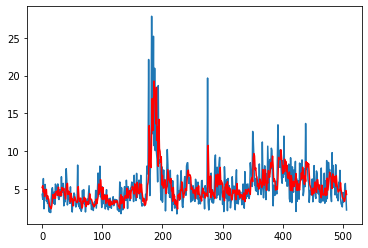

In [63]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
X = abs(df.HIGH.values-df.LOW.values)
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
print(len(X))
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	history.append(test[t])
	#print('predicted=%f, expected=%f' % (yhat, test[t]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
from matplotlib import pyplot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Test MSE: 6.440


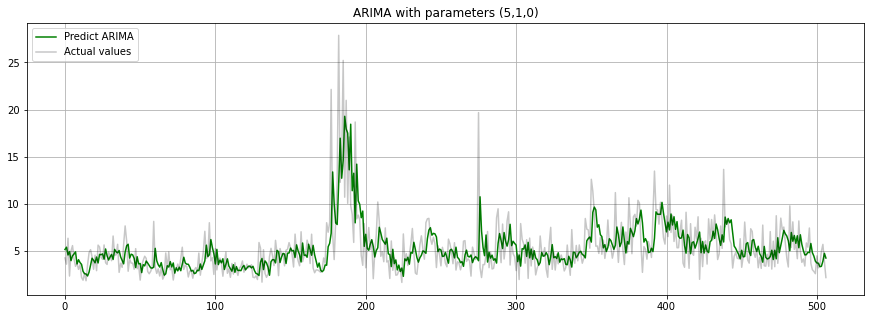

In [64]:
plt.figure(figsize=(15,5))
plt.title("ARIMA with parameters (5,1,0)")
plt.plot(predictions, "g", label="Predict ARIMA")
plt.plot(test, "#0a0b0c3a",label="Actual values")
plt.legend(loc="upper left")
plt.grid(True)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

2028
Test MSE: 7.842
507


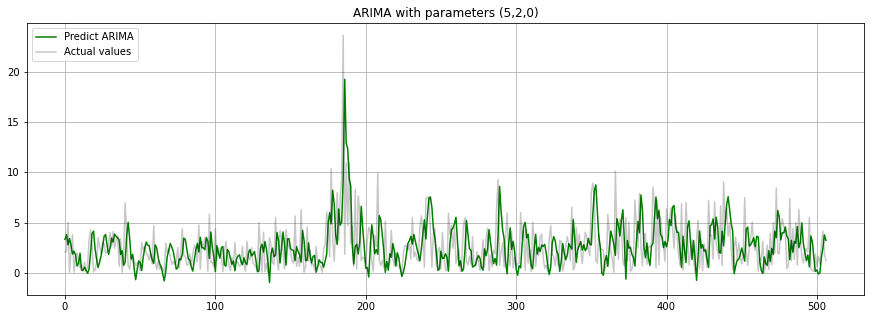

In [13]:
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
X = abs(df.CLOSE.values-df.OPEN.values)
size = int(len(X) * 0.75)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
print(len(X))
for t in range(len(test)):
	model = ARIMA(history, order=(5,2,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	history.append(test[t])
	#print('predicted=%f, expected=%f' % (yhat, test[t]))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
plt.figure(figsize=(15,5))
plt.title("ARIMA with parameters (5,1,0)")
plt.plot(predictions, "g", label="Predict ARIMA")
plt.plot(test, "#0a0b0c3a",label="Actual values")
plt.legend(loc="upper left")
plt.grid(True)
print(len(test))

In [6]:
import datetime as dt

import pandas_datareader.data as web

from arch import arch_model

start = dt.datetime(2000, 1, 1)
end = dt.datetime(2014, 1, 1)
sp500 = web.DataReader('^GSPC', 'yahoo', start=start, end=end)
returns = 100 * sp500['Adj Close'].pct_change().dropna()
am = arch_model(returns)

In [16]:
from arch.univariate import ConstantMean, GARCH, Normal

am = ConstantMean(returns)
am.volatility = GARCH(1, 0, 1)
am.distribution = Normal()

In [17]:
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 68805887221245.24
Iteration:      2,   Func. Count:     15,   Neg. LLF: 992324913.2402544
Iteration:      3,   Func. Count:     22,   Neg. LLF: 5194.44960224228
Iteration:      4,   Func. Count:     28,   Neg. LLF: 5190.74248279387
Iteration:      5,   Func. Count:     34,   Neg. LLF: 5191.570239774386
Iteration:      6,   Func. Count:     40,   Neg. LLF: 5150.829238021715
Iteration:      7,   Func. Count:     46,   Neg. LLF: 6474.502101702887
Iteration:      8,   Func. Count:     53,   Neg. LLF: 5143.161835660345
Iteration:      9,   Func. Count:     59,   Neg. LLF: 5141.392119880293
Iteration:     10,   Func. Count:     64,   Neg. LLF: 5141.390235767365
Iteration:     11,   Func. Count:     69,   Neg. LLF: 5141.39023050538
Iteration:     12,   Func. Count:     73,   Neg. LLF: 5141.390230506618
Optimization terminated successfully    (Exit mode 0)
            Current function value: 5141.39023050538
            Iterations: 12
     

In [27]:
train = (df.HIGH-df.LOW).values[:int(len(df.HIGH)*0.70)]
am = arch_model(returns)
am = ConstantMean(returns)
am.volatility = GARCH(1, 0, 1)
am.distribution = Normal()
res = am.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 14931.555140964389
Iteration:      2,   Func. Count:     17,   Neg. LLF: 46920838461.744995
Iteration:      3,   Func. Count:     24,   Neg. LLF: 4682.256708421666
Iteration:      4,   Func. Count:     31,   Neg. LLF: 4519.429941664674
Iteration:      5,   Func. Count:     37,   Neg. LLF: 4528.8189599935195
Iteration:      6,   Func. Count:     43,   Neg. LLF: 4492.873714900092
Iteration:      7,   Func. Count:     49,   Neg. LLF: 4471.547646694746
Iteration:      8,   Func. Count:     55,   Neg. LLF: 4478.1241576133025
Iteration:      9,   Func. Count:     61,   Neg. LLF: 4449.919597651673
Iteration:     10,   Func. Count:     67,   Neg. LLF: 4390.537730399772
Iteration:     11,   Func. Count:     73,   Neg. LLF: 4367.16252219464
Iteration:     12,   Func. Count:     78,   Neg. LLF: 4366.947354549249
Iteration:     13,   Func. Count:     83,   Neg. LLF: 4366.4441157487445
Iteration:     14,   Func. Count:     88,   Neg. LLF: 4366.3

In [29]:
yhat = res.forecast(horizon=10)

In [64]:
model = arch_model((df.CLOSE-df.OPEN).values[1990:2000],vol='ARCH', p=15)


In [65]:
test = (df.HIGH).values[int(len(df.HIGH)*0.96):]

In [69]:
yhat = model.forecast(test,horizon=10)

In [70]:
yhat.variance[-1:]

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10
1418,8.820338e+10,4.980046e+13,2.812175e+16,1.588004e+19,8.967282e+21,5.063724e+24,2.859429e+27,1.614687e+30,9.117960e+32,5.148810e+35


In [68]:
model = arch_model(train, mean='Zero', vol='GARCH', p=15, q=15)

In [79]:
# example of ARCH model
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
# seed pseudorandom number generator
# create dataset
#data = [gauss(0, i*0.01) for i in range(0,100)]
# split into train/test
predict = []
test = []
for i in range(507,0,-1):
    data = (df.HIGH - df.LOW)[-i-20:-i]
    n_test = 1
    train = data[:-n_test-1]
    # define model
    model = arch_model(train, mean='Zero', vol='GARCH', p=10, q=7)
    # fit model
    model_fit = model.fit()
    # forecast the test set
    yhat = model_fit.forecast(horizon=n_test)
    # plot the actual variance
    #var = [i*0.01 for i in range(0,100)]
    predict.append(np.sqrt(np.array(yhat.variance.values[-1, :])))
    test.append(data[-1:])
    #pyplot.plot(test.values)
    # plot forecast variance
    #pyplot.plot(np.sqrt(np.array(yhat.variance.values[-1, :])), color='r')
    #pyplot.show()
    #tmp = 
"""plt.figure(figsize=(20,10))
plt.title("GARCH")
plt.plot(predict, "g", label="Predict GARCH")
plt.plot(pred, "o", label="Predict HAR-RV")
plt.plot(predictions, "r", label="Predict ARIMA")
plt.plot(test, "#0a0b0c3a",label="Actual values")
plt.legend(loc="upper left")
plt.grid(True)"""
#error = mean_squared_error(test, predict)
#print('Test MSE: %.3f' % error)
#print(len(test))

Iteration:      1,   Func. Count:     20,   Neg. LLF: 58.086453539844676
Iteration:      2,   Func. Count:     40,   Neg. LLF: 57.85247765123617
Iteration:      3,   Func. Count:     59,   Neg. LLF: 59.31748105135363
Iteration:      4,   Func. Count:     79,   Neg. LLF: 57.811550227113635
Iteration:      5,   Func. Count:     99,   Neg. LLF: 57.71402896647789
Iteration:      6,   Func. Count:    118,   Neg. LLF: 57.74378385206506
Iteration:      7,   Func. Count:    138,   Neg. LLF: 57.71154813740736
Iteration:      8,   Func. Count:    157,   Neg. LLF: 57.71123329194515
Iteration:      9,   Func. Count:    176,   Neg. LLF: 57.710062216959464
Iteration:     10,   Func. Count:    195,   Neg. LLF: 57.708152192696076
Iteration:     11,   Func. Count:    214,   Neg. LLF: 57.702308000201704
Iteration:     12,   Func. Count:    233,   Neg. LLF: 57.68844018668021
Iteration:     13,   Func. Count:    252,   Neg. LLF: 57.65495998950227
Iteration:     14,   Func. Count:    271,   Neg. LLF: 57.63

Iteration:     10,   Func. Count:    195,   Neg. LLF: 56.953102964237175
Iteration:     11,   Func. Count:    214,   Neg. LLF: 56.952784785477185
Iteration:     12,   Func. Count:    233,   Neg. LLF: 56.95180056899484
Iteration:     13,   Func. Count:    252,   Neg. LLF: 56.95068570743775
Iteration:     14,   Func. Count:    271,   Neg. LLF: 56.94531105971663
Iteration:     15,   Func. Count:    290,   Neg. LLF: 56.93331195381858
Iteration:     16,   Func. Count:    309,   Neg. LLF: 56.897943884581565
Iteration:     17,   Func. Count:    328,   Neg. LLF: 56.86316187802919
Iteration:     18,   Func. Count:    347,   Neg. LLF: 56.832090201383906
Iteration:     19,   Func. Count:    366,   Neg. LLF: 56.83093175019822
Iteration:     20,   Func. Count:    385,   Neg. LLF: 56.8307855351181
Iteration:     21,   Func. Count:    404,   Neg. LLF: 56.83076838506321
Iteration:     22,   Func. Count:    423,   Neg. LLF: 56.83076715932408
Iteration:     23,   Func. Count:    441,   Neg. LLF: 56.8307

Iteration:      1,   Func. Count:     20,   Neg. LLF: 65.61729849749486
Iteration:      2,   Func. Count:     41,   Neg. LLF: 55.15414223931099
Iteration:      3,   Func. Count:     60,   Neg. LLF: 55.12151759587206
Iteration:      4,   Func. Count:     79,   Neg. LLF: 55.11177163162655
Iteration:      5,   Func. Count:     98,   Neg. LLF: 55.111518983176445
Iteration:      6,   Func. Count:    117,   Neg. LLF: 55.11141495216129
Iteration:      7,   Func. Count:    136,   Neg. LLF: 55.111129508079564
Iteration:      8,   Func. Count:    155,   Neg. LLF: 55.11033941536656
Iteration:      9,   Func. Count:    174,   Neg. LLF: 55.10843586028817
Iteration:     10,   Func. Count:    193,   Neg. LLF: 55.10387373199837
Iteration:     11,   Func. Count:    212,   Neg. LLF: 55.09377195134669
Iteration:     12,   Func. Count:    231,   Neg. LLF: 55.07710474108883
Iteration:     13,   Func. Count:    250,   Neg. LLF: 55.06654822210418
Iteration:     14,   Func. Count:    269,   Neg. LLF: 55.06797

Iteration:     14,   Func. Count:    268,   Neg. LLF: 52.91450298043771
Iteration:     15,   Func. Count:    287,   Neg. LLF: 52.92147474874398
Iteration:     16,   Func. Count:    307,   Neg. LLF: 52.913595677698076
Iteration:     17,   Func. Count:    326,   Neg. LLF: 52.91359070400176
Iteration:     18,   Func. Count:    344,   Neg. LLF: 52.91359070932658
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.91359070400176
            Iterations: 18
            Function evaluations: 344
            Gradient evaluations: 18
Iteration:      1,   Func. Count:     20,   Neg. LLF: 55.82797507357528
Iteration:      2,   Func. Count:     40,   Neg. LLF: 52.555110571003006
Iteration:      3,   Func. Count:     59,   Neg. LLF: 52.501736819193184
Iteration:      4,   Func. Count:     78,   Neg. LLF: 52.524198303313234
Iteration:      5,   Func. Count:     98,   Neg. LLF: 52.49333520621226
Iteration:      6,   Func. Count:    117,   Neg. LLF: 52.490092003

Iteration:      7,   Func. Count:    136,   Neg. LLF: 49.904584843860356
Iteration:      8,   Func. Count:    155,   Neg. LLF: 49.903034748430564
Iteration:      9,   Func. Count:    174,   Neg. LLF: 49.89666490907663
Iteration:     10,   Func. Count:    193,   Neg. LLF: 49.89336365327153
Iteration:     11,   Func. Count:    212,   Neg. LLF: 49.89182372480761
Iteration:     12,   Func. Count:    231,   Neg. LLF: 49.891570664844394
Iteration:     13,   Func. Count:    250,   Neg. LLF: 49.89156745353312
Iteration:     14,   Func. Count:    268,   Neg. LLF: 49.89156746114756
Optimization terminated successfully    (Exit mode 0)
            Current function value: 49.89156745353312
            Iterations: 14
            Function evaluations: 268
            Gradient evaluations: 14
Iteration:      1,   Func. Count:     20,   Neg. LLF: 52.87372471825252
Iteration:      2,   Func. Count:     40,   Neg. LLF: 49.86614259318387
Iteration:      3,   Func. Count:     59,   Neg. LLF: 49.7941897245

Iteration:      6,   Func. Count:    118,   Neg. LLF: 49.27990616588818
Iteration:      7,   Func. Count:    137,   Neg. LLF: 49.279832314665555
Iteration:      8,   Func. Count:    156,   Neg. LLF: 49.27947553788091
Iteration:      9,   Func. Count:    175,   Neg. LLF: 49.278806442844036
Iteration:     10,   Func. Count:    194,   Neg. LLF: 49.277442437223044
Iteration:     11,   Func. Count:    213,   Neg. LLF: 49.275787759921286
Iteration:     12,   Func. Count:    232,   Neg. LLF: 49.27470006534586
Iteration:     13,   Func. Count:    251,   Neg. LLF: 49.27445431762816
Iteration:     14,   Func. Count:    270,   Neg. LLF: 49.274443180614725
Iteration:     15,   Func. Count:    288,   Neg. LLF: 49.27444318307643
Optimization terminated successfully    (Exit mode 0)
            Current function value: 49.274443180614725
            Iterations: 15
            Function evaluations: 288
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     20,   Neg. LLF: 49.8037453

Iteration:     13,   Func. Count:    250,   Neg. LLF: 50.98369442133333
Iteration:     14,   Func. Count:    269,   Neg. LLF: 50.983656059814464
Iteration:     15,   Func. Count:    287,   Neg. LLF: 50.98365606135146
Optimization terminated successfully    (Exit mode 0)
            Current function value: 50.983656059814464
            Iterations: 15
            Function evaluations: 287
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     20,   Neg. LLF: 52.38748931214631
Iteration:      2,   Func. Count:     41,   Neg. LLF: 51.55408786170356
Iteration:      3,   Func. Count:     60,   Neg. LLF: 51.52739132892417
Iteration:      4,   Func. Count:     79,   Neg. LLF: 51.527204902751734
Iteration:      5,   Func. Count:     99,   Neg. LLF: 51.52000894463107
Iteration:      6,   Func. Count:    118,   Neg. LLF: 51.51959625665517
Iteration:      7,   Func. Count:    137,   Neg. LLF: 51.51955693026176
Iteration:      8,   Func. Count:    156,   Neg. LLF: 51.5195439908

Iteration:      2,   Func. Count:     40,   Neg. LLF: 53.041362082748115
Iteration:      3,   Func. Count:     59,   Neg. LLF: 53.08234363886518
Iteration:      4,   Func. Count:     79,   Neg. LLF: 53.00583104815492
Iteration:      5,   Func. Count:     98,   Neg. LLF: 53.00294615560875
Iteration:      6,   Func. Count:    117,   Neg. LLF: 53.00238875770461
Iteration:      7,   Func. Count:    136,   Neg. LLF: 53.00224974372217
Iteration:      8,   Func. Count:    155,   Neg. LLF: 53.00216833854961
Iteration:      9,   Func. Count:    174,   Neg. LLF: 53.001969470660555
Iteration:     10,   Func. Count:    193,   Neg. LLF: 53.00153367605914
Iteration:     11,   Func. Count:    212,   Neg. LLF: 53.000459466594336
Iteration:     12,   Func. Count:    231,   Neg. LLF: 52.9979523008081
Iteration:     13,   Func. Count:    250,   Neg. LLF: 52.99236535201594
Iteration:     14,   Func. Count:    269,   Neg. LLF: 52.982898445347786
Iteration:     15,   Func. Count:    288,   Neg. LLF: 52.9768

Iteration:     15,   Func. Count:    287,   Neg. LLF: 53.64510093747536
Optimization terminated successfully    (Exit mode 0)
            Current function value: 53.64510093616427
            Iterations: 15
            Function evaluations: 287
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     20,   Neg. LLF: 54.22081782223058
Iteration:      2,   Func. Count:     41,   Neg. LLF: 53.9773609866516
Iteration:      3,   Func. Count:     60,   Neg. LLF: 53.882765444784056
Iteration:      4,   Func. Count:     79,   Neg. LLF: 53.98576327272979
Iteration:      5,   Func. Count:     99,   Neg. LLF: 53.84759721215484
Iteration:      6,   Func. Count:    118,   Neg. LLF: 53.84407830420685
Iteration:      7,   Func. Count:    137,   Neg. LLF: 53.843945512297445
Iteration:      8,   Func. Count:    156,   Neg. LLF: 53.843260115254274
Iteration:      9,   Func. Count:    175,   Neg. LLF: 53.84196406535506
Iteration:     10,   Func. Count:    194,   Neg. LLF: 53.83938020802

Iteration:      1,   Func. Count:     20,   Neg. LLF: 53.189897097519484
Iteration:      2,   Func. Count:     39,   Neg. LLF: 53.387088697184915
Iteration:      3,   Func. Count:     59,   Neg. LLF: 53.09584905137909
Iteration:      4,   Func. Count:     79,   Neg. LLF: 53.074912802527564
Iteration:      5,   Func. Count:     98,   Neg. LLF: 53.076271478588886
Iteration:      6,   Func. Count:    118,   Neg. LLF: 53.074285063371875
Iteration:      7,   Func. Count:    137,   Neg. LLF: 53.07383489225571
Iteration:      8,   Func. Count:    156,   Neg. LLF: 53.07172944592255
Iteration:      9,   Func. Count:    175,   Neg. LLF: 53.06588827474309
Iteration:     10,   Func. Count:    194,   Neg. LLF: 53.05353295894435
Iteration:     11,   Func. Count:    213,   Neg. LLF: 53.032693273430596
Iteration:     12,   Func. Count:    232,   Neg. LLF: 53.01874091416123
Iteration:     13,   Func. Count:    251,   Neg. LLF: 53.0080430699668
Iteration:     14,   Func. Count:    270,   Neg. LLF: 53.00

Iteration:      6,   Func. Count:    118,   Neg. LLF: 51.50888025635475
Iteration:      7,   Func. Count:    137,   Neg. LLF: 51.50653754721156
Iteration:      8,   Func. Count:    156,   Neg. LLF: 51.50416689160596
Iteration:      9,   Func. Count:    175,   Neg. LLF: 51.503856231151296
Iteration:     10,   Func. Count:    194,   Neg. LLF: 51.503371511652134
Iteration:     11,   Func. Count:    213,   Neg. LLF: 51.502696793487175
Iteration:     12,   Func. Count:    232,   Neg. LLF: 51.50036932592112
Iteration:     13,   Func. Count:    251,   Neg. LLF: 51.492857481010816
Iteration:     14,   Func. Count:    270,   Neg. LLF: 51.48492847648893
Iteration:     15,   Func. Count:    289,   Neg. LLF: 51.44365683825828
Iteration:     16,   Func. Count:    308,   Neg. LLF: 51.43706078469525
Iteration:     17,   Func. Count:    327,   Neg. LLF: 51.43421118825043
Iteration:     18,   Func. Count:    346,   Neg. LLF: 51.433971400498734
Iteration:     19,   Func. Count:    365,   Neg. LLF: 51.43

Iteration:     12,   Func. Count:    230,   Neg. LLF: 50.79481607560591
Iteration:     13,   Func. Count:    249,   Neg. LLF: 50.790753639756886
Iteration:     14,   Func. Count:    268,   Neg. LLF: 50.78748181380386
Iteration:     15,   Func. Count:    287,   Neg. LLF: 50.78734648520846
Iteration:     16,   Func. Count:    306,   Neg. LLF: 50.787211091265235
Iteration:     17,   Func. Count:    325,   Neg. LLF: 50.787197939829916
Iteration:     18,   Func. Count:    344,   Neg. LLF: 50.787196634554505
Iteration:     19,   Func. Count:    362,   Neg. LLF: 50.78719663786721
Optimization terminated successfully    (Exit mode 0)
            Current function value: 50.787196634554505
            Iterations: 19
            Function evaluations: 362
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     20,   Neg. LLF: 53.65760664209614
Iteration:      2,   Func. Count:     40,   Neg. LLF: 50.58591524955837
Iteration:      3,   Func. Count:     59,   Neg. LLF: 50.39238130

Iteration:      8,   Func. Count:    154,   Neg. LLF: 49.18988252528939
Iteration:      9,   Func. Count:    173,   Neg. LLF: 49.15039001524706
Iteration:     10,   Func. Count:    192,   Neg. LLF: 49.12453507890499
Iteration:     11,   Func. Count:    211,   Neg. LLF: 49.1110212093352
Iteration:     12,   Func. Count:    230,   Neg. LLF: 49.102468082533306
Iteration:     13,   Func. Count:    249,   Neg. LLF: 49.095196593482164
Iteration:     14,   Func. Count:    268,   Neg. LLF: 49.09294533838423
Iteration:     15,   Func. Count:    287,   Neg. LLF: 49.09099028310823
Iteration:     16,   Func. Count:    306,   Neg. LLF: 49.08943290005721
Iteration:     17,   Func. Count:    325,   Neg. LLF: 49.088853141856
Iteration:     18,   Func. Count:    344,   Neg. LLF: 49.088786493938436
Iteration:     19,   Func. Count:    363,   Neg. LLF: 49.088785444675835
Iteration:     20,   Func. Count:    381,   Neg. LLF: 49.0887854467571
Optimization terminated successfully    (Exit mode 0)
          

Iteration:     13,   Func. Count:    253,   Neg. LLF: 48.860812290964695
Iteration:     14,   Func. Count:    272,   Neg. LLF: 48.83806848230446
Iteration:     15,   Func. Count:    291,   Neg. LLF: 48.80691529799342
Iteration:     16,   Func. Count:    310,   Neg. LLF: 48.802143520914186
Iteration:     17,   Func. Count:    329,   Neg. LLF: 48.80191030360314
Iteration:     18,   Func. Count:    348,   Neg. LLF: 48.80190844168202
Iteration:     19,   Func. Count:    366,   Neg. LLF: 48.80190844812556
Optimization terminated successfully    (Exit mode 0)
            Current function value: 48.80190844168202
            Iterations: 19
            Function evaluations: 366
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     20,   Neg. LLF: 49.72405253861959
Iteration:      2,   Func. Count:     41,   Neg. LLF: 49.27921879184482
Iteration:      3,   Func. Count:     60,   Neg. LLF: 49.66455010123782
Iteration:      4,   Func. Count:     80,   Neg. LLF: 49.25291620303

Iteration:     15,   Func. Count:    291,   Neg. LLF: 47.95023801364427
Iteration:     16,   Func. Count:    310,   Neg. LLF: 47.95022772973468
Iteration:     17,   Func. Count:    329,   Neg. LLF: 47.95022688292705
Optimization terminated successfully    (Exit mode 0)
            Current function value: 47.95022688292705
            Iterations: 17
            Function evaluations: 329
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     20,   Neg. LLF: 49.001355732682896
Iteration:      2,   Func. Count:     41,   Neg. LLF: 48.33657639124004
Iteration:      3,   Func. Count:     60,   Neg. LLF: 48.55651364565899
Iteration:      4,   Func. Count:     80,   Neg. LLF: 48.24141656903393
Iteration:      5,   Func. Count:    100,   Neg. LLF: 48.221255016421956
Iteration:      6,   Func. Count:    119,   Neg. LLF: 48.21977117276236
Iteration:      7,   Func. Count:    138,   Neg. LLF: 48.21862069914614
Iteration:      8,   Func. Count:    157,   Neg. LLF: 48.21662417440

Iteration:      2,   Func. Count:     40,   Neg. LLF: 47.41461783164272
Iteration:      3,   Func. Count:     59,   Neg. LLF: 47.36465637929131
Iteration:      4,   Func. Count:     78,   Neg. LLF: 47.43054934514338
Iteration:      5,   Func. Count:     98,   Neg. LLF: 47.34787168601882
Iteration:      6,   Func. Count:    117,   Neg. LLF: 47.34772948198857
Iteration:      7,   Func. Count:    137,   Neg. LLF: 47.346244537100795
Iteration:      8,   Func. Count:    156,   Neg. LLF: 47.34411262454894
Iteration:      9,   Func. Count:    175,   Neg. LLF: 47.339181471947356
Iteration:     10,   Func. Count:    194,   Neg. LLF: 47.32698142440466
Iteration:     11,   Func. Count:    213,   Neg. LLF: 47.30579748674744
Iteration:     12,   Func. Count:    232,   Neg. LLF: 47.296914031591214
Iteration:     13,   Func. Count:    251,   Neg. LLF: 47.293788201559266
Iteration:     14,   Func. Count:    270,   Neg. LLF: 47.2937499100591
Iteration:     15,   Func. Count:    288,   Neg. LLF: 47.2937

Iteration:     19,   Func. Count:    363,   Neg. LLF: 47.761856861166095
Iteration:     20,   Func. Count:    382,   Neg. LLF: 47.76165629337979
Iteration:     21,   Func. Count:    401,   Neg. LLF: 47.761626743732506
Iteration:     22,   Func. Count:    420,   Neg. LLF: 47.76162448239079
Iteration:     23,   Func. Count:    438,   Neg. LLF: 47.76162448545929
Optimization terminated successfully    (Exit mode 0)
            Current function value: 47.76162448239079
            Iterations: 23
            Function evaluations: 438
            Gradient evaluations: 23
Iteration:      1,   Func. Count:     20,   Neg. LLF: 48.32078648308823
Iteration:      2,   Func. Count:     40,   Neg. LLF: 47.074379889991995
Iteration:      3,   Func. Count:     59,   Neg. LLF: 47.13107765948201
Iteration:      4,   Func. Count:     79,   Neg. LLF: 46.98386563818328
Iteration:      5,   Func. Count:     98,   Neg. LLF: 46.98110642636596
Iteration:      6,   Func. Count:    117,   Neg. LLF: 46.9790940801

Iteration:      2,   Func. Count:     41,   Neg. LLF: 47.208451514365805
Iteration:      3,   Func. Count:     60,   Neg. LLF: 47.186463236972294
Iteration:      4,   Func. Count:     79,   Neg. LLF: 47.18511445362446
Iteration:      5,   Func. Count:     98,   Neg. LLF: 47.18459797521093
Iteration:      6,   Func. Count:    117,   Neg. LLF: 47.18453747837216
Iteration:      7,   Func. Count:    136,   Neg. LLF: 47.18450709685136
Iteration:      8,   Func. Count:    155,   Neg. LLF: 47.184454631349155
Iteration:      9,   Func. Count:    174,   Neg. LLF: 47.1843926164497
Iteration:     10,   Func. Count:    193,   Neg. LLF: 47.18427890897434
Iteration:     11,   Func. Count:    212,   Neg. LLF: 47.18407624558
Iteration:     12,   Func. Count:    231,   Neg. LLF: 47.18371212064012
Iteration:     13,   Func. Count:    250,   Neg. LLF: 47.183163357678325
Iteration:     14,   Func. Count:    269,   Neg. LLF: 47.18248520710711
Iteration:     15,   Func. Count:    288,   Neg. LLF: 47.1818175

Iteration:      6,   Func. Count:    116,   Neg. LLF: 49.86939873412312
Iteration:      7,   Func. Count:    135,   Neg. LLF: 49.86477463753409
Iteration:      8,   Func. Count:    154,   Neg. LLF: 49.86218959102989
Iteration:      9,   Func. Count:    173,   Neg. LLF: 49.85667874239999
Iteration:     10,   Func. Count:    192,   Neg. LLF: 49.84519512500022
Iteration:     11,   Func. Count:    211,   Neg. LLF: 49.82553583767928
Iteration:     12,   Func. Count:    230,   Neg. LLF: 49.81441384417608
Iteration:     13,   Func. Count:    249,   Neg. LLF: 49.80681255779192
Iteration:     14,   Func. Count:    268,   Neg. LLF: 49.80566217690472
Iteration:     15,   Func. Count:    287,   Neg. LLF: 49.805487173179756
Iteration:     16,   Func. Count:    306,   Neg. LLF: 49.805485426127746
Iteration:     17,   Func. Count:    324,   Neg. LLF: 49.805485430993166
Optimization terminated successfully    (Exit mode 0)
            Current function value: 49.805485426127746
            Iterations: 

Iteration:      1,   Func. Count:     20,   Neg. LLF: 52.93272935779093
Iteration:      2,   Func. Count:     41,   Neg. LLF: 52.27464217894905
Iteration:      3,   Func. Count:     60,   Neg. LLF: 52.25068092611187
Iteration:      4,   Func. Count:     79,   Neg. LLF: 52.360519075019354
Iteration:      5,   Func. Count:     99,   Neg. LLF: 52.21008309578239
Iteration:      6,   Func. Count:    118,   Neg. LLF: 52.209532013437666
Iteration:      7,   Func. Count:    137,   Neg. LLF: 52.20935689958917
Iteration:      8,   Func. Count:    156,   Neg. LLF: 52.20927199857256
Iteration:      9,   Func. Count:    175,   Neg. LLF: 52.208927953226905
Iteration:     10,   Func. Count:    194,   Neg. LLF: 52.20830719518448
Iteration:     11,   Func. Count:    213,   Neg. LLF: 52.20655462781163
Iteration:     12,   Func. Count:    232,   Neg. LLF: 52.202318325005976
Iteration:     13,   Func. Count:    251,   Neg. LLF: 52.191525325615316
Iteration:     14,   Func. Count:    270,   Neg. LLF: 52.17

Iteration:      4,   Func. Count:     78,   Neg. LLF: 52.2305676321024
Iteration:      5,   Func. Count:     97,   Neg. LLF: 52.22786685704539
Iteration:      6,   Func. Count:    116,   Neg. LLF: 52.22710968385321
Iteration:      7,   Func. Count:    135,   Neg. LLF: 52.22512336072449
Iteration:      8,   Func. Count:    154,   Neg. LLF: 52.21995900120509
Iteration:      9,   Func. Count:    173,   Neg. LLF: 52.19858881840757
Iteration:     10,   Func. Count:    192,   Neg. LLF: 52.17569537782478
Iteration:     11,   Func. Count:    211,   Neg. LLF: 52.14138017558462
Iteration:     12,   Func. Count:    230,   Neg. LLF: 52.11093878040942
Iteration:     13,   Func. Count:    249,   Neg. LLF: 52.08886421173563
Iteration:     14,   Func. Count:    268,   Neg. LLF: 52.08157774926443
Iteration:     15,   Func. Count:    287,   Neg. LLF: 52.07941650833125
Iteration:     16,   Func. Count:    306,   Neg. LLF: 52.07786901014632
Iteration:     17,   Func. Count:    325,   Neg. LLF: 52.07743573

Iteration:      9,   Func. Count:    174,   Neg. LLF: 50.0235486706984
Iteration:     10,   Func. Count:    193,   Neg. LLF: 49.96896869864685
Iteration:     11,   Func. Count:    212,   Neg. LLF: 49.93379710717225
Iteration:     12,   Func. Count:    231,   Neg. LLF: 49.90824364061999
Iteration:     13,   Func. Count:    250,   Neg. LLF: 49.90485947949939
Iteration:     14,   Func. Count:    269,   Neg. LLF: 49.90421389119303
Iteration:     15,   Func. Count:    288,   Neg. LLF: 49.903921944117684
Iteration:     16,   Func. Count:    307,   Neg. LLF: 49.903612062870806
Iteration:     17,   Func. Count:    326,   Neg. LLF: 49.903502491877866
Iteration:     18,   Func. Count:    345,   Neg. LLF: 49.90345409417796
Iteration:     19,   Func. Count:    364,   Neg. LLF: 49.9034523011869
Iteration:     20,   Func. Count:    382,   Neg. LLF: 49.903452301194775
Optimization terminated successfully    (Exit mode 0)
            Current function value: 49.9034523011869
            Iterations: 20


Iteration:      5,   Func. Count:     98,   Neg. LLF: 47.34620504586925
Iteration:      6,   Func. Count:    117,   Neg. LLF: 47.346039603321074
Iteration:      7,   Func. Count:    136,   Neg. LLF: 47.34589020277076
Iteration:      8,   Func. Count:    155,   Neg. LLF: 47.34513700735466
Iteration:      9,   Func. Count:    174,   Neg. LLF: 47.34144529129951
Iteration:     10,   Func. Count:    193,   Neg. LLF: 47.32317118974189
Iteration:     11,   Func. Count:    212,   Neg. LLF: 47.31286484387364
Iteration:     12,   Func. Count:    231,   Neg. LLF: 47.311908917364946
Iteration:     13,   Func. Count:    250,   Neg. LLF: 47.311550204421934
Iteration:     14,   Func. Count:    269,   Neg. LLF: 47.311092759715784
Iteration:     15,   Func. Count:    288,   Neg. LLF: 47.30708074120332
Iteration:     16,   Func. Count:    307,   Neg. LLF: 47.29559015335133
Iteration:     17,   Func. Count:    326,   Neg. LLF: 47.29088351530953
Iteration:     18,   Func. Count:    345,   Neg. LLF: 47.290

Iteration:      7,   Func. Count:    136,   Neg. LLF: 46.88809078813226
Iteration:      8,   Func. Count:    155,   Neg. LLF: 46.88802488895145
Iteration:      9,   Func. Count:    174,   Neg. LLF: 46.887927707711405
Iteration:     10,   Func. Count:    193,   Neg. LLF: 46.88765210460624
Iteration:     11,   Func. Count:    212,   Neg. LLF: 46.88701189687835
Iteration:     12,   Func. Count:    231,   Neg. LLF: 46.885365458918336
Iteration:     13,   Func. Count:    250,   Neg. LLF: 46.88130098034921
Iteration:     14,   Func. Count:    269,   Neg. LLF: 46.87178148970716
Iteration:     15,   Func. Count:    288,   Neg. LLF: 46.86621905535229
Iteration:     16,   Func. Count:    307,   Neg. LLF: 46.8635554530335
Iteration:     17,   Func. Count:    326,   Neg. LLF: 46.86307928936303
Iteration:     18,   Func. Count:    345,   Neg. LLF: 46.863034058557936
Iteration:     19,   Func. Count:    364,   Neg. LLF: 46.863030539207266
Iteration:     20,   Func. Count:    382,   Neg. LLF: 46.8630

Iteration:      2,   Func. Count:     41,   Neg. LLF: 46.61067005851773
Iteration:      3,   Func. Count:     60,   Neg. LLF: 46.58985085178089
Iteration:      4,   Func. Count:     79,   Neg. LLF: 46.58288649164851
Iteration:      5,   Func. Count:     98,   Neg. LLF: 46.572395832539385
Iteration:      6,   Func. Count:    117,   Neg. LLF: 46.571466905979555
Iteration:      7,   Func. Count:    136,   Neg. LLF: 46.56990284536095
Iteration:      8,   Func. Count:    155,   Neg. LLF: 46.56946464995867
Iteration:      9,   Func. Count:    174,   Neg. LLF: 46.5667555626539
Iteration:     10,   Func. Count:    193,   Neg. LLF: 46.55324888053196
Iteration:     11,   Func. Count:    212,   Neg. LLF: 46.53056841169245
Iteration:     12,   Func. Count:    231,   Neg. LLF: 46.52882528900284
Iteration:     13,   Func. Count:    250,   Neg. LLF: 46.52734726752214
Iteration:     14,   Func. Count:    269,   Neg. LLF: 46.52712720236764
Iteration:     15,   Func. Count:    288,   Neg. LLF: 46.527058

Iteration:     13,   Func. Count:    250,   Neg. LLF: 47.37365292051468
Iteration:     14,   Func. Count:    269,   Neg. LLF: 47.37342744392103
Iteration:     15,   Func. Count:    288,   Neg. LLF: 47.37339861837018
Iteration:     16,   Func. Count:    307,   Neg. LLF: 47.37339655895263
Iteration:     17,   Func. Count:    325,   Neg. LLF: 47.37339656202042
Optimization terminated successfully    (Exit mode 0)
            Current function value: 47.37339655895263
            Iterations: 17
            Function evaluations: 325
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     20,   Neg. LLF: 47.972109160533485
Iteration:      2,   Func. Count:     41,   Neg. LLF: 47.27775829812783
Iteration:      3,   Func. Count:     60,   Neg. LLF: 47.27539211582382
Iteration:      4,   Func. Count:     79,   Neg. LLF: 47.29558501189722
Iteration:      5,   Func. Count:     99,   Neg. LLF: 47.26750273076784
Iteration:      6,   Func. Count:    118,   Neg. LLF: 47.253216153733

Iteration:     12,   Func. Count:    232,   Neg. LLF: 49.0578617275506
Iteration:     13,   Func. Count:    251,   Neg. LLF: 49.05783237731865
Iteration:     14,   Func. Count:    270,   Neg. LLF: 49.05783139382298
Optimization terminated successfully    (Exit mode 0)
            Current function value: 49.05783139382298
            Iterations: 14
            Function evaluations: 270
            Gradient evaluations: 14
Iteration:      1,   Func. Count:     20,   Neg. LLF: 50.02323447005354
Iteration:      2,   Func. Count:     39,   Neg. LLF: 49.98025005349817
Iteration:      3,   Func. Count:     59,   Neg. LLF: 50.61570928681997
Iteration:      4,   Func. Count:     79,   Neg. LLF: 50.17053845977076
Iteration:      5,   Func. Count:     99,   Neg. LLF: 49.72175667024571
Iteration:      6,   Func. Count:    118,   Neg. LLF: 49.72247717291851
Iteration:      7,   Func. Count:    138,   Neg. LLF: 49.72906439898807
Iteration:      8,   Func. Count:    158,   Neg. LLF: 49.70913454784991

Iteration:     13,   Func. Count:    251,   Neg. LLF: 51.471295520435795
Iteration:     14,   Func. Count:    270,   Neg. LLF: 51.466909616347145
Iteration:     15,   Func. Count:    289,   Neg. LLF: 51.464042217729265
Iteration:     16,   Func. Count:    308,   Neg. LLF: 51.46076803347525
Iteration:     17,   Func. Count:    327,   Neg. LLF: 51.4465946639696
Iteration:     18,   Func. Count:    346,   Neg. LLF: 51.43342809184997
Iteration:     19,   Func. Count:    365,   Neg. LLF: 51.43296314185904
Iteration:     20,   Func. Count:    384,   Neg. LLF: 51.432742293165134
Iteration:     21,   Func. Count:    402,   Neg. LLF: 51.43274228962385
Optimization terminated successfully    (Exit mode 0)
            Current function value: 51.432742293165134
            Iterations: 21
            Function evaluations: 402
            Gradient evaluations: 21
Iteration:      1,   Func. Count:     20,   Neg. LLF: 51.9654640389501
Iteration:      2,   Func. Count:     41,   Neg. LLF: 51.4289269511

Iteration:     11,   Func. Count:    212,   Neg. LLF: 52.94862307392399
Iteration:     12,   Func. Count:    231,   Neg. LLF: 52.9479317415123
Iteration:     13,   Func. Count:    250,   Neg. LLF: 52.946174195674175
Iteration:     14,   Func. Count:    269,   Neg. LLF: 52.941859321805566
Iteration:     15,   Func. Count:    288,   Neg. LLF: 52.93195706730143
Iteration:     16,   Func. Count:    307,   Neg. LLF: 52.91785242836256
Iteration:     17,   Func. Count:    326,   Neg. LLF: 52.90831885429021
Iteration:     18,   Func. Count:    345,   Neg. LLF: 52.907128806183984
Iteration:     19,   Func. Count:    364,   Neg. LLF: 52.90692886656035
Iteration:     20,   Func. Count:    383,   Neg. LLF: 52.90677890268883
Iteration:     21,   Func. Count:    402,   Neg. LLF: 52.90669502133653
Iteration:     22,   Func. Count:    421,   Neg. LLF: 52.906665058259215
Iteration:     23,   Func. Count:    440,   Neg. LLF: 52.906657035353085
Iteration:     24,   Func. Count:    459,   Neg. LLF: 52.906

Iteration:     13,   Func. Count:    249,   Neg. LLF: 53.837732089501685
Iteration:     14,   Func. Count:    268,   Neg. LLF: 53.837729578585524
Iteration:     15,   Func. Count:    286,   Neg. LLF: 53.8377295809408
Optimization terminated successfully    (Exit mode 0)
            Current function value: 53.837729578585524
            Iterations: 15
            Function evaluations: 286
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     20,   Neg. LLF: 54.160810215239025
Iteration:      2,   Func. Count:     41,   Neg. LLF: 53.54628696275646
Iteration:      3,   Func. Count:     60,   Neg. LLF: 53.54209802754407
Iteration:      4,   Func. Count:     79,   Neg. LLF: 53.540634764194685
Iteration:      5,   Func. Count:     98,   Neg. LLF: 53.539938003605585
Iteration:      6,   Func. Count:    117,   Neg. LLF: 53.53952500663709
Iteration:      7,   Func. Count:    136,   Neg. LLF: 53.536781284901856
Iteration:      8,   Func. Count:    155,   Neg. LLF: 53.5276473

Iteration:      9,   Func. Count:    174,   Neg. LLF: 54.07781434310817
Iteration:     10,   Func. Count:    193,   Neg. LLF: 54.07141275050863
Iteration:     11,   Func. Count:    212,   Neg. LLF: 54.06108826783349
Iteration:     12,   Func. Count:    231,   Neg. LLF: 54.05020455496976
Iteration:     13,   Func. Count:    250,   Neg. LLF: 54.04062310312628
Iteration:     14,   Func. Count:    269,   Neg. LLF: 54.036397547383274
Iteration:     15,   Func. Count:    288,   Neg. LLF: 54.03517094393832
Iteration:     16,   Func. Count:    307,   Neg. LLF: 54.034788009842565
Iteration:     17,   Func. Count:    326,   Neg. LLF: 54.03457383066683
Iteration:     18,   Func. Count:    345,   Neg. LLF: 54.03455241407296
Iteration:     19,   Func. Count:    364,   Neg. LLF: 54.034548822409604
Iteration:     20,   Func. Count:    382,   Neg. LLF: 54.03454882275801
Optimization terminated successfully    (Exit mode 0)
            Current function value: 54.034548822409604
            Iterations: 

Iteration:     16,   Func. Count:    307,   Neg. LLF: 53.138792829233495
Iteration:     17,   Func. Count:    326,   Neg. LLF: 53.138094524049
Iteration:     18,   Func. Count:    345,   Neg. LLF: 53.13772366307867
Iteration:     19,   Func. Count:    364,   Neg. LLF: 53.13768154588596
Iteration:     20,   Func. Count:    383,   Neg. LLF: 53.13763376333164
Iteration:     21,   Func. Count:    402,   Neg. LLF: 53.13744254575391
Iteration:     22,   Func. Count:    421,   Neg. LLF: 53.13762385438307
Iteration:     23,   Func. Count:    441,   Neg. LLF: 53.13710696063515
Iteration:     24,   Func. Count:    460,   Neg. LLF: 53.136705888184906
Iteration:     25,   Func. Count:    479,   Neg. LLF: 53.13641525588048
Iteration:     26,   Func. Count:    498,   Neg. LLF: 53.136059789215544
Iteration:     27,   Func. Count:    517,   Neg. LLF: 53.134829293429796
Iteration:     28,   Func. Count:    536,   Neg. LLF: 53.13164306518419
Iteration:     29,   Func. Count:    555,   Neg. LLF: 53.12737

Iteration:     17,   Func. Count:    325,   Neg. LLF: 51.555178208844815
Optimization terminated successfully    (Exit mode 0)
            Current function value: 51.555178205904824
            Iterations: 17
            Function evaluations: 325
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     20,   Neg. LLF: 55.55522490066315
Iteration:      2,   Func. Count:     40,   Neg. LLF: 53.01897852357342
Iteration:      3,   Func. Count:     59,   Neg. LLF: 52.92899506300502
Iteration:      4,   Func. Count:     78,   Neg. LLF: 52.88591288777787
Iteration:      5,   Func. Count:     97,   Neg. LLF: 52.878445292035124
Iteration:      6,   Func. Count:    116,   Neg. LLF: 52.87729401673483
Iteration:      7,   Func. Count:    135,   Neg. LLF: 52.87524510195104
Iteration:      8,   Func. Count:    154,   Neg. LLF: 52.87389985289015
Iteration:      9,   Func. Count:    173,   Neg. LLF: 52.86802916202447
Iteration:     10,   Func. Count:    192,   Neg. LLF: 52.8558449582

Iteration:      5,   Func. Count:     98,   Neg. LLF: 58.88013824650087
Iteration:      6,   Func. Count:    117,   Neg. LLF: 58.83512870800912
Iteration:      7,   Func. Count:    136,   Neg. LLF: 58.83196184544413
Iteration:      8,   Func. Count:    155,   Neg. LLF: 58.82281548491422
Iteration:      9,   Func. Count:    174,   Neg. LLF: 58.76274080130407
Iteration:     10,   Func. Count:    193,   Neg. LLF: 58.558573500711724
Iteration:     11,   Func. Count:    212,   Neg. LLF: 58.55843097421345
Iteration:     12,   Func. Count:    232,   Neg. LLF: 58.54321325506572
Iteration:     13,   Func. Count:    251,   Neg. LLF: 58.54321051445815
Iteration:     14,   Func. Count:    270,   Neg. LLF: 58.543209906864575
Optimization terminated successfully    (Exit mode 0)
            Current function value: 58.543209906864575
            Iterations: 14
            Function evaluations: 270
            Gradient evaluations: 14
Iteration:      1,   Func. Count:     20,   Neg. LLF: 65.0144371100

Iteration:     14,   Func. Count:    273,   Neg. LLF: 69.77018623557615
Iteration:     15,   Func. Count:    292,   Neg. LLF: 69.77018049566914
Iteration:     16,   Func. Count:    311,   Neg. LLF: 69.7701735844081
Iteration:     17,   Func. Count:    330,   Neg. LLF: 69.77016292514121
Iteration:     18,   Func. Count:    349,   Neg. LLF: 69.77013149179788
Iteration:     19,   Func. Count:    368,   Neg. LLF: 69.77005327097366
Iteration:     20,   Func. Count:    387,   Neg. LLF: 69.76984307100692
Iteration:     21,   Func. Count:    406,   Neg. LLF: 69.76929970237224
Iteration:     22,   Func. Count:    425,   Neg. LLF: 69.76785860785476
Iteration:     23,   Func. Count:    444,   Neg. LLF: 69.76489348529466
Iteration:     24,   Func. Count:    463,   Neg. LLF: 69.76403994293244
Iteration:     25,   Func. Count:    482,   Neg. LLF: 69.7636421743963
Iteration:     26,   Func. Count:    501,   Neg. LLF: 69.76352062617084
Iteration:     27,   Func. Count:    520,   Neg. LLF: 69.763509803

Iteration:     19,   Func. Count:    367,   Neg. LLF: 72.7787396683228
Iteration:     20,   Func. Count:    386,   Neg. LLF: 72.7767571667629
Iteration:     21,   Func. Count:    405,   Neg. LLF: 72.77673027197545
Iteration:     22,   Func. Count:    424,   Neg. LLF: 72.77672975558937
Optimization terminated successfully    (Exit mode 0)
            Current function value: 72.77672975558937
            Iterations: 22
            Function evaluations: 424
            Gradient evaluations: 22
Iteration:      1,   Func. Count:     20,   Neg. LLF: 74.16992878581956
Iteration:      2,   Func. Count:     40,   Neg. LLF: 74.07184209070354
Iteration:      3,   Func. Count:     61,   Neg. LLF: 73.21714330736019
Iteration:      4,   Func. Count:     80,   Neg. LLF: 73.45587398793737
Iteration:      5,   Func. Count:    100,   Neg. LLF: 73.2140981829029
Iteration:      6,   Func. Count:    119,   Neg. LLF: 73.21363820914856
Iteration:      7,   Func. Count:    138,   Neg. LLF: 73.21359948775022
I

Iteration:      5,   Func. Count:    100,   Neg. LLF: 73.48633957948681
Iteration:      6,   Func. Count:    119,   Neg. LLF: 73.48313543809785
Iteration:      7,   Func. Count:    138,   Neg. LLF: 73.48238108043664
Iteration:      8,   Func. Count:    157,   Neg. LLF: 73.4701698181705
Iteration:      9,   Func. Count:    176,   Neg. LLF: 73.4688209505774
Iteration:     10,   Func. Count:    195,   Neg. LLF: 73.46769639277368
Iteration:     11,   Func. Count:    214,   Neg. LLF: 73.46733812703673
Iteration:     12,   Func. Count:    233,   Neg. LLF: 73.46727566280023
Iteration:     13,   Func. Count:    252,   Neg. LLF: 73.46726626173914
Iteration:     14,   Func. Count:    270,   Neg. LLF: 73.46726626418072
Optimization terminated successfully    (Exit mode 0)
            Current function value: 73.46726626173914
            Iterations: 14
            Function evaluations: 270
            Gradient evaluations: 14
Iteration:      1,   Func. Count:     20,   Neg. LLF: 83.74450693415838


Iteration:      1,   Func. Count:     20,   Neg. LLF: 70.67979316380877
Iteration:      2,   Func. Count:     39,   Neg. LLF: 70.14209558104574
Iteration:      3,   Func. Count:     58,   Neg. LLF: 70.63334400311302
Iteration:      4,   Func. Count:     78,   Neg. LLF: 70.7784254127349
Iteration:      5,   Func. Count:     98,   Neg. LLF: 69.92970039186251
Iteration:      6,   Func. Count:    117,   Neg. LLF: 69.92951087037855
Iteration:      7,   Func. Count:    136,   Neg. LLF: 69.92911179529175
Iteration:      8,   Func. Count:    155,   Neg. LLF: 69.92828838907741
Iteration:      9,   Func. Count:    174,   Neg. LLF: 69.92598020725526
Iteration:     10,   Func. Count:    193,   Neg. LLF: 69.92021972663598
Iteration:     11,   Func. Count:    212,   Neg. LLF: 69.90536031911729
Iteration:     12,   Func. Count:    231,   Neg. LLF: 69.86735068905317
Iteration:     13,   Func. Count:    250,   Neg. LLF: 69.76224334343254
Iteration:     14,   Func. Count:    269,   Neg. LLF: 69.43757632

Iteration:     17,   Func. Count:    328,   Neg. LLF: 65.05719903698544
Iteration:     18,   Func. Count:    347,   Neg. LLF: 65.05264081334025
Iteration:     19,   Func. Count:    366,   Neg. LLF: 65.05223248756637
Iteration:     20,   Func. Count:    385,   Neg. LLF: 65.05221275084547
Iteration:     21,   Func. Count:    404,   Neg. LLF: 65.05220892532094
Iteration:     22,   Func. Count:    422,   Neg. LLF: 65.05220893891853
Optimization terminated successfully    (Exit mode 0)
            Current function value: 65.05220892532094
            Iterations: 22
            Function evaluations: 422
            Gradient evaluations: 22
Iteration:      1,   Func. Count:     20,   Neg. LLF: 64.00217563108798
Iteration:      2,   Func. Count:     39,   Neg. LLF: 64.38908097646988
Iteration:      3,   Func. Count:     59,   Neg. LLF: 64.57329113246209
Iteration:      4,   Func. Count:     79,   Neg. LLF: 63.903404356661966
Iteration:      5,   Func. Count:     99,   Neg. LLF: 63.896773648538

Iteration:      1,   Func. Count:     20,   Neg. LLF: 65.3325669288321
Iteration:      2,   Func. Count:     40,   Neg. LLF: 62.54751527538219
Iteration:      3,   Func. Count:     60,   Neg. LLF: 62.332639970358336
Iteration:      4,   Func. Count:     79,   Neg. LLF: 62.31674166243633
Iteration:      5,   Func. Count:     98,   Neg. LLF: 62.41511322373654
Iteration:      6,   Func. Count:    118,   Neg. LLF: 62.30707046623107
Iteration:      7,   Func. Count:    137,   Neg. LLF: 62.30633644022835
Iteration:      8,   Func. Count:    157,   Neg. LLF: 62.298126690836206
Iteration:      9,   Func. Count:    176,   Neg. LLF: 62.297343747809904
Iteration:     10,   Func. Count:    195,   Neg. LLF: 62.296331404712035
Iteration:     11,   Func. Count:    214,   Neg. LLF: 62.29621546881331
Iteration:     12,   Func. Count:    233,   Neg. LLF: 62.29616359700599
Iteration:     13,   Func. Count:    252,   Neg. LLF: 62.29615789198145
Iteration:     14,   Func. Count:    271,   Neg. LLF: 62.2961

Iteration:     18,   Func. Count:    346,   Neg. LLF: 57.838509104106514
Iteration:     19,   Func. Count:    365,   Neg. LLF: 57.83850680670191
Iteration:     20,   Func. Count:    383,   Neg. LLF: 57.83850680240985
Optimization terminated successfully    (Exit mode 0)
            Current function value: 57.83850680670191
            Iterations: 20
            Function evaluations: 383
            Gradient evaluations: 20
Iteration:      1,   Func. Count:     20,   Neg. LLF: 57.88880015427383
Iteration:      2,   Func. Count:     41,   Neg. LLF: 57.32310115650747
Iteration:      3,   Func. Count:     60,   Neg. LLF: 57.39473877857356
Iteration:      4,   Func. Count:     80,   Neg. LLF: 57.40238709560094
Iteration:      5,   Func. Count:    100,   Neg. LLF: 57.269194397895006
Iteration:      6,   Func. Count:    119,   Neg. LLF: 57.26882945033599
Iteration:      7,   Func. Count:    138,   Neg. LLF: 57.2685938465061
Iteration:      8,   Func. Count:    157,   Neg. LLF: 57.268070207573

Iteration:      5,   Func. Count:     98,   Neg. LLF: 56.349807205498976
Iteration:      6,   Func. Count:    117,   Neg. LLF: 56.31864570275605
Iteration:      7,   Func. Count:    136,   Neg. LLF: 56.3103000011102
Iteration:      8,   Func. Count:    155,   Neg. LLF: 56.308834919272805
Iteration:      9,   Func. Count:    174,   Neg. LLF: 56.308254657565165
Iteration:     10,   Func. Count:    193,   Neg. LLF: 56.30797448745744
Iteration:     11,   Func. Count:    212,   Neg. LLF: 56.307009654220835
Iteration:     12,   Func. Count:    231,   Neg. LLF: 56.30531326784726
Iteration:     13,   Func. Count:    250,   Neg. LLF: 56.29927346756435
Iteration:     14,   Func. Count:    269,   Neg. LLF: 56.29103420787577
Iteration:     15,   Func. Count:    288,   Neg. LLF: 56.266865117287296
Iteration:     16,   Func. Count:    307,   Neg. LLF: 56.231284770522656
Iteration:     17,   Func. Count:    326,   Neg. LLF: 56.20349066711272
Iteration:     18,   Func. Count:    345,   Neg. LLF: 56.19

Iteration:      7,   Func. Count:    137,   Neg. LLF: 53.50341965121547
Iteration:      8,   Func. Count:    156,   Neg. LLF: 53.484285617657605
Iteration:      9,   Func. Count:    175,   Neg. LLF: 53.401570961763575
Iteration:     10,   Func. Count:    194,   Neg. LLF: 53.243025729056995
Iteration:     11,   Func. Count:    213,   Neg. LLF: 52.939106708126396
Iteration:     12,   Func. Count:    232,   Neg. LLF: 52.78452912322311
Iteration:     13,   Func. Count:    251,   Neg. LLF: 52.80613053263927
Iteration:     14,   Func. Count:    271,   Neg. LLF: 52.695362442784514
Iteration:     15,   Func. Count:    290,   Neg. LLF: 52.65981730811582
Iteration:     16,   Func. Count:    309,   Neg. LLF: 52.63973050243462
Iteration:     17,   Func. Count:    328,   Neg. LLF: 52.6388194386315
Iteration:     18,   Func. Count:    347,   Neg. LLF: 52.6386397658906
Iteration:     19,   Func. Count:    366,   Neg. LLF: 52.638639232827366
Optimization terminated successfully    (Exit mode 0)
      

Iteration:     15,   Func. Count:    289,   Neg. LLF: 50.77781097868411
Iteration:     16,   Func. Count:    307,   Neg. LLF: 50.77781097973542
Optimization terminated successfully    (Exit mode 0)
            Current function value: 50.77781097868411
            Iterations: 16
            Function evaluations: 307
            Gradient evaluations: 16
Iteration:      1,   Func. Count:     20,   Neg. LLF: 52.137756695013294
Iteration:      2,   Func. Count:     40,   Neg. LLF: 52.38729389968035
Iteration:      3,   Func. Count:     61,   Neg. LLF: 51.62554450722486
Iteration:      4,   Func. Count:     80,   Neg. LLF: 51.629001778331244
Iteration:      5,   Func. Count:    100,   Neg. LLF: 51.61337199001407
Iteration:      6,   Func. Count:    119,   Neg. LLF: 51.61249094973427
Iteration:      7,   Func. Count:    138,   Neg. LLF: 51.611929211859845
Iteration:      8,   Func. Count:    157,   Neg. LLF: 51.610464484206645
Iteration:      9,   Func. Count:    176,   Neg. LLF: 51.608443244

Iteration:      7,   Func. Count:    139,   Neg. LLF: 51.03106021404274
Iteration:      8,   Func. Count:    158,   Neg. LLF: 51.03052357108374
Iteration:      9,   Func. Count:    177,   Neg. LLF: 51.029716608619644
Iteration:     10,   Func. Count:    196,   Neg. LLF: 51.02883379248558
Iteration:     11,   Func. Count:    215,   Neg. LLF: 51.02532726855974
Iteration:     12,   Func. Count:    234,   Neg. LLF: 51.021718768235104
Iteration:     13,   Func. Count:    253,   Neg. LLF: 51.01592371492847
Iteration:     14,   Func. Count:    272,   Neg. LLF: 50.998638706257324
Iteration:     15,   Func. Count:    291,   Neg. LLF: 50.98796562362474
Iteration:     16,   Func. Count:    310,   Neg. LLF: 50.972242688257445
Iteration:     17,   Func. Count:    329,   Neg. LLF: 50.96452048064604
Iteration:     18,   Func. Count:    348,   Neg. LLF: 50.963472528788074
Iteration:     19,   Func. Count:    367,   Neg. LLF: 50.96344663778423
Iteration:     20,   Func. Count:    386,   Neg. LLF: 50.96

Iteration:     10,   Func. Count:    194,   Neg. LLF: 54.143049620341216
Iteration:     11,   Func. Count:    213,   Neg. LLF: 54.14185053555319
Iteration:     12,   Func. Count:    232,   Neg. LLF: 54.13792121232932
Iteration:     13,   Func. Count:    251,   Neg. LLF: 54.128631142671914
Iteration:     14,   Func. Count:    270,   Neg. LLF: 54.10516243879469
Iteration:     15,   Func. Count:    289,   Neg. LLF: 54.08887810434413
Iteration:     16,   Func. Count:    308,   Neg. LLF: 54.05704834969664
Iteration:     17,   Func. Count:    327,   Neg. LLF: 54.05400874806502
Iteration:     18,   Func. Count:    346,   Neg. LLF: 54.04756278755238
Iteration:     19,   Func. Count:    365,   Neg. LLF: 54.046333390200644
Iteration:     20,   Func. Count:    384,   Neg. LLF: 54.04599551933557
Iteration:     21,   Func. Count:    403,   Neg. LLF: 54.04593791786802
Iteration:     22,   Func. Count:    422,   Neg. LLF: 54.04593380454851
Iteration:     23,   Func. Count:    440,   Neg. LLF: 54.0459

Iteration:      9,   Func. Count:    174,   Neg. LLF: 57.12351117646531
Iteration:     10,   Func. Count:    193,   Neg. LLF: 57.104895638765726
Iteration:     11,   Func. Count:    212,   Neg. LLF: 57.037746137658765
Iteration:     12,   Func. Count:    231,   Neg. LLF: 57.03769935165084
Iteration:     13,   Func. Count:    251,   Neg. LLF: 57.034956459310244
Iteration:     14,   Func. Count:    270,   Neg. LLF: 57.03492007435982
Iteration:     15,   Func. Count:    288,   Neg. LLF: 57.03492007969777
Optimization terminated successfully    (Exit mode 0)
            Current function value: 57.03492007435982
            Iterations: 15
            Function evaluations: 288
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     20,   Neg. LLF: 57.710071158205004
Iteration:      2,   Func. Count:     41,   Neg. LLF: 57.05636322145815
Iteration:      3,   Func. Count:     60,   Neg. LLF: 57.11885267819061
Iteration:      4,   Func. Count:     80,   Neg. LLF: 57.043677613

Iteration:      1,   Func. Count:     20,   Neg. LLF: 67.54181478233549
Iteration:      2,   Func. Count:     40,   Neg. LLF: 57.273516189099354
Iteration:      3,   Func. Count:     60,   Neg. LLF: 56.90417106899951
Iteration:      4,   Func. Count:     79,   Neg. LLF: 56.89389938776863
Iteration:      5,   Func. Count:     98,   Neg. LLF: 56.89159978288542
Iteration:      6,   Func. Count:    117,   Neg. LLF: 56.890115256913816
Iteration:      7,   Func. Count:    136,   Neg. LLF: 56.890001096064395
Iteration:      8,   Func. Count:    155,   Neg. LLF: 56.88981846790079
Iteration:      9,   Func. Count:    174,   Neg. LLF: 56.889421196656954
Iteration:     10,   Func. Count:    193,   Neg. LLF: 56.88836019343282
Iteration:     11,   Func. Count:    212,   Neg. LLF: 56.88576691345327
Iteration:     12,   Func. Count:    231,   Neg. LLF: 56.87974402055173
Iteration:     13,   Func. Count:    250,   Neg. LLF: 56.86828621600986
Iteration:     14,   Func. Count:    269,   Neg. LLF: 56.854

Iteration:     20,   Func. Count:    383,   Neg. LLF: 55.82569316938073
Iteration:     21,   Func. Count:    401,   Neg. LLF: 55.825693175935
Optimization terminated successfully    (Exit mode 0)
            Current function value: 55.82569316938073
            Iterations: 21
            Function evaluations: 401
            Gradient evaluations: 21
Iteration:      1,   Func. Count:     20,   Neg. LLF: 58.45588195857249
Iteration:      2,   Func. Count:     40,   Neg. LLF: 55.50831480415443
Iteration:      3,   Func. Count:     59,   Neg. LLF: 55.506253640141296
Iteration:      4,   Func. Count:     78,   Neg. LLF: 55.50439973930103
Iteration:      5,   Func. Count:     97,   Neg. LLF: 55.50429329690526
Iteration:      6,   Func. Count:    116,   Neg. LLF: 55.504238268384796
Iteration:      7,   Func. Count:    135,   Neg. LLF: 55.504211502635634
Iteration:      8,   Func. Count:    154,   Neg. LLF: 55.50405061328088
Iteration:      9,   Func. Count:    173,   Neg. LLF: 55.503733788621

Iteration:      7,   Func. Count:    136,   Neg. LLF: 52.24786834919083
Iteration:      8,   Func. Count:    155,   Neg. LLF: 52.24717110534463
Iteration:      9,   Func. Count:    174,   Neg. LLF: 52.2466999013903
Iteration:     10,   Func. Count:    193,   Neg. LLF: 52.2461343501978
Iteration:     11,   Func. Count:    212,   Neg. LLF: 52.246126094409405
Iteration:     12,   Func. Count:    231,   Neg. LLF: 52.24609079169577
Iteration:     13,   Func. Count:    250,   Neg. LLF: 52.24603864452126
Iteration:     14,   Func. Count:    269,   Neg. LLF: 52.24596065414232
Iteration:     15,   Func. Count:    288,   Neg. LLF: 52.24570243548467
Iteration:     16,   Func. Count:    307,   Neg. LLF: 52.2450898257527
Iteration:     17,   Func. Count:    326,   Neg. LLF: 52.24348675527574
Iteration:     18,   Func. Count:    345,   Neg. LLF: 52.23964600002281
Iteration:     19,   Func. Count:    364,   Neg. LLF: 52.23575424336558
Iteration:     20,   Func. Count:    383,   Neg. LLF: 52.231143107

Iteration:      9,   Func. Count:    173,   Neg. LLF: 51.92494178877533
Iteration:     10,   Func. Count:    192,   Neg. LLF: 51.9010018459273
Iteration:     11,   Func. Count:    211,   Neg. LLF: 51.86886755089356
Iteration:     12,   Func. Count:    230,   Neg. LLF: 51.84199135524978
Iteration:     13,   Func. Count:    249,   Neg. LLF: 51.8372127790461
Iteration:     14,   Func. Count:    268,   Neg. LLF: 51.83701985121421
Iteration:     15,   Func. Count:    287,   Neg. LLF: 51.83701738961882
Iteration:     16,   Func. Count:    305,   Neg. LLF: 51.83701739031512
Optimization terminated successfully    (Exit mode 0)
            Current function value: 51.83701738961882
            Iterations: 16
            Function evaluations: 305
            Gradient evaluations: 16
Iteration:      1,   Func. Count:     20,   Neg. LLF: 52.621002262169874
Iteration:      2,   Func. Count:     39,   Neg. LLF: 52.57563819039768
Iteration:      3,   Func. Count:     58,   Neg. LLF: 52.51582309156227

Iteration:     26,   Func. Count:    496,   Neg. LLF: 57.24770614571413
Iteration:     27,   Func. Count:    514,   Neg. LLF: 57.2477061559378
Optimization terminated successfully    (Exit mode 0)
            Current function value: 57.24770614571413
            Iterations: 28
            Function evaluations: 514
            Gradient evaluations: 27
Iteration:      1,   Func. Count:     20,   Neg. LLF: 58.88038928051576
Iteration:      2,   Func. Count:     40,   Neg. LLF: 58.091087702177994
Iteration:      3,   Func. Count:     59,   Neg. LLF: 58.08366978557663
Iteration:      4,   Func. Count:     78,   Neg. LLF: 58.064490189745854
Iteration:      5,   Func. Count:     97,   Neg. LLF: 58.045050490765725
Iteration:      6,   Func. Count:    116,   Neg. LLF: 58.012860344352724
Iteration:      7,   Func. Count:    135,   Neg. LLF: 57.972994853226126
Iteration:      8,   Func. Count:    154,   Neg. LLF: 57.93831043373619
Iteration:      9,   Func. Count:    173,   Neg. LLF: 57.896161766

Iteration:      7,   Func. Count:    136,   Neg. LLF: 58.08894719284131
Iteration:      8,   Func. Count:    155,   Neg. LLF: 58.08159362136509
Iteration:      9,   Func. Count:    174,   Neg. LLF: 58.04464360696428
Iteration:     10,   Func. Count:    193,   Neg. LLF: 57.85967336159004
Iteration:     11,   Func. Count:    212,   Neg. LLF: 57.724489384107834
Iteration:     12,   Func. Count:    231,   Neg. LLF: 57.90601513886544
Iteration:     13,   Func. Count:    252,   Neg. LLF: 57.77172004065077
Iteration:     14,   Func. Count:    272,   Neg. LLF: 57.68613989119955
Iteration:     15,   Func. Count:    291,   Neg. LLF: 57.686078495240885
Iteration:     16,   Func. Count:    310,   Neg. LLF: 57.68607616702024
Iteration:     17,   Func. Count:    328,   Neg. LLF: 57.6860761617999
Optimization terminated successfully    (Exit mode 0)
            Current function value: 57.68607616702024
            Iterations: 17
            Function evaluations: 328
            Gradient evaluations: 

Iteration:     10,   Func. Count:    196,   Neg. LLF: 57.862137840988865
Iteration:     11,   Func. Count:    215,   Neg. LLF: 57.84841323134623
Iteration:     12,   Func. Count:    234,   Neg. LLF: 57.81452047272603
Iteration:     13,   Func. Count:    253,   Neg. LLF: 57.76495434662055
Iteration:     14,   Func. Count:    272,   Neg. LLF: 57.65580890768894
Iteration:     15,   Func. Count:    291,   Neg. LLF: 57.58792792763549
Iteration:     16,   Func. Count:    310,   Neg. LLF: 57.583478380296185
Iteration:     17,   Func. Count:    329,   Neg. LLF: 57.58333478706708
Iteration:     18,   Func. Count:    348,   Neg. LLF: 57.58333256374483
Iteration:     19,   Func. Count:    366,   Neg. LLF: 57.5833325637414
Optimization terminated successfully    (Exit mode 0)
            Current function value: 57.58333256374483
            Iterations: 19
            Function evaluations: 366
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     20,   Neg. LLF: 57.682504447080

Iteration:      1,   Func. Count:     20,   Neg. LLF: 63.065111226420726
Iteration:      2,   Func. Count:     40,   Neg. LLF: 60.188228880197684
Iteration:      3,   Func. Count:     60,   Neg. LLF: 59.865072066751786
Iteration:      4,   Func. Count:     79,   Neg. LLF: 59.84103678934751
Iteration:      5,   Func. Count:     98,   Neg. LLF: 59.82692238566444
Iteration:      6,   Func. Count:    117,   Neg. LLF: 59.821281942832115
Iteration:      7,   Func. Count:    136,   Neg. LLF: 59.80772173022504
Iteration:      8,   Func. Count:    155,   Neg. LLF: 59.79812746777012
Iteration:      9,   Func. Count:    174,   Neg. LLF: 59.79538115068446
Iteration:     10,   Func. Count:    193,   Neg. LLF: 59.79237858521492
Iteration:     11,   Func. Count:    212,   Neg. LLF: 59.79174504527094
Iteration:     12,   Func. Count:    231,   Neg. LLF: 59.788295999148986
Iteration:     13,   Func. Count:    250,   Neg. LLF: 59.77042185330185
Iteration:     14,   Func. Count:    269,   Neg. LLF: 59.69

Iteration:      2,   Func. Count:     40,   Neg. LLF: 57.245926478815214
Iteration:      3,   Func. Count:     59,   Neg. LLF: 58.10545680735133
Iteration:      4,   Func. Count:     79,   Neg. LLF: 57.56034431243589
Iteration:      5,   Func. Count:     99,   Neg. LLF: 57.146883677501805
Iteration:      6,   Func. Count:    119,   Neg. LLF: 57.10779922630378
Iteration:      7,   Func. Count:    138,   Neg. LLF: 57.10746072536526
Iteration:      8,   Func. Count:    157,   Neg. LLF: 57.10716531971045
Iteration:      9,   Func. Count:    176,   Neg. LLF: 57.10541388328835
Iteration:     10,   Func. Count:    195,   Neg. LLF: 57.10195515073938
Iteration:     11,   Func. Count:    214,   Neg. LLF: 57.09257632073384
Iteration:     12,   Func. Count:    233,   Neg. LLF: 57.07230546209758
Iteration:     13,   Func. Count:    252,   Neg. LLF: 57.04457182528944
Iteration:     14,   Func. Count:    271,   Neg. LLF: 56.992522480592264
Iteration:     15,   Func. Count:    290,   Neg. LLF: 56.9447

Iteration:      1,   Func. Count:     20,   Neg. LLF: 57.920855350781615
Iteration:      2,   Func. Count:     41,   Neg. LLF: 57.88297862084627
Iteration:      3,   Func. Count:     61,   Neg. LLF: 57.3087991922506
Iteration:      4,   Func. Count:     81,   Neg. LLF: 57.24081975266794
Iteration:      5,   Func. Count:    100,   Neg. LLF: 57.239076033683965
Iteration:      6,   Func. Count:    119,   Neg. LLF: 57.23758849681982
Iteration:      7,   Func. Count:    138,   Neg. LLF: 57.23747818169662
Iteration:      8,   Func. Count:    157,   Neg. LLF: 57.23740656832702
Iteration:      9,   Func. Count:    176,   Neg. LLF: 57.23738908013086
Iteration:     10,   Func. Count:    195,   Neg. LLF: 57.237321965637214
Iteration:     11,   Func. Count:    214,   Neg. LLF: 57.23719571540385
Iteration:     12,   Func. Count:    233,   Neg. LLF: 57.23682319567236
Iteration:     13,   Func. Count:    252,   Neg. LLF: 57.23586302339439
Iteration:     14,   Func. Count:    271,   Neg. LLF: 57.23309

Iteration:      3,   Func. Count:     60,   Neg. LLF: 56.4775492748506
Iteration:      4,   Func. Count:     79,   Neg. LLF: 56.47424625729009
Iteration:      5,   Func. Count:     98,   Neg. LLF: 56.47307408357141
Iteration:      6,   Func. Count:    117,   Neg. LLF: 56.471661788943955
Iteration:      7,   Func. Count:    136,   Neg. LLF: 56.470773917853975
Iteration:      8,   Func. Count:    155,   Neg. LLF: 56.47020843341994
Iteration:      9,   Func. Count:    174,   Neg. LLF: 56.47003317816096
Iteration:     10,   Func. Count:    193,   Neg. LLF: 56.469558077176536
Iteration:     11,   Func. Count:    212,   Neg. LLF: 56.468720664822264
Iteration:     12,   Func. Count:    231,   Neg. LLF: 56.46693041684679
Iteration:     13,   Func. Count:    250,   Neg. LLF: 56.463530965120725
Iteration:     14,   Func. Count:    269,   Neg. LLF: 56.45677595778405
Iteration:     15,   Func. Count:    288,   Neg. LLF: 56.443242189974264
Iteration:     16,   Func. Count:    307,   Neg. LLF: 56.42

Iteration:     10,   Func. Count:    193,   Neg. LLF: 55.939451669989104
Iteration:     11,   Func. Count:    212,   Neg. LLF: 55.93473447203596
Iteration:     12,   Func. Count:    231,   Neg. LLF: 55.919542250292466
Iteration:     13,   Func. Count:    250,   Neg. LLF: 55.88325992495411
Iteration:     14,   Func. Count:    269,   Neg. LLF: 55.813146780282665
Iteration:     15,   Func. Count:    288,   Neg. LLF: 55.73312723245907
Iteration:     16,   Func. Count:    307,   Neg. LLF: 55.6265546057832
Iteration:     17,   Func. Count:    326,   Neg. LLF: 55.626279913509066
Iteration:     18,   Func. Count:    345,   Neg. LLF: 55.62623919673145
Iteration:     19,   Func. Count:    364,   Neg. LLF: 55.62623719115087
Iteration:     20,   Func. Count:    382,   Neg. LLF: 55.62623720061941
Optimization terminated successfully    (Exit mode 0)
            Current function value: 55.62623719115087
            Iterations: 20
            Function evaluations: 382
            Gradient evaluations

Iteration:      4,   Func. Count:     79,   Neg. LLF: 53.725857410524
Iteration:      5,   Func. Count:     98,   Neg. LLF: 53.71003302031875
Iteration:      6,   Func. Count:    117,   Neg. LLF: 53.709301533455196
Iteration:      7,   Func. Count:    136,   Neg. LLF: 53.70874262516427
Iteration:      8,   Func. Count:    155,   Neg. LLF: 53.70686472161865
Iteration:      9,   Func. Count:    174,   Neg. LLF: 53.70338048541916
Iteration:     10,   Func. Count:    193,   Neg. LLF: 53.69313838517441
Iteration:     11,   Func. Count:    212,   Neg. LLF: 53.666186625893644
Iteration:     12,   Func. Count:    231,   Neg. LLF: 53.619891288281394
Iteration:     13,   Func. Count:    250,   Neg. LLF: 53.58456898363544
Iteration:     14,   Func. Count:    269,   Neg. LLF: 53.57457514879108
Iteration:     15,   Func. Count:    288,   Neg. LLF: 53.5733212098822
Iteration:     16,   Func. Count:    307,   Neg. LLF: 53.57331459637016
Iteration:     17,   Func. Count:    325,   Neg. LLF: 53.5733145

Iteration:     10,   Func. Count:    192,   Neg. LLF: 52.767425132135095
Iteration:     11,   Func. Count:    211,   Neg. LLF: 52.717959880212064
Iteration:     12,   Func. Count:    230,   Neg. LLF: 52.68352442103659
Iteration:     13,   Func. Count:    249,   Neg. LLF: 52.66541895098329
Iteration:     14,   Func. Count:    268,   Neg. LLF: 52.66168544174253
Iteration:     15,   Func. Count:    287,   Neg. LLF: 52.660085185997396
Iteration:     16,   Func. Count:    306,   Neg. LLF: 52.65999827237534
Iteration:     17,   Func. Count:    325,   Neg. LLF: 52.65998360639988
Iteration:     18,   Func. Count:    343,   Neg. LLF: 52.65998361300036
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.65998360639988
            Iterations: 18
            Function evaluations: 343
            Gradient evaluations: 18
Iteration:      1,   Func. Count:     20,   Neg. LLF: 53.271966866188485
Iteration:      2,   Func. Count:     39,   Neg. LLF: 53.104985994

Iteration:     10,   Func. Count:    193,   Neg. LLF: 52.527578396923865
Iteration:     11,   Func. Count:    213,   Neg. LLF: 52.47725470809113
Iteration:     12,   Func. Count:    232,   Neg. LLF: 52.453710079757336
Iteration:     13,   Func. Count:    251,   Neg. LLF: 52.37253694756556
Iteration:     14,   Func. Count:    270,   Neg. LLF: 52.36255827116506
Iteration:     15,   Func. Count:    289,   Neg. LLF: 52.36168191804875
Iteration:     16,   Func. Count:    308,   Neg. LLF: 52.36164983539182
Iteration:     17,   Func. Count:    327,   Neg. LLF: 52.36164913135528
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.36164913135528
            Iterations: 17
            Function evaluations: 327
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     20,   Neg. LLF: 52.87555329890398
Iteration:      2,   Func. Count:     41,   Neg. LLF: 52.282438889406464
Iteration:      3,   Func. Count:     60,   Neg. LLF: 52.2769410354

Iteration:      8,   Func. Count:    156,   Neg. LLF: 52.26547294002578
Iteration:      9,   Func. Count:    175,   Neg. LLF: 52.265109327950704
Iteration:     10,   Func. Count:    194,   Neg. LLF: 52.26499263068064
Iteration:     11,   Func. Count:    213,   Neg. LLF: 52.26424459870404
Iteration:     12,   Func. Count:    232,   Neg. LLF: 52.26023312197721
Iteration:     13,   Func. Count:    251,   Neg. LLF: 52.2511168571268
Iteration:     14,   Func. Count:    270,   Neg. LLF: 52.237478667864345
Iteration:     15,   Func. Count:    289,   Neg. LLF: 52.221722435158625
Iteration:     16,   Func. Count:    308,   Neg. LLF: 52.21283861164773
Iteration:     17,   Func. Count:    327,   Neg. LLF: 52.212689335062656
Iteration:     18,   Func. Count:    346,   Neg. LLF: 52.21255427597595
Iteration:     19,   Func. Count:    365,   Neg. LLF: 52.21255193489147
Iteration:     20,   Func. Count:    383,   Neg. LLF: 52.212551934918174
Optimization terminated successfully    (Exit mode 0)
      

Iteration:     17,   Func. Count:    326,   Neg. LLF: 52.68320256075643
Iteration:     18,   Func. Count:    344,   Neg. LLF: 52.68320256377404
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.68320256075643
            Iterations: 18
            Function evaluations: 344
            Gradient evaluations: 18
Iteration:      1,   Func. Count:     20,   Neg. LLF: 52.76949860860002
Iteration:      2,   Func. Count:     39,   Neg. LLF: 53.23098091248579
Iteration:      3,   Func. Count:     59,   Neg. LLF: 52.90127429072194
Iteration:      4,   Func. Count:     79,   Neg. LLF: 52.64155054868059
Iteration:      5,   Func. Count:     98,   Neg. LLF: 52.63311825881445
Iteration:      6,   Func. Count:    117,   Neg. LLF: 52.632723145798884
Iteration:      7,   Func. Count:    136,   Neg. LLF: 52.63240756477912
Iteration:      8,   Func. Count:    155,   Neg. LLF: 52.63213653810398
Iteration:      9,   Func. Count:    174,   Neg. LLF: 52.631128810501

Iteration:     14,   Func. Count:    270,   Neg. LLF: 51.94448285773335
Iteration:     15,   Func. Count:    289,   Neg. LLF: 51.94363451710356
Iteration:     16,   Func. Count:    308,   Neg. LLF: 51.94361471751183
Iteration:     17,   Func. Count:    326,   Neg. LLF: 51.94361471837609
Optimization terminated successfully    (Exit mode 0)
            Current function value: 51.94361471751183
            Iterations: 17
            Function evaluations: 326
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     20,   Neg. LLF: 53.386717103466104
Iteration:      2,   Func. Count:     39,   Neg. LLF: 53.247035905846325
Iteration:      3,   Func. Count:     58,   Neg. LLF: 53.71869966720294
Iteration:      4,   Func. Count:     78,   Neg. LLF: 53.265745620158015
Iteration:      5,   Func. Count:     98,   Neg. LLF: 53.16142890959046
Iteration:      6,   Func. Count:    117,   Neg. LLF: 53.16100072144827
Iteration:      7,   Func. Count:    136,   Neg. LLF: 53.1601298136

Iteration:      9,   Func. Count:    173,   Neg. LLF: 58.167539895187154
Iteration:     10,   Func. Count:    192,   Neg. LLF: 58.16237563650544
Iteration:     11,   Func. Count:    211,   Neg. LLF: 58.149815499665564
Iteration:     12,   Func. Count:    230,   Neg. LLF: 58.12603931768945
Iteration:     13,   Func. Count:    249,   Neg. LLF: 58.11532939781458
Iteration:     14,   Func. Count:    268,   Neg. LLF: 58.11248836062822
Iteration:     15,   Func. Count:    287,   Neg. LLF: 58.11243594993687
Iteration:     16,   Func. Count:    306,   Neg. LLF: 58.11243435852766
Iteration:     17,   Func. Count:    324,   Neg. LLF: 58.112434362240364
Optimization terminated successfully    (Exit mode 0)
            Current function value: 58.11243435852766
            Iterations: 17
            Function evaluations: 324
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     20,   Neg. LLF: 59.740526515234215
Iteration:      2,   Func. Count:     40,   Neg. LLF: 58.737070910

Iteration:      2,   Func. Count:     41,   Neg. LLF: 59.91683827516264
Iteration:      3,   Func. Count:     60,   Neg. LLF: 59.88091794738189
Iteration:      4,   Func. Count:     79,   Neg. LLF: 59.817300342568174
Iteration:      5,   Func. Count:     98,   Neg. LLF: 59.8021286665106
Iteration:      6,   Func. Count:    117,   Neg. LLF: 59.80052800269845
Iteration:      7,   Func. Count:    136,   Neg. LLF: 59.80047600204173
Iteration:      8,   Func. Count:    155,   Neg. LLF: 59.800452951987275
Iteration:      9,   Func. Count:    174,   Neg. LLF: 59.800306238990345
Iteration:     10,   Func. Count:    193,   Neg. LLF: 59.799595902322835
Iteration:     11,   Func. Count:    212,   Neg. LLF: 59.79856471108136
Iteration:     12,   Func. Count:    231,   Neg. LLF: 59.795903678176025
Iteration:     13,   Func. Count:    250,   Neg. LLF: 59.79218086354587
Iteration:     14,   Func. Count:    269,   Neg. LLF: 59.789204220407825
Iteration:     15,   Func. Count:    288,   Neg. LLF: 59.78

Iteration:      1,   Func. Count:     20,   Neg. LLF: 71.17638364103757
Iteration:      2,   Func. Count:     41,   Neg. LLF: 61.49644480967482
Iteration:      3,   Func. Count:     61,   Neg. LLF: 60.82999370067441
Iteration:      4,   Func. Count:     81,   Neg. LLF: 60.75613886561315
Iteration:      5,   Func. Count:    100,   Neg. LLF: 60.74260130957808
Iteration:      6,   Func. Count:    119,   Neg. LLF: 60.7387972309844
Iteration:      7,   Func. Count:    138,   Neg. LLF: 60.73855433027597
Iteration:      8,   Func. Count:    157,   Neg. LLF: 60.738446870762395
Iteration:      9,   Func. Count:    176,   Neg. LLF: 60.7384236381389
Iteration:     10,   Func. Count:    195,   Neg. LLF: 60.7383955082
Iteration:     11,   Func. Count:    214,   Neg. LLF: 60.73838235338385
Iteration:     12,   Func. Count:    233,   Neg. LLF: 60.73836931474201
Iteration:     13,   Func. Count:    252,   Neg. LLF: 60.73834481815831
Iteration:     14,   Func. Count:    271,   Neg. LLF: 60.738281454217

Iteration:      6,   Func. Count:    118,   Neg. LLF: 60.72806377393011
Iteration:      7,   Func. Count:    137,   Neg. LLF: 60.72754312162579
Iteration:      8,   Func. Count:    156,   Neg. LLF: 60.727515353141854
Iteration:      9,   Func. Count:    175,   Neg. LLF: 60.72738208472373
Iteration:     10,   Func. Count:    194,   Neg. LLF: 60.72709330346209
Iteration:     11,   Func. Count:    213,   Neg. LLF: 60.7262845533903
Iteration:     12,   Func. Count:    232,   Neg. LLF: 60.7242588298451
Iteration:     13,   Func. Count:    251,   Neg. LLF: 60.71902538580102
Iteration:     14,   Func. Count:    270,   Neg. LLF: 60.706032217432295
Iteration:     15,   Func. Count:    289,   Neg. LLF: 60.68043106733858
Iteration:     16,   Func. Count:    308,   Neg. LLF: 60.66621047881159
Iteration:     17,   Func. Count:    327,   Neg. LLF: 60.648687452978656
Iteration:     18,   Func. Count:    346,   Neg. LLF: 60.64703030994452
Iteration:     19,   Func. Count:    365,   Neg. LLF: 60.646432

Iteration:     13,   Func. Count:    249,   Neg. LLF: 57.68419386392338
Iteration:     14,   Func. Count:    268,   Neg. LLF: 57.66855247465957
Iteration:     15,   Func. Count:    287,   Neg. LLF: 57.65580990342279
Iteration:     16,   Func. Count:    306,   Neg. LLF: 57.655349222279284
Iteration:     17,   Func. Count:    325,   Neg. LLF: 57.655336298033696
Iteration:     18,   Func. Count:    343,   Neg. LLF: 57.6553362999228
Optimization terminated successfully    (Exit mode 0)
            Current function value: 57.655336298033696
            Iterations: 18
            Function evaluations: 343
            Gradient evaluations: 18
Iteration:      1,   Func. Count:     20,   Neg. LLF: 58.60599059328478
Iteration:      2,   Func. Count:     41,   Neg. LLF: 57.98088261925004
Iteration:      3,   Func. Count:     60,   Neg. LLF: 57.99272355888219
Iteration:      4,   Func. Count:     80,   Neg. LLF: 58.041153944789265
Iteration:      5,   Func. Count:    100,   Neg. LLF: 57.9769222487

Iteration:      2,   Func. Count:     39,   Neg. LLF: 59.02563339673122
Iteration:      3,   Func. Count:     58,   Neg. LLF: 61.13465580795496
Iteration:      4,   Func. Count:     78,   Neg. LLF: 59.6886029406832
Iteration:      5,   Func. Count:     98,   Neg. LLF: 58.97732615487406
Iteration:      6,   Func. Count:    118,   Neg. LLF: 58.95289969214723
Iteration:      7,   Func. Count:    137,   Neg. LLF: 58.95241959508956
Iteration:      8,   Func. Count:    156,   Neg. LLF: 58.952352967491045
Iteration:      9,   Func. Count:    175,   Neg. LLF: 58.952253806780305
Iteration:     10,   Func. Count:    194,   Neg. LLF: 58.95213670000766
Iteration:     11,   Func. Count:    213,   Neg. LLF: 58.951790161997955
Iteration:     12,   Func. Count:    232,   Neg. LLF: 58.949430546000336
Iteration:     13,   Func. Count:    251,   Neg. LLF: 58.94054340925646
Iteration:     14,   Func. Count:    270,   Neg. LLF: 58.92439506415232
Iteration:     15,   Func. Count:    289,   Neg. LLF: 58.8893

Iteration:     11,   Func. Count:    214,   Neg. LLF: 60.85104952654966
Iteration:     12,   Func. Count:    233,   Neg. LLF: 60.832600084089236
Iteration:     13,   Func. Count:    252,   Neg. LLF: 60.812495466822696
Iteration:     14,   Func. Count:    271,   Neg. LLF: 60.79727018012582
Iteration:     15,   Func. Count:    290,   Neg. LLF: 60.79469622522633
Iteration:     16,   Func. Count:    309,   Neg. LLF: 60.79008926781684
Iteration:     17,   Func. Count:    328,   Neg. LLF: 60.78931917755742
Iteration:     18,   Func. Count:    347,   Neg. LLF: 60.789114308314545
Iteration:     19,   Func. Count:    366,   Neg. LLF: 60.78900030138075
Iteration:     20,   Func. Count:    385,   Neg. LLF: 60.78899882435008
Iteration:     21,   Func. Count:    403,   Neg. LLF: 60.78899882665299
Optimization terminated successfully    (Exit mode 0)
            Current function value: 60.78899882435008
            Iterations: 21
            Function evaluations: 403
            Gradient evaluations

Iteration:     23,   Func. Count:    440,   Neg. LLF: 60.741736335384054
Optimization terminated successfully    (Exit mode 0)
            Current function value: 60.741736335215876
            Iterations: 23
            Function evaluations: 440
            Gradient evaluations: 23
Iteration:      1,   Func. Count:     20,   Neg. LLF: 61.94492890566467
Iteration:      2,   Func. Count:     41,   Neg. LLF: 61.11660201600037
Iteration:      3,   Func. Count:     61,   Neg. LLF: 60.96763861811245
Iteration:      4,   Func. Count:     80,   Neg. LLF: 60.94975778532337
Iteration:      5,   Func. Count:     99,   Neg. LLF: 60.94459371061879
Iteration:      6,   Func. Count:    118,   Neg. LLF: 60.943966001691685
Iteration:      7,   Func. Count:    137,   Neg. LLF: 60.943951096078855
Iteration:      8,   Func. Count:    156,   Neg. LLF: 60.943939771792
Iteration:      9,   Func. Count:    175,   Neg. LLF: 60.943910239097484
Iteration:     10,   Func. Count:    194,   Neg. LLF: 60.9437193689

Iteration:     24,   Func. Count:    460,   Neg. LLF: 60.39185283994315
Iteration:     25,   Func. Count:    479,   Neg. LLF: 60.391807078553164
Iteration:     26,   Func. Count:    497,   Neg. LLF: 60.39180708026841
Optimization terminated successfully    (Exit mode 0)
            Current function value: 60.391807078553164
            Iterations: 26
            Function evaluations: 497
            Gradient evaluations: 26
Iteration:      1,   Func. Count:     20,   Neg. LLF: 70.8049574620592
Iteration:      2,   Func. Count:     40,   Neg. LLF: 60.3249231951275
Iteration:      3,   Func. Count:     59,   Neg. LLF: 60.12484433974568
Iteration:      4,   Func. Count:     78,   Neg. LLF: 60.121906077317874
Iteration:      5,   Func. Count:     97,   Neg. LLF: 60.11855009722266
Iteration:      6,   Func. Count:    116,   Neg. LLF: 60.11839376472774
Iteration:      7,   Func. Count:    135,   Neg. LLF: 60.118326556162756
Iteration:      8,   Func. Count:    154,   Neg. LLF: 60.11827601469

Iteration:      9,   Func. Count:    174,   Neg. LLF: 62.04720812671557
Iteration:     10,   Func. Count:    193,   Neg. LLF: 62.03998541195443
Iteration:     11,   Func. Count:    212,   Neg. LLF: 62.021081683923455
Iteration:     12,   Func. Count:    231,   Neg. LLF: 61.97544290047911
Iteration:     13,   Func. Count:    250,   Neg. LLF: 61.89159554803483
Iteration:     14,   Func. Count:    269,   Neg. LLF: 61.80481003221472
Iteration:     15,   Func. Count:    288,   Neg. LLF: 61.76435929417597
Iteration:     16,   Func. Count:    307,   Neg. LLF: 61.75806705019721
Iteration:     17,   Func. Count:    326,   Neg. LLF: 61.75794071572997
Iteration:     18,   Func. Count:    345,   Neg. LLF: 61.75790572421861
Iteration:     19,   Func. Count:    363,   Neg. LLF: 61.757905742480006
Optimization terminated successfully    (Exit mode 0)
            Current function value: 61.75790572421861
            Iterations: 19
            Function evaluations: 363
            Gradient evaluations:

Iteration:      3,   Func. Count:     59,   Neg. LLF: 62.45004267005362
Iteration:      4,   Func. Count:     79,   Neg. LLF: 61.43611830912852
Iteration:      5,   Func. Count:     98,   Neg. LLF: 61.433779961399324
Iteration:      6,   Func. Count:    117,   Neg. LLF: 61.433708335117636
Iteration:      7,   Func. Count:    136,   Neg. LLF: 61.43369325029305
Iteration:      8,   Func. Count:    155,   Neg. LLF: 61.4336668119904
Iteration:      9,   Func. Count:    174,   Neg. LLF: 61.433510762513954
Iteration:     10,   Func. Count:    193,   Neg. LLF: 61.43275014646658
Iteration:     11,   Func. Count:    212,   Neg. LLF: 61.42975964337647
Iteration:     12,   Func. Count:    231,   Neg. LLF: 61.425195188033264
Iteration:     13,   Func. Count:    250,   Neg. LLF: 61.42340981319808
Iteration:     14,   Func. Count:    269,   Neg. LLF: 61.423211712655295
Iteration:     15,   Func. Count:    288,   Neg. LLF: 61.42310042947866
Iteration:     16,   Func. Count:    307,   Neg. LLF: 61.423

Iteration:      5,   Func. Count:     98,   Neg. LLF: 63.63764878827995
Iteration:      6,   Func. Count:    118,   Neg. LLF: 63.596954683743114
Iteration:      7,   Func. Count:    138,   Neg. LLF: 63.592352733417
Iteration:      8,   Func. Count:    157,   Neg. LLF: 63.592319730598305
Iteration:      9,   Func. Count:    176,   Neg. LLF: 63.592300416821274
Iteration:     10,   Func. Count:    195,   Neg. LLF: 63.59226244875325
Iteration:     11,   Func. Count:    214,   Neg. LLF: 63.592163576950135
Iteration:     12,   Func. Count:    233,   Neg. LLF: 63.591904869845536
Iteration:     13,   Func. Count:    252,   Neg. LLF: 63.59122738396138
Iteration:     14,   Func. Count:    271,   Neg. LLF: 63.58946725768772
Iteration:     15,   Func. Count:    290,   Neg. LLF: 63.58490592479488
Iteration:     16,   Func. Count:    309,   Neg. LLF: 63.57387049790434
Iteration:     17,   Func. Count:    328,   Neg. LLF: 63.5541715195074
Iteration:     18,   Func. Count:    347,   Neg. LLF: 63.54201

Iteration:      6,   Func. Count:    116,   Neg. LLF: 62.00916427602711
Iteration:      7,   Func. Count:    135,   Neg. LLF: 62.008953919600785
Iteration:      8,   Func. Count:    154,   Neg. LLF: 62.00857821466298
Iteration:      9,   Func. Count:    173,   Neg. LLF: 62.00755297650549
Iteration:     10,   Func. Count:    192,   Neg. LLF: 62.005068437224615
Iteration:     11,   Func. Count:    211,   Neg. LLF: 61.99883566844211
Iteration:     12,   Func. Count:    230,   Neg. LLF: 61.9842451382955
Iteration:     13,   Func. Count:    249,   Neg. LLF: 61.95482805346983
Iteration:     14,   Func. Count:    268,   Neg. LLF: 61.92135506500206
Iteration:     15,   Func. Count:    287,   Neg. LLF: 61.89161003731068
Iteration:     16,   Func. Count:    306,   Neg. LLF: 61.88243242694878
Iteration:     17,   Func. Count:    325,   Neg. LLF: 61.87932254143411
Iteration:     18,   Func. Count:    344,   Neg. LLF: 61.87894539545373
Iteration:     19,   Func. Count:    363,   Neg. LLF: 61.878691

Iteration:     20,   Func. Count:    382,   Neg. LLF: 60.252827537314175
Iteration:     21,   Func. Count:    401,   Neg. LLF: 60.247923902615625
Iteration:     22,   Func. Count:    420,   Neg. LLF: 60.24631702654718
Iteration:     23,   Func. Count:    439,   Neg. LLF: 60.24610030418154
Iteration:     24,   Func. Count:    458,   Neg. LLF: 60.245699074067815
Iteration:     25,   Func. Count:    477,   Neg. LLF: 60.24544761518239
Iteration:     26,   Func. Count:    496,   Neg. LLF: 60.244386357210416
Iteration:     27,   Func. Count:    515,   Neg. LLF: 60.24401459164071
Iteration:     28,   Func. Count:    534,   Neg. LLF: 60.24376441036248
Iteration:     29,   Func. Count:    553,   Neg. LLF: 60.243748441316995
Iteration:     30,   Func. Count:    572,   Neg. LLF: 60.2437478702026
Iteration:     31,   Func. Count:    592,   Neg. LLF: 60.24374548551146
Iteration:     32,   Func. Count:    611,   Neg. LLF: 60.243744685460726
Optimization terminated successfully    (Exit mode 0)
     

Iteration:     11,   Func. Count:    213,   Neg. LLF: 58.49093843017826
Iteration:     12,   Func. Count:    232,   Neg. LLF: 58.487091174454385
Iteration:     13,   Func. Count:    251,   Neg. LLF: 58.48629101285261
Iteration:     14,   Func. Count:    270,   Neg. LLF: 58.48628508341097
Iteration:     15,   Func. Count:    288,   Neg. LLF: 58.48628508749727
Optimization terminated successfully    (Exit mode 0)
            Current function value: 58.48628508341097
            Iterations: 15
            Function evaluations: 288
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     20,   Neg. LLF: 59.23873065214131
Iteration:      2,   Func. Count:     39,   Neg. LLF: 59.17188902327873
Iteration:      3,   Func. Count:     58,   Neg. LLF: 59.56002796380175
Iteration:      4,   Func. Count:     78,   Neg. LLF: 59.14621727958957
Iteration:      5,   Func. Count:     98,   Neg. LLF: 59.124559067692864
Iteration:      6,   Func. Count:    117,   Neg. LLF: 59.12275537343

Iteration:     23,   Func. Count:    443,   Neg. LLF: 57.7707811902091
Iteration:     24,   Func. Count:    462,   Neg. LLF: 57.77071788185776
Iteration:     25,   Func. Count:    481,   Neg. LLF: 57.77070445342301
Iteration:     26,   Func. Count:    500,   Neg. LLF: 57.770701711885046
Iteration:     27,   Func. Count:    519,   Neg. LLF: 57.77070002919609
Iteration:     28,   Func. Count:    537,   Neg. LLF: 57.77070003250184
Optimization terminated successfully    (Exit mode 0)
            Current function value: 57.77070002919609
            Iterations: 28
            Function evaluations: 537
            Gradient evaluations: 28
Iteration:      1,   Func. Count:     20,   Neg. LLF: 58.40186980771777
Iteration:      2,   Func. Count:     40,   Neg. LLF: 58.22745073524013
Iteration:      3,   Func. Count:     60,   Neg. LLF: 57.988826206893286
Iteration:      4,   Func. Count:     79,   Neg. LLF: 57.99276624002069
Iteration:      5,   Func. Count:     99,   Neg. LLF: 57.981223130520

Iteration:     12,   Func. Count:    232,   Neg. LLF: 58.51505029235964
Iteration:     13,   Func. Count:    251,   Neg. LLF: 58.51150859697552
Iteration:     14,   Func. Count:    270,   Neg. LLF: 58.50284795394166
Iteration:     15,   Func. Count:    289,   Neg. LLF: 58.48271400153774
Iteration:     16,   Func. Count:    308,   Neg. LLF: 58.441905529954475
Iteration:     17,   Func. Count:    327,   Neg. LLF: 58.41600358159341
Iteration:     18,   Func. Count:    346,   Neg. LLF: 58.3948632883251
Iteration:     19,   Func. Count:    365,   Neg. LLF: 58.393110978355885
Iteration:     20,   Func. Count:    384,   Neg. LLF: 58.39303239628998
Iteration:     21,   Func. Count:    403,   Neg. LLF: 58.39301822775404
Iteration:     22,   Func. Count:    422,   Neg. LLF: 58.393017542637246
Optimization terminated successfully    (Exit mode 0)
            Current function value: 58.393017542637246
            Iterations: 22
            Function evaluations: 422
            Gradient evaluations

Iteration:      5,   Func. Count:     99,   Neg. LLF: 58.9526601632944
Iteration:      6,   Func. Count:    118,   Neg. LLF: 58.95196298332171
Iteration:      7,   Func. Count:    137,   Neg. LLF: 58.951829414700015
Iteration:      8,   Func. Count:    156,   Neg. LLF: 58.95182333503851
Iteration:      9,   Func. Count:    175,   Neg. LLF: 58.95181507491016
Iteration:     10,   Func. Count:    194,   Neg. LLF: 58.95181030738713
Iteration:     11,   Func. Count:    213,   Neg. LLF: 58.95179491271399
Iteration:     12,   Func. Count:    232,   Neg. LLF: 58.95176150917876
Iteration:     13,   Func. Count:    251,   Neg. LLF: 58.951668100999306
Iteration:     14,   Func. Count:    270,   Neg. LLF: 58.95143641053991
Iteration:     15,   Func. Count:    289,   Neg. LLF: 58.950830517111726
Iteration:     16,   Func. Count:    308,   Neg. LLF: 58.94941433313148
Iteration:     17,   Func. Count:    327,   Neg. LLF: 58.94658465224435
Iteration:     18,   Func. Count:    346,   Neg. LLF: 58.94233

Iteration:      4,   Func. Count:     77,   Neg. LLF: 60.532770056260006
Iteration:      5,   Func. Count:     96,   Neg. LLF: 60.52943176591173
Iteration:      6,   Func. Count:    115,   Neg. LLF: 60.52928161451903
Iteration:      7,   Func. Count:    134,   Neg. LLF: 60.528764148773284
Iteration:      8,   Func. Count:    153,   Neg. LLF: 60.52747021315443
Iteration:      9,   Func. Count:    172,   Neg. LLF: 60.524176890193175
Iteration:     10,   Func. Count:    191,   Neg. LLF: 60.51696391419373
Iteration:     11,   Func. Count:    210,   Neg. LLF: 60.50388488655727
Iteration:     12,   Func. Count:    229,   Neg. LLF: 60.49071461844343
Iteration:     13,   Func. Count:    248,   Neg. LLF: 60.489071506790054
Iteration:     14,   Func. Count:    268,   Neg. LLF: 60.477551718974325
Iteration:     15,   Func. Count:    288,   Neg. LLF: 60.46422521058008
Iteration:     16,   Func. Count:    307,   Neg. LLF: 60.464136831236324
Iteration:     17,   Func. Count:    325,   Neg. LLF: 60.4

Iteration:     21,   Func. Count:    402,   Neg. LLF: 60.367370853029264
Iteration:     22,   Func. Count:    420,   Neg. LLF: 60.36737085703911
Optimization terminated successfully    (Exit mode 0)
            Current function value: 60.367370853029264
            Iterations: 22
            Function evaluations: 420
            Gradient evaluations: 22
Iteration:      1,   Func. Count:     20,   Neg. LLF: 70.74148560851376
Iteration:      2,   Func. Count:     41,   Neg. LLF: 60.266560098549455
Iteration:      3,   Func. Count:     60,   Neg. LLF: 60.16426114635777
Iteration:      4,   Func. Count:     79,   Neg. LLF: 60.13841384682583
Iteration:      5,   Func. Count:     98,   Neg. LLF: 60.13373252418747
Iteration:      6,   Func. Count:    117,   Neg. LLF: 60.13272857874519
Iteration:      7,   Func. Count:    136,   Neg. LLF: 60.132554723382675
Iteration:      8,   Func. Count:    155,   Neg. LLF: 60.13225869860881
Iteration:      9,   Func. Count:    174,   Neg. LLF: 60.131262201

Iteration:      3,   Func. Count:     59,   Neg. LLF: 59.153050252482046
Iteration:      4,   Func. Count:     79,   Neg. LLF: 59.04620866511591
Iteration:      5,   Func. Count:     98,   Neg. LLF: 59.04950915325239
Iteration:      6,   Func. Count:    118,   Neg. LLF: 59.04097458368638
Iteration:      7,   Func. Count:    137,   Neg. LLF: 59.04088895884741
Iteration:      8,   Func. Count:    156,   Neg. LLF: 59.04088775448434
Iteration:      9,   Func. Count:    175,   Neg. LLF: 59.040881065922164
Iteration:     10,   Func. Count:    194,   Neg. LLF: 59.04084815912258
Iteration:     11,   Func. Count:    213,   Neg. LLF: 59.04071089461587
Iteration:     12,   Func. Count:    232,   Neg. LLF: 59.040497889409956
Iteration:     13,   Func. Count:    250,   Neg. LLF: 59.04049789760957
Optimization terminated successfully    (Exit mode 0)
            Current function value: 59.040497889409956
            Iterations: 13
            Function evaluations: 250
            Gradient evaluation

Iteration:      3,   Func. Count:     60,   Neg. LLF: 56.20505816620232
Iteration:      4,   Func. Count:     79,   Neg. LLF: 56.19830037430362
Iteration:      5,   Func. Count:     98,   Neg. LLF: 56.197776733805284
Iteration:      6,   Func. Count:    117,   Neg. LLF: 56.196973844917906
Iteration:      7,   Func. Count:    136,   Neg. LLF: 56.19690724790722
Iteration:      8,   Func. Count:    155,   Neg. LLF: 56.19655911306194
Iteration:      9,   Func. Count:    174,   Neg. LLF: 56.194787224151064
Iteration:     10,   Func. Count:    193,   Neg. LLF: 56.185602891197355
Iteration:     11,   Func. Count:    212,   Neg. LLF: 56.134321135859295
Iteration:     12,   Func. Count:    231,   Neg. LLF: 56.065422729096795
Iteration:     13,   Func. Count:    250,   Neg. LLF: 56.064794909395694
Iteration:     14,   Func. Count:    269,   Neg. LLF: 56.06468351980258
Iteration:     15,   Func. Count:    288,   Neg. LLF: 56.06465662246646
Iteration:     16,   Func. Count:    307,   Neg. LLF: 56.

Iteration:      7,   Func. Count:    138,   Neg. LLF: 54.695578591938784
Iteration:      8,   Func. Count:    157,   Neg. LLF: 54.69553392155259
Iteration:      9,   Func. Count:    176,   Neg. LLF: 54.69552437144281
Iteration:     10,   Func. Count:    195,   Neg. LLF: 54.69552206403217
Iteration:     11,   Func. Count:    214,   Neg. LLF: 54.695520857151195
Iteration:     12,   Func. Count:    233,   Neg. LLF: 54.695515562624124
Iteration:     13,   Func. Count:    252,   Neg. LLF: 54.69550434037775
Iteration:     14,   Func. Count:    271,   Neg. LLF: 54.69547358275652
Iteration:     15,   Func. Count:    290,   Neg. LLF: 54.69540208938324
Iteration:     16,   Func. Count:    309,   Neg. LLF: 54.69525483502302
Iteration:     17,   Func. Count:    328,   Neg. LLF: 54.69503984257216
Iteration:     18,   Func. Count:    347,   Neg. LLF: 54.69486667348195
Iteration:     19,   Func. Count:    366,   Neg. LLF: 54.69480974998497
Iteration:     20,   Func. Count:    385,   Neg. LLF: 54.6948

Iteration:      8,   Func. Count:    155,   Neg. LLF: 54.758781633433365
Iteration:      9,   Func. Count:    174,   Neg. LLF: 54.7547017440407
Iteration:     10,   Func. Count:    193,   Neg. LLF: 54.73685866627154
Iteration:     11,   Func. Count:    212,   Neg. LLF: 54.68479430540061
Iteration:     12,   Func. Count:    231,   Neg. LLF: 54.65659517437826
Iteration:     13,   Func. Count:    250,   Neg. LLF: 54.635634337628886
Iteration:     14,   Func. Count:    269,   Neg. LLF: 54.63022896069717
Iteration:     15,   Func. Count:    288,   Neg. LLF: 54.62941484308583
Iteration:     16,   Func. Count:    307,   Neg. LLF: 54.629012363162694
Iteration:     17,   Func. Count:    326,   Neg. LLF: 54.62900679952676
Iteration:     18,   Func. Count:    344,   Neg. LLF: 54.629006800040436
Optimization terminated successfully    (Exit mode 0)
            Current function value: 54.62900679952676
            Iterations: 18
            Function evaluations: 344
            Gradient evaluations

Iteration:     10,   Func. Count:    192,   Neg. LLF: 54.13176027880146
Iteration:     11,   Func. Count:    211,   Neg. LLF: 54.087027758247906
Iteration:     12,   Func. Count:    230,   Neg. LLF: 54.03447493243739
Iteration:     13,   Func. Count:    249,   Neg. LLF: 54.03107305154588
Iteration:     14,   Func. Count:    268,   Neg. LLF: 54.03093494084174
Iteration:     15,   Func. Count:    287,   Neg. LLF: 54.03093344837393
Iteration:     16,   Func. Count:    305,   Neg. LLF: 54.03093345146711
Optimization terminated successfully    (Exit mode 0)
            Current function value: 54.03093344837393
            Iterations: 16
            Function evaluations: 305
            Gradient evaluations: 16
Iteration:      1,   Func. Count:     20,   Neg. LLF: 54.07670485260533
Iteration:      2,   Func. Count:     39,   Neg. LLF: 53.883788725638986
Iteration:      3,   Func. Count:     58,   Neg. LLF: 53.832166437025776
Iteration:      4,   Func. Count:     77,   Neg. LLF: 53.8199993235

Iteration:     10,   Func. Count:    196,   Neg. LLF: 56.67295123443533
Iteration:     11,   Func. Count:    215,   Neg. LLF: 56.66556358465581
Iteration:     12,   Func. Count:    234,   Neg. LLF: 56.64626618779798
Iteration:     13,   Func. Count:    253,   Neg. LLF: 56.59691882860781
Iteration:     14,   Func. Count:    272,   Neg. LLF: 56.541138043107274
Iteration:     15,   Func. Count:    291,   Neg. LLF: 56.51729414926425
Iteration:     16,   Func. Count:    310,   Neg. LLF: 56.51487008443504
Iteration:     17,   Func. Count:    329,   Neg. LLF: 56.51471262512172
Iteration:     18,   Func. Count:    348,   Neg. LLF: 56.514708110370734
Iteration:     19,   Func. Count:    366,   Neg. LLF: 56.51470811101191
Optimization terminated successfully    (Exit mode 0)
            Current function value: 56.514708110370734
            Iterations: 19
            Function evaluations: 366
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     20,   Neg. LLF: 57.3185019490

Iteration:      4,   Func. Count:     79,   Neg. LLF: 58.255902030492706
Iteration:      5,   Func. Count:     98,   Neg. LLF: 58.26039439315491
Iteration:      6,   Func. Count:    118,   Neg. LLF: 58.255351441855474
Iteration:      7,   Func. Count:    137,   Neg. LLF: 58.25525579709033
Iteration:      8,   Func. Count:    156,   Neg. LLF: 58.25487043086708
Iteration:      9,   Func. Count:    175,   Neg. LLF: 58.25413252175134
Iteration:     10,   Func. Count:    194,   Neg. LLF: 58.2521004279973
Iteration:     11,   Func. Count:    213,   Neg. LLF: 58.247338674510786
Iteration:     12,   Func. Count:    232,   Neg. LLF: 58.23785535869206
Iteration:     13,   Func. Count:    251,   Neg. LLF: 58.22364941367474
Iteration:     14,   Func. Count:    270,   Neg. LLF: 58.206541669317595
Iteration:     15,   Func. Count:    289,   Neg. LLF: 58.193421144914176
Iteration:     16,   Func. Count:    308,   Neg. LLF: 58.1819119912793
Iteration:     17,   Func. Count:    327,   Neg. LLF: 58.1753

Iteration:      1,   Func. Count:     20,   Neg. LLF: 59.070774006448445
Iteration:      2,   Func. Count:     40,   Neg. LLF: 58.61458632714083
Iteration:      3,   Func. Count:     59,   Neg. LLF: 58.61228039361036
Iteration:      4,   Func. Count:     78,   Neg. LLF: 58.61140723262401
Iteration:      5,   Func. Count:     97,   Neg. LLF: 58.611271644555394
Iteration:      6,   Func. Count:    116,   Neg. LLF: 58.61029625041792
Iteration:      7,   Func. Count:    135,   Neg. LLF: 58.60546012978687
Iteration:      8,   Func. Count:    154,   Neg. LLF: 58.58234222016824
Iteration:      9,   Func. Count:    173,   Neg. LLF: 58.49275838329034
Iteration:     10,   Func. Count:    192,   Neg. LLF: 58.446180746030166
Iteration:     11,   Func. Count:    211,   Neg. LLF: 58.44547698137
Iteration:     12,   Func. Count:    230,   Neg. LLF: 58.44537288249973
Iteration:     13,   Func. Count:    249,   Neg. LLF: 58.445360952307
Iteration:     14,   Func. Count:    267,   Neg. LLF: 58.445360952

Iteration:     11,   Func. Count:    214,   Neg. LLF: 57.512133271439154
Iteration:     12,   Func. Count:    233,   Neg. LLF: 57.51188306692752
Iteration:     13,   Func. Count:    252,   Neg. LLF: 57.510660276377166
Iteration:     14,   Func. Count:    271,   Neg. LLF: 57.508055126636776
Iteration:     15,   Func. Count:    290,   Neg. LLF: 57.500303499970364
Iteration:     16,   Func. Count:    309,   Neg. LLF: 57.48091706402697
Iteration:     17,   Func. Count:    328,   Neg. LLF: 57.43738729846617
Iteration:     18,   Func. Count:    347,   Neg. LLF: 57.400645885016644
Iteration:     19,   Func. Count:    366,   Neg. LLF: 57.375654588538254
Iteration:     20,   Func. Count:    385,   Neg. LLF: 57.37226226894523
Iteration:     21,   Func. Count:    404,   Neg. LLF: 57.371908910746875
Iteration:     22,   Func. Count:    423,   Neg. LLF: 57.37188316849305
Iteration:     23,   Func. Count:    441,   Neg. LLF: 57.37188316851963
Optimization terminated successfully    (Exit mode 0)
   

Iteration:      1,   Func. Count:     20,   Neg. LLF: 57.574860228714954
Iteration:      2,   Func. Count:     40,   Neg. LLF: 54.444806429053074
Iteration:      3,   Func. Count:     59,   Neg. LLF: 54.42552355856383
Iteration:      4,   Func. Count:     78,   Neg. LLF: 54.424030884312295
Iteration:      5,   Func. Count:     97,   Neg. LLF: 54.42246905155888
Iteration:      6,   Func. Count:    116,   Neg. LLF: 54.421653106492975
Iteration:      7,   Func. Count:    135,   Neg. LLF: 54.41798198451182
Iteration:      8,   Func. Count:    154,   Neg. LLF: 54.413218636490576
Iteration:      9,   Func. Count:    173,   Neg. LLF: 54.39973700242227
Iteration:     10,   Func. Count:    192,   Neg. LLF: 54.364288972777146
Iteration:     11,   Func. Count:    211,   Neg. LLF: 54.27578694969497
Iteration:     12,   Func. Count:    230,   Neg. LLF: 54.24828336942048
Iteration:     13,   Func. Count:    249,   Neg. LLF: 54.29945605962123
Iteration:     14,   Func. Count:    269,   Neg. LLF: 54.2

'plt.figure(figsize=(20,10))\nplt.title("GARCH")\nplt.plot(predict, "g", label="Predict GARCH")\nplt.plot(pred, "o", label="Predict HAR-RV")\nplt.plot(predictions, "r", label="Predict ARIMA")\nplt.plot(test, "#0a0b0c3a",label="Actual values")\nplt.legend(loc="upper left")\nplt.grid(True)'

In [103]:
np.array(pred).size

507

In [110]:
pred = np.resize(np.array(pred), (507,1))

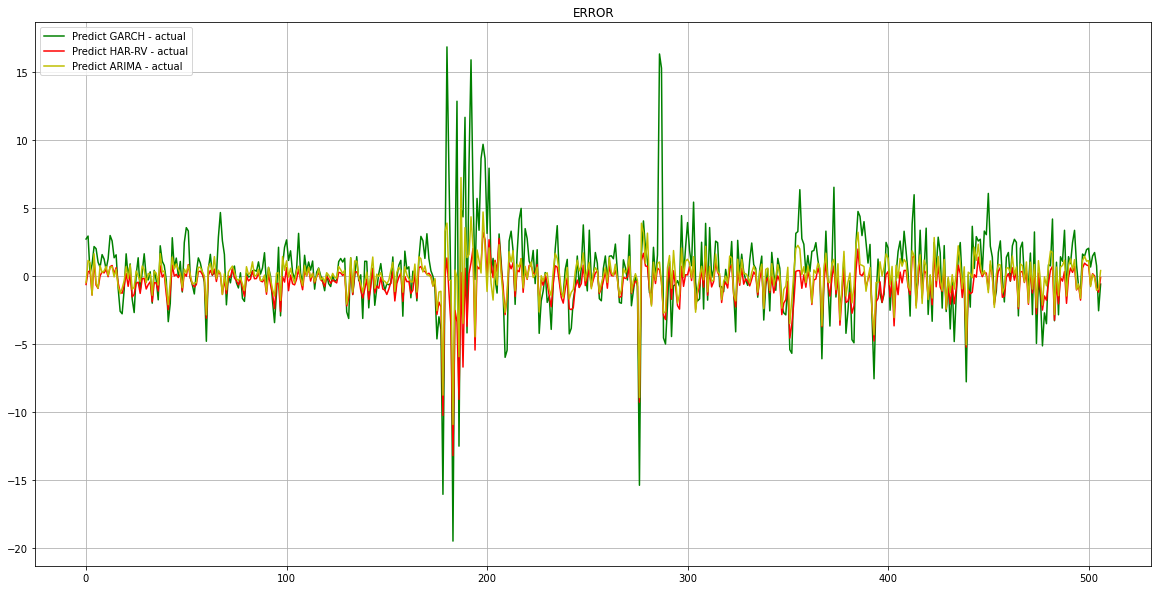

In [113]:
plt.figure(figsize=(20,10))
plt.title("ERROR")
plt.plot(np.array(predict)-np.array(test), "g", label="Predict GARCH - actual")
plt.plot(np.array(pred) - np.array(test),"r", label="Predict HAR-RV - actual")
plt.plot(np.array(predictions)-np.array(test), "y", label="Predict ARIMA - actual")
#plt.plot(test, "r",label="Actual values")
plt.legend(loc="upper left")
plt.grid(True)

Iteration:      1,   Func. Count:     13,   Neg. LLF: 58.2870082185869
Iteration:      2,   Func. Count:     25,   Neg. LLF: 57.9173249332895
Iteration:      3,   Func. Count:     37,   Neg. LLF: 59.17348871742764
Iteration:      4,   Func. Count:     50,   Neg. LLF: 57.593128417414086
Iteration:      5,   Func. Count:     62,   Neg. LLF: 57.575649527595225
Iteration:      6,   Func. Count:     74,   Neg. LLF: 57.57269420535126
Iteration:      7,   Func. Count:     86,   Neg. LLF: 57.56585449231254
Iteration:      8,   Func. Count:     98,   Neg. LLF: 57.56418292506459
Iteration:      9,   Func. Count:    110,   Neg. LLF: 57.564031200309365
Iteration:     10,   Func. Count:    122,   Neg. LLF: 57.56327110775145
Iteration:     11,   Func. Count:    134,   Neg. LLF: 57.55991932171515
Iteration:     12,   Func. Count:    146,   Neg. LLF: 57.559191269573226
Iteration:     13,   Func. Count:    157,   Neg. LLF: 57.55919127619609
Optimization terminated successfully    (Exit mode 0)
        

Iteration:      7,   Func. Count:     89,   Neg. LLF: 56.370524223334066
Iteration:      8,   Func. Count:    102,   Neg. LLF: 56.36661343427101
Iteration:      9,   Func. Count:    115,   Neg. LLF: 56.36505319650083
Iteration:     10,   Func. Count:    127,   Neg. LLF: 56.3647341146283
Iteration:     11,   Func. Count:    139,   Neg. LLF: 56.36393117506404
Iteration:     12,   Func. Count:    151,   Neg. LLF: 56.362185455847545
Iteration:     13,   Func. Count:    163,   Neg. LLF: 56.36158047601434
Iteration:     14,   Func. Count:    175,   Neg. LLF: 56.36085349416955
Iteration:     15,   Func. Count:    187,   Neg. LLF: 56.36085187857348
Iteration:     16,   Func. Count:    198,   Neg. LLF: 56.360851878571324
Optimization terminated successfully    (Exit mode 0)
            Current function value: 56.36085187857348
            Iterations: 16
            Function evaluations: 198
            Gradient evaluations: 16
Iteration:      1,   Func. Count:     13,   Neg. LLF: 56.86418488779

Iteration:     13,   Func. Count:    161,   Neg. LLF: 54.24439901481258
Iteration:     14,   Func. Count:    173,   Neg. LLF: 54.24408670349177
Iteration:     15,   Func. Count:    185,   Neg. LLF: 54.24385515284261
Iteration:     16,   Func. Count:    197,   Neg. LLF: 54.243844284602716
Iteration:     17,   Func. Count:    208,   Neg. LLF: 54.24384428462019
Optimization terminated successfully    (Exit mode 0)
            Current function value: 54.243844284602716
            Iterations: 17
            Function evaluations: 208
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     13,   Neg. LLF: 53.69517606509606
Iteration:      2,   Func. Count:     26,   Neg. LLF: 54.6114306796103
Iteration:      3,   Func. Count:     39,   Neg. LLF: 53.78679258824395
Iteration:      4,   Func. Count:     52,   Neg. LLF: 53.64195852050994
Iteration:      5,   Func. Count:     65,   Neg. LLF: 53.45495398497122
Iteration:      6,   Func. Count:     77,   Neg. LLF: 53.443494499447

Iteration:     12,   Func. Count:    148,   Neg. LLF: 49.850840679293555
Iteration:     13,   Func. Count:    160,   Neg. LLF: 49.84491295453905
Iteration:     14,   Func. Count:    172,   Neg. LLF: 49.84485138461121
Iteration:     15,   Func. Count:    184,   Neg. LLF: 49.84484572860087
Iteration:     16,   Func. Count:    195,   Neg. LLF: 49.84484573618353
Optimization terminated successfully    (Exit mode 0)
            Current function value: 49.84484572860087
            Iterations: 16
            Function evaluations: 195
            Gradient evaluations: 16
Iteration:      1,   Func. Count:     13,   Neg. LLF: 51.33381239127145
Iteration:      2,   Func. Count:     26,   Neg. LLF: 50.20525455261639
Iteration:      3,   Func. Count:     38,   Neg. LLF: 50.1699206198406
Iteration:      4,   Func. Count:     51,   Neg. LLF: 50.605503356673466
Iteration:      5,   Func. Count:     64,   Neg. LLF: 49.972795770920044
Iteration:      6,   Func. Count:     76,   Neg. LLF: 49.94739930477

Iteration:      1,   Func. Count:     13,   Neg. LLF: 50.217337432756125
Iteration:      2,   Func. Count:     26,   Neg. LLF: 49.38334931310607
Iteration:      3,   Func. Count:     38,   Neg. LLF: 49.359742359223276
Iteration:      4,   Func. Count:     50,   Neg. LLF: 49.30820464480003
Iteration:      5,   Func. Count:     62,   Neg. LLF: 49.3002685942435
Iteration:      6,   Func. Count:     74,   Neg. LLF: 49.29536862023277
Iteration:      7,   Func. Count:     86,   Neg. LLF: 49.286635962386015
Iteration:      8,   Func. Count:     98,   Neg. LLF: 49.28350187793338
Iteration:      9,   Func. Count:    110,   Neg. LLF: 49.28125605170022
Iteration:     10,   Func. Count:    122,   Neg. LLF: 49.28003295755373
Iteration:     11,   Func. Count:    134,   Neg. LLF: 49.2774032554128
Iteration:     12,   Func. Count:    146,   Neg. LLF: 49.27525893730992
Iteration:     13,   Func. Count:    158,   Neg. LLF: 49.27457369571603
Iteration:     14,   Func. Count:    170,   Neg. LLF: 49.274446

Iteration:      3,   Func. Count:     37,   Neg. LLF: 51.78299351078806
Iteration:      4,   Func. Count:     49,   Neg. LLF: 51.77957405187183
Iteration:      5,   Func. Count:     61,   Neg. LLF: 51.779308759141074
Iteration:      6,   Func. Count:     73,   Neg. LLF: 51.7790274164915
Iteration:      7,   Func. Count:     85,   Neg. LLF: 51.777594918250784
Iteration:      8,   Func. Count:     97,   Neg. LLF: 51.77631145159243
Iteration:      9,   Func. Count:    109,   Neg. LLF: 51.776258928671155
Iteration:     10,   Func. Count:    121,   Neg. LLF: 51.776252821599385
Iteration:     11,   Func. Count:    132,   Neg. LLF: 51.776252821232134
Optimization terminated successfully    (Exit mode 0)
            Current function value: 51.776252821599385
            Iterations: 11
            Function evaluations: 132
            Gradient evaluations: 11
Iteration:      1,   Func. Count:     13,   Neg. LLF: 52.60197451533488
Iteration:      2,   Func. Count:     25,   Neg. LLF: 52.60015070

Iteration:      6,   Func. Count:     73,   Neg. LLF: 53.122532369696785
Iteration:      7,   Func. Count:     85,   Neg. LLF: 53.12250432787722
Iteration:      8,   Func. Count:     97,   Neg. LLF: 53.12243863750938
Iteration:      9,   Func. Count:    109,   Neg. LLF: 53.122204544779784
Iteration:     10,   Func. Count:    121,   Neg. LLF: 53.12203610286624
Iteration:     11,   Func. Count:    133,   Neg. LLF: 53.12193891314724
Iteration:     12,   Func. Count:    145,   Neg. LLF: 53.121927161273106
Iteration:     13,   Func. Count:    156,   Neg. LLF: 53.1219271621655
Optimization terminated successfully    (Exit mode 0)
            Current function value: 53.121927161273106
            Iterations: 13
            Function evaluations: 156
            Gradient evaluations: 13
Iteration:      1,   Func. Count:     13,   Neg. LLF: 53.788516643054834
Iteration:      2,   Func. Count:     25,   Neg. LLF: 53.66929883903428
Iteration:      3,   Func. Count:     37,   Neg. LLF: 53.648713436

Iteration:      1,   Func. Count:     13,   Neg. LLF: 53.125402689959884
Iteration:      2,   Func. Count:     25,   Neg. LLF: 53.108965831604266
Iteration:      3,   Func. Count:     37,   Neg. LLF: 53.90206092167758
Iteration:      4,   Func. Count:     50,   Neg. LLF: 53.14458324986708
Iteration:      5,   Func. Count:     63,   Neg. LLF: 53.05790349126878
Iteration:      6,   Func. Count:     75,   Neg. LLF: 53.04443958872903
Iteration:      7,   Func. Count:     87,   Neg. LLF: 53.06871693768929
Iteration:      8,   Func. Count:    100,   Neg. LLF: 53.03909636201355
Iteration:      9,   Func. Count:    112,   Neg. LLF: 53.039058085887795
Iteration:     10,   Func. Count:    124,   Neg. LLF: 53.03904595197578
Iteration:     11,   Func. Count:    136,   Neg. LLF: 53.03903107092635
Iteration:     12,   Func. Count:    148,   Neg. LLF: 53.03898504964172
Iteration:     13,   Func. Count:    160,   Neg. LLF: 53.03887274869501
Iteration:     14,   Func. Count:    172,   Neg. LLF: 53.0387

Iteration:      8,   Func. Count:    101,   Neg. LLF: 51.42625803766666
Iteration:      9,   Func. Count:    113,   Neg. LLF: 51.42611439855391
Iteration:     10,   Func. Count:    125,   Neg. LLF: 51.425796201468884
Iteration:     11,   Func. Count:    137,   Neg. LLF: 51.4250145812558
Iteration:     12,   Func. Count:    149,   Neg. LLF: 51.42212140172229
Iteration:     13,   Func. Count:    161,   Neg. LLF: 51.41780078770403
Iteration:     14,   Func. Count:    173,   Neg. LLF: 51.411359447875846
Iteration:     15,   Func. Count:    185,   Neg. LLF: 51.4075835408087
Iteration:     16,   Func. Count:    197,   Neg. LLF: 51.407462850549145
Iteration:     17,   Func. Count:    209,   Neg. LLF: 51.407452756245846
Iteration:     18,   Func. Count:    220,   Neg. LLF: 51.40745277345281
Optimization terminated successfully    (Exit mode 0)
            Current function value: 51.407452756245846
            Iterations: 18
            Function evaluations: 220
            Gradient evaluations

Iteration:      9,   Func. Count:    109,   Neg. LLF: 48.68432722446894
Iteration:     10,   Func. Count:    121,   Neg. LLF: 48.6843232074816
Iteration:     11,   Func. Count:    132,   Neg. LLF: 48.68432321100825
Optimization terminated successfully    (Exit mode 0)
            Current function value: 48.6843232074816
            Iterations: 11
            Function evaluations: 132
            Gradient evaluations: 11
Iteration:      1,   Func. Count:     13,   Neg. LLF: 48.86346680620977
Iteration:      2,   Func. Count:     25,   Neg. LLF: 48.79809712067104
Iteration:      3,   Func. Count:     38,   Neg. LLF: 48.74600660871778
Iteration:      4,   Func. Count:     51,   Neg. LLF: 48.724210365950114
Iteration:      5,   Func. Count:     63,   Neg. LLF: 48.72187669916198
Iteration:      6,   Func. Count:     75,   Neg. LLF: 48.721445367899555
Iteration:      7,   Func. Count:     87,   Neg. LLF: 48.72079093790633
Iteration:      8,   Func. Count:     99,   Neg. LLF: 48.7201526683730

Iteration:      6,   Func. Count:     76,   Neg. LLF: 48.504695986344444
Iteration:      7,   Func. Count:     88,   Neg. LLF: 48.504633955380655
Iteration:      8,   Func. Count:    100,   Neg. LLF: 48.504424440186234
Iteration:      9,   Func. Count:    112,   Neg. LLF: 48.50377883524993
Iteration:     10,   Func. Count:    124,   Neg. LLF: 48.50253677601931
Iteration:     11,   Func. Count:    136,   Neg. LLF: 48.50178000865494
Iteration:     12,   Func. Count:    148,   Neg. LLF: 48.50160374677011
Iteration:     13,   Func. Count:    160,   Neg. LLF: 48.50159298929147
Iteration:     14,   Func. Count:    171,   Neg. LLF: 48.50159298928785
Optimization terminated successfully    (Exit mode 0)
            Current function value: 48.50159298929147
            Iterations: 14
            Function evaluations: 171
            Gradient evaluations: 14
Iteration:      1,   Func. Count:     13,   Neg. LLF: 48.03563527047466
Iteration:      2,   Func. Count:     25,   Neg. LLF: 48.0298461834

Iteration:      3,   Func. Count:     37,   Neg. LLF: 47.51373663700245
Iteration:      4,   Func. Count:     50,   Neg. LLF: 47.228108685279956
Iteration:      5,   Func. Count:     62,   Neg. LLF: 47.218391869980486
Iteration:      6,   Func. Count:     74,   Neg. LLF: 47.20594282007881
Iteration:      7,   Func. Count:     86,   Neg. LLF: 47.20471467430427
Iteration:      8,   Func. Count:     98,   Neg. LLF: 47.20456063435156
Iteration:      9,   Func. Count:    110,   Neg. LLF: 47.2045145455114
Iteration:     10,   Func. Count:    122,   Neg. LLF: 47.204364477348996
Iteration:     11,   Func. Count:    134,   Neg. LLF: 47.20434322203594
Iteration:     12,   Func. Count:    145,   Neg. LLF: 47.204343220159636
Optimization terminated successfully    (Exit mode 0)
            Current function value: 47.20434322203594
            Iterations: 12
            Function evaluations: 145
            Gradient evaluations: 12
Iteration:      1,   Func. Count:     13,   Neg. LLF: 47.4820315456

Iteration:      8,   Func. Count:     99,   Neg. LLF: 46.90537648650754
Iteration:      9,   Func. Count:    111,   Neg. LLF: 46.90511999369026
Iteration:     10,   Func. Count:    123,   Neg. LLF: 46.9047505143005
Iteration:     11,   Func. Count:    135,   Neg. LLF: 46.904701121504836
Iteration:     12,   Func. Count:    147,   Neg. LLF: 46.90467558030067
Iteration:     13,   Func. Count:    159,   Neg. LLF: 46.90467436762662
Iteration:     14,   Func. Count:    171,   Neg. LLF: 46.9046737400816
Optimization terminated successfully    (Exit mode 0)
            Current function value: 46.9046737400816
            Iterations: 14
            Function evaluations: 171
            Gradient evaluations: 14
Iteration:      1,   Func. Count:     13,   Neg. LLF: 46.615168290622485
Iteration:      2,   Func. Count:     25,   Neg. LLF: 46.49597838794897
Iteration:      3,   Func. Count:     37,   Neg. LLF: 47.21089872185087
Iteration:      4,   Func. Count:     50,   Neg. LLF: 46.75593434387478

Iteration:     10,   Func. Count:    123,   Neg. LLF: 49.45595221189611
Iteration:     11,   Func. Count:    135,   Neg. LLF: 49.453832215001896
Iteration:     12,   Func. Count:    147,   Neg. LLF: 49.45372009082221
Iteration:     13,   Func. Count:    159,   Neg. LLF: 49.45370810059422
Iteration:     14,   Func. Count:    170,   Neg. LLF: 49.45370811230975
Optimization terminated successfully    (Exit mode 0)
            Current function value: 49.45370810059422
            Iterations: 14
            Function evaluations: 170
            Gradient evaluations: 14
Iteration:      1,   Func. Count:     13,   Neg. LLF: 50.07063549824217
Iteration:      2,   Func. Count:     25,   Neg. LLF: 49.805243935847805
Iteration:      3,   Func. Count:     37,   Neg. LLF: 50.02147494152933
Iteration:      4,   Func. Count:     50,   Neg. LLF: 49.61587282591657
Iteration:      5,   Func. Count:     62,   Neg. LLF: 49.61807698321059
Iteration:      6,   Func. Count:     75,   Neg. LLF: 49.58511022899

Iteration:     10,   Func. Count:    123,   Neg. LLF: 51.9496893270404
Iteration:     11,   Func. Count:    135,   Neg. LLF: 51.94585162459694
Iteration:     12,   Func. Count:    147,   Neg. LLF: 51.943198476578225
Iteration:     13,   Func. Count:    159,   Neg. LLF: 51.935905506123284
Iteration:     14,   Func. Count:    171,   Neg. LLF: 51.916274390466924
Iteration:     15,   Func. Count:    183,   Neg. LLF: 51.87306521133176
Iteration:     16,   Func. Count:    195,   Neg. LLF: 51.86105457462461
Iteration:     17,   Func. Count:    207,   Neg. LLF: 51.85852511087021
Iteration:     18,   Func. Count:    219,   Neg. LLF: 51.85769641327286
Iteration:     19,   Func. Count:    231,   Neg. LLF: 51.857662715062666
Iteration:     20,   Func. Count:    243,   Neg. LLF: 51.857658529214866
Iteration:     21,   Func. Count:    254,   Neg. LLF: 51.857658532676744
Optimization terminated successfully    (Exit mode 0)
            Current function value: 51.857658529214866
            Iterations

Iteration:      6,   Func. Count:     74,   Neg. LLF: 52.08723444780569
Iteration:      7,   Func. Count:     86,   Neg. LLF: 52.086950872517875
Iteration:      8,   Func. Count:     98,   Neg. LLF: 52.08684135622894
Iteration:      9,   Func. Count:    110,   Neg. LLF: 52.08658645839056
Iteration:     10,   Func. Count:    122,   Neg. LLF: 52.085667274989405
Iteration:     11,   Func. Count:    134,   Neg. LLF: 52.0855237609475
Iteration:     12,   Func. Count:    146,   Neg. LLF: 52.08543523707679
Iteration:     13,   Func. Count:    157,   Neg. LLF: 52.085435241829195
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.08543523707679
            Iterations: 13
            Function evaluations: 157
            Gradient evaluations: 13
Iteration:      1,   Func. Count:     13,   Neg. LLF: 51.961173079144466
Iteration:      2,   Func. Count:     25,   Neg. LLF: 52.29925659567425
Iteration:      3,   Func. Count:     38,   Neg. LLF: 52.9067651016

Iteration:      2,   Func. Count:     25,   Neg. LLF: 47.95637749149728
Iteration:      3,   Func. Count:     38,   Neg. LLF: 48.32061319493164
Iteration:      4,   Func. Count:     51,   Neg. LLF: 47.78018747864099
Iteration:      5,   Func. Count:     64,   Neg. LLF: 47.7709378493051
Iteration:      6,   Func. Count:     77,   Neg. LLF: 47.769021541924026
Iteration:      7,   Func. Count:     89,   Neg. LLF: 47.76900440107003
Iteration:      8,   Func. Count:    101,   Neg. LLF: 47.76897930197204
Iteration:      9,   Func. Count:    113,   Neg. LLF: 47.768858623426006
Iteration:     10,   Func. Count:    125,   Neg. LLF: 47.768829546251055
Iteration:     11,   Func. Count:    137,   Neg. LLF: 47.76880367178659
Iteration:     12,   Func. Count:    148,   Neg. LLF: 47.76880367211153
Optimization terminated successfully    (Exit mode 0)
            Current function value: 47.76880367178659
            Iterations: 12
            Function evaluations: 148
            Gradient evaluations:

Iteration:      7,   Func. Count:     85,   Neg. LLF: 45.963968265643814
Iteration:      8,   Func. Count:     96,   Neg. LLF: 45.96396826557211
Optimization terminated successfully    (Exit mode 0)
            Current function value: 45.963968265643814
            Iterations: 8
            Function evaluations: 96
            Gradient evaluations: 8
Iteration:      1,   Func. Count:     13,   Neg. LLF: 45.88755163312398
Iteration:      2,   Func. Count:     25,   Neg. LLF: 45.86999973434279
Iteration:      3,   Func. Count:     37,   Neg. LLF: 45.868166625328044
Iteration:      4,   Func. Count:     49,   Neg. LLF: 45.87830117917743
Iteration:      5,   Func. Count:     62,   Neg. LLF: 45.86396236926088
Iteration:      6,   Func. Count:     74,   Neg. LLF: 45.86367501948853
Iteration:      7,   Func. Count:     86,   Neg. LLF: 45.86339943638556
Iteration:      8,   Func. Count:     98,   Neg. LLF: 45.86334359296156
Iteration:      9,   Func. Count:    110,   Neg. LLF: 45.8633029629543

Iteration:     13,   Func. Count:    159,   Neg. LLF: 47.74611022667612
Iteration:     14,   Func. Count:    171,   Neg. LLF: 47.74610732943503
Iteration:     15,   Func. Count:    182,   Neg. LLF: 47.746107339060146
Optimization terminated successfully    (Exit mode 0)
            Current function value: 47.74610732943503
            Iterations: 15
            Function evaluations: 182
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     13,   Neg. LLF: 47.46165008213951
Iteration:      2,   Func. Count:     25,   Neg. LLF: 47.61518808827569
Iteration:      3,   Func. Count:     38,   Neg. LLF: 47.72066958336673
Iteration:      4,   Func. Count:     51,   Neg. LLF: 47.37643381460451
Iteration:      5,   Func. Count:     63,   Neg. LLF: 47.375122363008984
Iteration:      6,   Func. Count:     75,   Neg. LLF: 47.375006804863375
Iteration:      7,   Func. Count:     87,   Neg. LLF: 47.374804965160564
Iteration:      8,   Func. Count:     99,   Neg. LLF: 47.374648482

Iteration:      6,   Func. Count:     76,   Neg. LLF: 49.267376309245485
Iteration:      7,   Func. Count:     88,   Neg. LLF: 49.26193654906875
Iteration:      8,   Func. Count:    100,   Neg. LLF: 49.260931622254375
Iteration:      9,   Func. Count:    112,   Neg. LLF: 49.25684623988706
Iteration:     10,   Func. Count:    124,   Neg. LLF: 49.25549400975221
Iteration:     11,   Func. Count:    136,   Neg. LLF: 49.255230135743275
Iteration:     12,   Func. Count:    148,   Neg. LLF: 49.25521167335117
Iteration:     13,   Func. Count:    160,   Neg. LLF: 49.255210942302874
Optimization terminated successfully    (Exit mode 0)
            Current function value: 49.255210942302874
            Iterations: 13
            Function evaluations: 160
            Gradient evaluations: 13
Iteration:      1,   Func. Count:     13,   Neg. LLF: 50.70191767089883
Iteration:      2,   Func. Count:     25,   Neg. LLF: 50.35852928067512
Iteration:      3,   Func. Count:     37,   Neg. LLF: 51.47502651

Iteration:      9,   Func. Count:    110,   Neg. LLF: 52.32085636237803
Iteration:     10,   Func. Count:    122,   Neg. LLF: 52.31616739628061
Iteration:     11,   Func. Count:    134,   Neg. LLF: 52.31602595530783
Iteration:     12,   Func. Count:    146,   Neg. LLF: 52.31601641781922
Iteration:     13,   Func. Count:    158,   Neg. LLF: 52.31601558349444
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.31601558349444
            Iterations: 13
            Function evaluations: 158
            Gradient evaluations: 13
Iteration:      1,   Func. Count:     13,   Neg. LLF: 52.48071698481175
Iteration:      2,   Func. Count:     25,   Neg. LLF: 52.49567520177032
Iteration:      3,   Func. Count:     38,   Neg. LLF: 52.47417415180357
Iteration:      4,   Func. Count:     51,   Neg. LLF: 52.35114751811131
Iteration:      5,   Func. Count:     63,   Neg. LLF: 52.34886857551814
Iteration:      6,   Func. Count:     75,   Neg. LLF: 52.3450715378988

Iteration:      5,   Func. Count:     62,   Neg. LLF: 53.35488725885422
Iteration:      6,   Func. Count:     74,   Neg. LLF: 53.354782868555255
Iteration:      7,   Func. Count:     86,   Neg. LLF: 53.35470401471548
Iteration:      8,   Func. Count:     98,   Neg. LLF: 53.35446687988031
Iteration:      9,   Func. Count:    110,   Neg. LLF: 53.354287883556495
Iteration:     10,   Func. Count:    122,   Neg. LLF: 53.35422302694253
Iteration:     11,   Func. Count:    134,   Neg. LLF: 53.35421446893435
Iteration:     12,   Func. Count:    145,   Neg. LLF: 53.35421446743533
Optimization terminated successfully    (Exit mode 0)
            Current function value: 53.35421446893435
            Iterations: 12
            Function evaluations: 145
            Gradient evaluations: 12
Iteration:      1,   Func. Count:     13,   Neg. LLF: 53.99171724170388
Iteration:      2,   Func. Count:     25,   Neg. LLF: 53.87267627709624
Iteration:      3,   Func. Count:     37,   Neg. LLF: 54.55392180608

Iteration:      8,   Func. Count:     98,   Neg. LLF: 54.0341687883955
Iteration:      9,   Func. Count:    110,   Neg. LLF: 54.03415093506778
Iteration:     10,   Func. Count:    122,   Neg. LLF: 54.034054473185336
Iteration:     11,   Func. Count:    134,   Neg. LLF: 54.03384946146114
Iteration:     12,   Func. Count:    146,   Neg. LLF: 54.03384391863811
Iteration:     13,   Func. Count:    158,   Neg. LLF: 54.03384300268271
Optimization terminated successfully    (Exit mode 0)
            Current function value: 54.03384300268271
            Iterations: 13
            Function evaluations: 158
            Gradient evaluations: 13
Iteration:      1,   Func. Count:     13,   Neg. LLF: 53.49055993608823
Iteration:      2,   Func. Count:     25,   Neg. LLF: 53.419828147361855
Iteration:      3,   Func. Count:     37,   Neg. LLF: 60.1794051798763
Iteration:      4,   Func. Count:     50,   Neg. LLF: 53.395873608839835
Iteration:      5,   Func. Count:     62,   Neg. LLF: 53.395565339930

Iteration:      1,   Func. Count:     13,   Neg. LLF: 51.74727691026704
Iteration:      2,   Func. Count:     25,   Neg. LLF: 51.68311288433224
Iteration:      3,   Func. Count:     37,   Neg. LLF: 54.49252684614677
Iteration:      4,   Func. Count:     50,   Neg. LLF: 52.07675923332121
Iteration:      5,   Func. Count:     63,   Neg. LLF: 51.604503180839984
Iteration:      6,   Func. Count:     75,   Neg. LLF: 51.61653935346992
Iteration:      7,   Func. Count:     88,   Neg. LLF: 51.601368468342116
Iteration:      8,   Func. Count:    101,   Neg. LLF: 51.59496299249561
Iteration:      9,   Func. Count:    113,   Neg. LLF: 51.594704720101284
Iteration:     10,   Func. Count:    125,   Neg. LLF: 51.5943032070522
Iteration:     11,   Func. Count:    137,   Neg. LLF: 51.59413568156921
Iteration:     12,   Func. Count:    149,   Neg. LLF: 51.59330540087634
Iteration:     13,   Func. Count:    161,   Neg. LLF: 51.59056494991918
Iteration:     14,   Func. Count:    173,   Neg. LLF: 51.58523

Iteration:      5,   Func. Count:     63,   Neg. LLF: 58.222171102336326
Iteration:      6,   Func. Count:     75,   Neg. LLF: 58.14909593372324
Iteration:      7,   Func. Count:     87,   Neg. LLF: 58.125573545317835
Iteration:      8,   Func. Count:     99,   Neg. LLF: 58.12096243183719
Iteration:      9,   Func. Count:    111,   Neg. LLF: 58.11981553943136
Iteration:     10,   Func. Count:    123,   Neg. LLF: 58.11922372220538
Iteration:     11,   Func. Count:    135,   Neg. LLF: 58.119057883370004
Iteration:     12,   Func. Count:    147,   Neg. LLF: 58.119044837140066
Iteration:     13,   Func. Count:    159,   Neg. LLF: 58.11904414446402
Optimization terminated successfully    (Exit mode 0)
            Current function value: 58.11904414446402
            Iterations: 13
            Function evaluations: 159
            Gradient evaluations: 13
Iteration:      1,   Func. Count:     13,   Neg. LLF: 59.037155836805994
Iteration:      2,   Func. Count:     25,   Neg. LLF: 59.18796586

Iteration:     12,   Func. Count:    153,   Neg. LLF: 70.44761610790218
Iteration:     13,   Func. Count:    165,   Neg. LLF: 70.39691873256051
Iteration:     14,   Func. Count:    177,   Neg. LLF: 70.20856036168949
Iteration:     15,   Func. Count:    189,   Neg. LLF: 69.92736278762166
Iteration:     16,   Func. Count:    201,   Neg. LLF: 69.705516685401
Iteration:     17,   Func. Count:    213,   Neg. LLF: 69.61057636354741
Iteration:     18,   Func. Count:    225,   Neg. LLF: 69.6096057409244
Iteration:     19,   Func. Count:    237,   Neg. LLF: 69.60465714796942
Iteration:     20,   Func. Count:    249,   Neg. LLF: 69.58509979665578
Iteration:     21,   Func. Count:    261,   Neg. LLF: 69.5675399195512
Iteration:     22,   Func. Count:    273,   Neg. LLF: 69.56300336291649
Iteration:     23,   Func. Count:    285,   Neg. LLF: 69.56123991406102
Iteration:     24,   Func. Count:    297,   Neg. LLF: 69.56084608130928
Iteration:     25,   Func. Count:    309,   Neg. LLF: 69.56080015470

Iteration:     16,   Func. Count:    199,   Neg. LLF: 72.7822170111889
Iteration:     17,   Func. Count:    211,   Neg. LLF: 72.77859504080362
Iteration:     18,   Func. Count:    223,   Neg. LLF: 72.77684740924202
Iteration:     19,   Func. Count:    235,   Neg. LLF: 72.77673438341444
Iteration:     20,   Func. Count:    247,   Neg. LLF: 72.77672988459751
Iteration:     21,   Func. Count:    258,   Neg. LLF: 72.77672989679346
Optimization terminated successfully    (Exit mode 0)
            Current function value: 72.77672988459751
            Iterations: 21
            Function evaluations: 258
            Gradient evaluations: 21
Iteration:      1,   Func. Count:     13,   Neg. LLF: 79.11124791692025
Iteration:      2,   Func. Count:     26,   Neg. LLF: 74.0696102298399
Iteration:      3,   Func. Count:     39,   Neg. LLF: 73.80316135662156
Iteration:      4,   Func. Count:     52,   Neg. LLF: 73.59761693181328
Iteration:      5,   Func. Count:     65,   Neg. LLF: 73.27233632785872


            Gradient evaluations: 28
Iteration:      1,   Func. Count:     13,   Neg. LLF: 73.97477168196863
Iteration:      2,   Func. Count:     25,   Neg. LLF: 74.13269851323463
Iteration:      3,   Func. Count:     38,   Neg. LLF: 79.17036974442541
Iteration:      4,   Func. Count:     51,   Neg. LLF: 83.1862688104949
Iteration:      5,   Func. Count:     64,   Neg. LLF: 73.77793924694168
Iteration:      6,   Func. Count:     77,   Neg. LLF: 73.66502908552617
Iteration:      7,   Func. Count:     90,   Neg. LLF: 73.64679346592273
Iteration:      8,   Func. Count:    103,   Neg. LLF: 73.63124681616405
Iteration:      9,   Func. Count:    115,   Neg. LLF: 73.60186388456796
Iteration:     10,   Func. Count:    127,   Neg. LLF: 73.58567775243237
Iteration:     11,   Func. Count:    139,   Neg. LLF: 73.578772517271
Iteration:     12,   Func. Count:    151,   Neg. LLF: 73.5746822345846
Iteration:     13,   Func. Count:    163,   Neg. LLF: 73.57451983760402
Iteration:     14,   Func. Coun

Iteration:      1,   Func. Count:     13,   Neg. LLF: 69.99755939332124
Iteration:      2,   Func. Count:     25,   Neg. LLF: 69.35283547525314
Iteration:      3,   Func. Count:     37,   Neg. LLF: 72.28009539224789
Iteration:      4,   Func. Count:     50,   Neg. LLF: 70.94884005481785
Iteration:      5,   Func. Count:     63,   Neg. LLF: 69.40286775973162
Iteration:      6,   Func. Count:     76,   Neg. LLF: 69.13466255237184
Iteration:      7,   Func. Count:     89,   Neg. LLF: 69.1021305301906
Iteration:      8,   Func. Count:    101,   Neg. LLF: 69.10067342180474
Iteration:      9,   Func. Count:    113,   Neg. LLF: 69.10025142387336
Iteration:     10,   Func. Count:    125,   Neg. LLF: 69.09990131986319
Iteration:     11,   Func. Count:    137,   Neg. LLF: 69.09877536090339
Iteration:     12,   Func. Count:    149,   Neg. LLF: 69.0927418319263
Iteration:     13,   Func. Count:    161,   Neg. LLF: 69.07759419132222
Iteration:     14,   Func. Count:    173,   Neg. LLF: 69.018357637

Iteration:      7,   Func. Count:     90,   Neg. LLF: 63.56859912415493
Iteration:      8,   Func. Count:    103,   Neg. LLF: 63.5435195356662
Iteration:      9,   Func. Count:    116,   Neg. LLF: 63.556321004234405
Iteration:     10,   Func. Count:    129,   Neg. LLF: 63.524342290398536
Iteration:     11,   Func. Count:    142,   Neg. LLF: 63.52202769245221
Iteration:     12,   Func. Count:    155,   Neg. LLF: 63.52158674490988
Iteration:     13,   Func. Count:    167,   Neg. LLF: 63.521499068261015
Iteration:     14,   Func. Count:    179,   Neg. LLF: 63.52126149049738
Iteration:     15,   Func. Count:    191,   Neg. LLF: 63.520690152243944
Iteration:     16,   Func. Count:    203,   Neg. LLF: 63.519159051575535
Iteration:     17,   Func. Count:    215,   Neg. LLF: 63.515207528604215
Iteration:     18,   Func. Count:    227,   Neg. LLF: 63.50483442396109
Iteration:     19,   Func. Count:    239,   Neg. LLF: 63.499252931421424
Iteration:     20,   Func. Count:    251,   Neg. LLF: 63.4

Iteration:      7,   Func. Count:     86,   Neg. LLF: 58.92398022401911
Iteration:      8,   Func. Count:     98,   Neg. LLF: 58.923962348633175
Iteration:      9,   Func. Count:    110,   Neg. LLF: 58.923850438939944
Iteration:     10,   Func. Count:    122,   Neg. LLF: 58.923347306322874
Iteration:     11,   Func. Count:    134,   Neg. LLF: 58.922892502708685
Iteration:     12,   Func. Count:    146,   Neg. LLF: 58.922829299181615
Iteration:     13,   Func. Count:    158,   Neg. LLF: 58.9228134820012
Iteration:     14,   Func. Count:    169,   Neg. LLF: 58.92281350757467
Optimization terminated successfully    (Exit mode 0)
            Current function value: 58.9228134820012
            Iterations: 14
            Function evaluations: 169
            Gradient evaluations: 14
Iteration:      1,   Func. Count:     13,   Neg. LLF: 59.21073062187771
Iteration:      2,   Func. Count:     26,   Neg. LLF: 58.34229543931547
Iteration:      3,   Func. Count:     38,   Neg. LLF: 58.2484939827

Iteration:     13,   Func. Count:    160,   Neg. LLF: 56.192843391345704
Iteration:     14,   Func. Count:    172,   Neg. LLF: 56.19276562388299
Iteration:     15,   Func. Count:    183,   Neg. LLF: 56.19276563836706
Optimization terminated successfully    (Exit mode 0)
            Current function value: 56.19276562388299
            Iterations: 15
            Function evaluations: 183
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     13,   Neg. LLF: 59.37827716189879
Iteration:      2,   Func. Count:     26,   Neg. LLF: 55.19623064785745
Iteration:      3,   Func. Count:     38,   Neg. LLF: 55.01637254269904
Iteration:      4,   Func. Count:     50,   Neg. LLF: 55.01412331031291
Iteration:      5,   Func. Count:     63,   Neg. LLF: 55.01417136164113
Iteration:      6,   Func. Count:     76,   Neg. LLF: 55.008617276339976
Iteration:      7,   Func. Count:     88,   Neg. LLF: 55.00807638542462
Iteration:      8,   Func. Count:    100,   Neg. LLF: 55.00458393784

Iteration:     10,   Func. Count:    125,   Neg. LLF: 51.69160783077986
Iteration:     11,   Func. Count:    136,   Neg. LLF: 51.69160785260161
Optimization terminated successfully    (Exit mode 0)
            Current function value: 51.69160783077986
            Iterations: 11
            Function evaluations: 136
            Gradient evaluations: 11
Iteration:      1,   Func. Count:     13,   Neg. LLF: 51.29676828215631
Iteration:      2,   Func. Count:     25,   Neg. LLF: 51.14590447419703
Iteration:      3,   Func. Count:     37,   Neg. LLF: 52.46758491794788
Iteration:      4,   Func. Count:     50,   Neg. LLF: 54.52356378054956
Iteration:      5,   Func. Count:     63,   Neg. LLF: 51.24669026574605
Iteration:      6,   Func. Count:     76,   Neg. LLF: 51.05626613255775
Iteration:      7,   Func. Count:     89,   Neg. LLF: 51.029798435457984
Iteration:      8,   Func. Count:    101,   Neg. LLF: 51.02594514447322
Iteration:      9,   Func. Count:    113,   Neg. LLF: 51.023626735548

Iteration:      6,   Func. Count:     77,   Neg. LLF: 51.56459523946167
Iteration:      7,   Func. Count:     90,   Neg. LLF: 51.554587230374004
Iteration:      8,   Func. Count:    103,   Neg. LLF: 51.5491257025504
Iteration:      9,   Func. Count:    115,   Neg. LLF: 51.54637940749381
Iteration:     10,   Func. Count:    127,   Neg. LLF: 51.54348203821391
Iteration:     11,   Func. Count:    139,   Neg. LLF: 51.539316557596045
Iteration:     12,   Func. Count:    151,   Neg. LLF: 51.537966781999465
Iteration:     13,   Func. Count:    163,   Neg. LLF: 51.537690545293465
Iteration:     14,   Func. Count:    175,   Neg. LLF: 51.53766694507436
Iteration:     15,   Func. Count:    187,   Neg. LLF: 51.537666343986004
Optimization terminated successfully    (Exit mode 0)
            Current function value: 51.537666343986004
            Iterations: 15
            Function evaluations: 187
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     13,   Neg. LLF: 54.37990984

Iteration:     12,   Func. Count:    148,   Neg. LLF: 52.69738455616525
Iteration:     13,   Func. Count:    160,   Neg. LLF: 52.697163447500316
Iteration:     14,   Func. Count:    172,   Neg. LLF: 52.697138936133065
Iteration:     15,   Func. Count:    184,   Neg. LLF: 52.697136475838164
Iteration:     16,   Func. Count:    195,   Neg. LLF: 52.69713647539088
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.697136475838164
            Iterations: 16
            Function evaluations: 195
            Gradient evaluations: 16
Iteration:      1,   Func. Count:     13,   Neg. LLF: 56.757336233102976
Iteration:      2,   Func. Count:     26,   Neg. LLF: 54.42076116686685
Iteration:      3,   Func. Count:     39,   Neg. LLF: 52.936422557601645
Iteration:      4,   Func. Count:     51,   Neg. LLF: 52.89251926435191
Iteration:      5,   Func. Count:     63,   Neg. LLF: 52.875020282875184
Iteration:      6,   Func. Count:     75,   Neg. LLF: 52.873152

Iteration:     11,   Func. Count:    135,   Neg. LLF: 56.636857998561
Iteration:     12,   Func. Count:    147,   Neg. LLF: 56.636838367819045
Iteration:     13,   Func. Count:    159,   Neg. LLF: 56.63683780286338
Optimization terminated successfully    (Exit mode 0)
            Current function value: 56.63683780286338
            Iterations: 13
            Function evaluations: 159
            Gradient evaluations: 13
Iteration:      1,   Func. Count:     13,   Neg. LLF: 57.792460283336524
Iteration:      2,   Func. Count:     26,   Neg. LLF: 57.067915649641584
Iteration:      3,   Func. Count:     38,   Neg. LLF: 57.03708175367509
Iteration:      4,   Func. Count:     50,   Neg. LLF: 57.03554736533623
Iteration:      5,   Func. Count:     62,   Neg. LLF: 57.034926410130474
Iteration:      6,   Func. Count:     74,   Neg. LLF: 57.03492048475452
Iteration:      7,   Func. Count:     85,   Neg. LLF: 57.03492048298553
Optimization terminated successfully    (Exit mode 0)
            Cu

Iteration:      9,   Func. Count:    112,   Neg. LLF: 57.022923466876335
Iteration:     10,   Func. Count:    124,   Neg. LLF: 57.02285260670332
Iteration:     11,   Func. Count:    136,   Neg. LLF: 57.022667946513295
Iteration:     12,   Func. Count:    148,   Neg. LLF: 57.02220538622746
Iteration:     13,   Func. Count:    160,   Neg. LLF: 57.021119400031665
Iteration:     14,   Func. Count:    172,   Neg. LLF: 57.01971739600952
Iteration:     15,   Func. Count:    184,   Neg. LLF: 57.01928435017059
Iteration:     16,   Func. Count:    196,   Neg. LLF: 57.019221260819265
Iteration:     17,   Func. Count:    208,   Neg. LLF: 57.01921251518527
Iteration:     18,   Func. Count:    219,   Neg. LLF: 57.01921251728582
Optimization terminated successfully    (Exit mode 0)
            Current function value: 57.01921251518527
            Iterations: 18
            Function evaluations: 219
            Gradient evaluations: 18
Iteration:      1,   Func. Count:     13,   Neg. LLF: 57.483570739

Iteration:     10,   Func. Count:    123,   Neg. LLF: 55.51704225578215
Iteration:     11,   Func. Count:    135,   Neg. LLF: 55.51643791358917
Iteration:     12,   Func. Count:    147,   Neg. LLF: 55.514969812055035
Iteration:     13,   Func. Count:    159,   Neg. LLF: 55.51163599762045
Iteration:     14,   Func. Count:    171,   Neg. LLF: 55.50588877180501
Iteration:     15,   Func. Count:    183,   Neg. LLF: 55.49962259342146
Iteration:     16,   Func. Count:    195,   Neg. LLF: 55.496387884229954
Iteration:     17,   Func. Count:    207,   Neg. LLF: 55.49592591311121
Iteration:     18,   Func. Count:    219,   Neg. LLF: 55.49591042437859
Iteration:     19,   Func. Count:    231,   Neg. LLF: 55.495909391732354
Iteration:     20,   Func. Count:    242,   Neg. LLF: 55.49590939390342
Optimization terminated successfully    (Exit mode 0)
            Current function value: 55.495909391732354
            Iterations: 20
            Function evaluations: 242
            Gradient evaluation

Iteration:      4,   Func. Count:     51,   Neg. LLF: 52.68038623306259
Iteration:      5,   Func. Count:     63,   Neg. LLF: 52.68007741211143
Iteration:      6,   Func. Count:     75,   Neg. LLF: 52.68000792822467
Iteration:      7,   Func. Count:     87,   Neg. LLF: 52.679588813294316
Iteration:      8,   Func. Count:     99,   Neg. LLF: 52.67928243108305
Iteration:      9,   Func. Count:    111,   Neg. LLF: 52.67913067458983
Iteration:     10,   Func. Count:    123,   Neg. LLF: 52.67911565761247
Iteration:     11,   Func. Count:    134,   Neg. LLF: 52.67911565760979
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.67911565761247
            Iterations: 11
            Function evaluations: 134
            Gradient evaluations: 11
Iteration:      1,   Func. Count:     13,   Neg. LLF: 52.706931742163306
Iteration:      2,   Func. Count:     25,   Neg. LLF: 52.70853259124012
Iteration:      3,   Func. Count:     38,   Neg. LLF: 52.71854138282

Iteration:      1,   Func. Count:     13,   Neg. LLF: 52.09753983441673
Iteration:      2,   Func. Count:     25,   Neg. LLF: 51.86101185610672
Iteration:      3,   Func. Count:     37,   Neg. LLF: 51.81584221887688
Iteration:      4,   Func. Count:     49,   Neg. LLF: 53.125854286552936
Iteration:      5,   Func. Count:     63,   Neg. LLF: 51.81161189605918
Iteration:      6,   Func. Count:     75,   Neg. LLF: 51.80936890630791
Iteration:      7,   Func. Count:     87,   Neg. LLF: 51.80919004644963
Iteration:      8,   Func. Count:     99,   Neg. LLF: 51.8079311672564
Iteration:      9,   Func. Count:    111,   Neg. LLF: 51.80743884862802
Iteration:     10,   Func. Count:    123,   Neg. LLF: 51.80733144305188
Iteration:     11,   Func. Count:    135,   Neg. LLF: 51.80732504844766
Iteration:     12,   Func. Count:    146,   Neg. LLF: 51.8073250484482
Optimization terminated successfully    (Exit mode 0)
            Current function value: 51.80732504844766
            Iterations: 12
  

Iteration:      1,   Func. Count:     13,   Neg. LLF: 57.79624560915498
Iteration:      2,   Func. Count:     25,   Neg. LLF: 58.60744742160865
Iteration:      3,   Func. Count:     40,   Neg. LLF: 63.42426979418961
Iteration:      4,   Func. Count:     55,   Neg. LLF: 57.67927328184664
Iteration:      5,   Func. Count:     67,   Neg. LLF: 57.67547819050634
Iteration:      6,   Func. Count:     79,   Neg. LLF: 57.675041462197534
Iteration:      7,   Func. Count:     91,   Neg. LLF: 57.67476480278689
Iteration:      8,   Func. Count:    103,   Neg. LLF: 57.67308225128194
Iteration:      9,   Func. Count:    115,   Neg. LLF: 57.66805226980929
Iteration:     10,   Func. Count:    127,   Neg. LLF: 57.66641652592228
Iteration:     11,   Func. Count:    139,   Neg. LLF: 57.665894689903666
Iteration:     12,   Func. Count:    151,   Neg. LLF: 57.66585149382635
Iteration:     13,   Func. Count:    163,   Neg. LLF: 57.66584906528217
Iteration:     14,   Func. Count:    174,   Neg. LLF: 57.66584

Iteration:      4,   Func. Count:     51,   Neg. LLF: 61.3177711361883
Iteration:      5,   Func. Count:     67,   Neg. LLF: 59.48350049153358
Iteration:      6,   Func. Count:     79,   Neg. LLF: 59.449941261453134
Iteration:      7,   Func. Count:     91,   Neg. LLF: 59.43998247901247
Iteration:      8,   Func. Count:    103,   Neg. LLF: 59.42982697087029
Iteration:      9,   Func. Count:    115,   Neg. LLF: 59.39459895372309
Iteration:     10,   Func. Count:    127,   Neg. LLF: 59.38795845864624
Iteration:     11,   Func. Count:    139,   Neg. LLF: 59.381420123338025
Iteration:     12,   Func. Count:    151,   Neg. LLF: 59.378409853962424
Iteration:     13,   Func. Count:    163,   Neg. LLF: 59.36421162706553
Iteration:     14,   Func. Count:    175,   Neg. LLF: 59.33673684715177
Iteration:     15,   Func. Count:    187,   Neg. LLF: 59.32237846167747
Iteration:     16,   Func. Count:    199,   Neg. LLF: 59.3157771580228
Iteration:     17,   Func. Count:    211,   Neg. LLF: 59.312126

Iteration:      1,   Func. Count:     13,   Neg. LLF: 55.77914349933288
Iteration:      2,   Func. Count:     26,   Neg. LLF: 55.03187405658227
Iteration:      3,   Func. Count:     38,   Neg. LLF: 54.9013218733905
Iteration:      4,   Func. Count:     50,   Neg. LLF: 55.08376598703643
Iteration:      5,   Func. Count:     63,   Neg. LLF: 54.88736112768041
Iteration:      6,   Func. Count:     76,   Neg. LLF: 54.86555391048355
Iteration:      7,   Func. Count:     88,   Neg. LLF: 54.85360326606302
Iteration:      8,   Func. Count:    100,   Neg. LLF: 54.835364981441636
Iteration:      9,   Func. Count:    112,   Neg. LLF: 54.80190770194928
Iteration:     10,   Func. Count:    124,   Neg. LLF: 54.798675723450756
Iteration:     11,   Func. Count:    136,   Neg. LLF: 54.79818565803891
Iteration:     12,   Func. Count:    148,   Neg. LLF: 54.79814955385384
Iteration:     13,   Func. Count:    160,   Neg. LLF: 54.798147261969774
Iteration:     14,   Func. Count:    171,   Neg. LLF: 54.79814

Iteration:     12,   Func. Count:    149,   Neg. LLF: 57.24339263131627
Iteration:     13,   Func. Count:    161,   Neg. LLF: 57.241794435354436
Iteration:     14,   Func. Count:    173,   Neg. LLF: 57.2401741414104
Iteration:     15,   Func. Count:    185,   Neg. LLF: 57.23712610993975
Iteration:     16,   Func. Count:    197,   Neg. LLF: 57.23234722120867
Iteration:     17,   Func. Count:    209,   Neg. LLF: 57.21669464340211
Iteration:     18,   Func. Count:    221,   Neg. LLF: 57.21458311225436
Iteration:     19,   Func. Count:    233,   Neg. LLF: 57.2144615760635
Iteration:     20,   Func. Count:    245,   Neg. LLF: 57.214454875141335
Iteration:     21,   Func. Count:    256,   Neg. LLF: 57.21445487600648
Optimization terminated successfully    (Exit mode 0)
            Current function value: 57.214454875141335
            Iterations: 21
            Function evaluations: 256
            Gradient evaluations: 21
Iteration:      1,   Func. Count:     13,   Neg. LLF: 58.474932740488

Iteration:      1,   Func. Count:     13,   Neg. LLF: 57.81344508219601
Iteration:      2,   Func. Count:     25,   Neg. LLF: 57.671948276929974
Iteration:      3,   Func. Count:     37,   Neg. LLF: 61.38686008814714
Iteration:      4,   Func. Count:     50,   Neg. LLF: 58.077558445200204
Iteration:      5,   Func. Count:     63,   Neg. LLF: 57.58468054465815
Iteration:      6,   Func. Count:     75,   Neg. LLF: 57.57063298173192
Iteration:      7,   Func. Count:     87,   Neg. LLF: 57.57190750863487
Iteration:      8,   Func. Count:    100,   Neg. LLF: 57.56847995376823
Iteration:      9,   Func. Count:    112,   Neg. LLF: 57.5683355518076
Iteration:     10,   Func. Count:    124,   Neg. LLF: 57.56815022706825
Iteration:     11,   Func. Count:    136,   Neg. LLF: 57.567422684976364
Iteration:     12,   Func. Count:    148,   Neg. LLF: 57.56590222473717
Iteration:     13,   Func. Count:    160,   Neg. LLF: 57.56539556197954
Iteration:     14,   Func. Count:    172,   Neg. LLF: 57.56477

Iteration:      6,   Func. Count:     76,   Neg. LLF: 55.64461831154505
Iteration:      7,   Func. Count:     88,   Neg. LLF: 55.63337023570254
Iteration:      8,   Func. Count:    100,   Neg. LLF: 55.63232430801651
Iteration:      9,   Func. Count:    112,   Neg. LLF: 55.630887010116496
Iteration:     10,   Func. Count:    124,   Neg. LLF: 55.62799941838976
Iteration:     11,   Func. Count:    136,   Neg. LLF: 55.62704384355497
Iteration:     12,   Func. Count:    148,   Neg. LLF: 55.6262477650478
Iteration:     13,   Func. Count:    160,   Neg. LLF: 55.6262371535266
Iteration:     14,   Func. Count:    171,   Neg. LLF: 55.626237153520485
Optimization terminated successfully    (Exit mode 0)
            Current function value: 55.6262371535266
            Iterations: 14
            Function evaluations: 171
            Gradient evaluations: 14
Iteration:      1,   Func. Count:     13,   Neg. LLF: 55.38858408884578
Iteration:      2,   Func. Count:     25,   Neg. LLF: 54.83174280178449

Iteration:     15,   Func. Count:    183,   Neg. LLF: 54.04784309790569
Iteration:     16,   Func. Count:    195,   Neg. LLF: 54.04784252048
Optimization terminated successfully    (Exit mode 0)
            Current function value: 54.04784252048
            Iterations: 16
            Function evaluations: 195
            Gradient evaluations: 16
Iteration:      1,   Func. Count:     13,   Neg. LLF: 54.60583393186388
Iteration:      2,   Func. Count:     26,   Neg. LLF: 54.53297376851196
Iteration:      3,   Func. Count:     39,   Neg. LLF: 54.38229840298447
Iteration:      4,   Func. Count:     51,   Neg. LLF: 54.35410075002944
Iteration:      5,   Func. Count:     63,   Neg. LLF: 54.34962186573522
Iteration:      6,   Func. Count:     75,   Neg. LLF: 54.345581879496045
Iteration:      7,   Func. Count:     87,   Neg. LLF: 54.34404370091287
Iteration:      8,   Func. Count:     99,   Neg. LLF: 54.3434409513875
Iteration:      9,   Func. Count:    111,   Neg. LLF: 54.34335517481021
Iter

Iteration:      6,   Func. Count:     76,   Neg. LLF: 52.396106671635984
Iteration:      7,   Func. Count:     88,   Neg. LLF: 52.38608343891519
Iteration:      8,   Func. Count:    100,   Neg. LLF: 52.38555588718546
Iteration:      9,   Func. Count:    112,   Neg. LLF: 52.385236728076435
Iteration:     10,   Func. Count:    124,   Neg. LLF: 52.38437019996617
Iteration:     11,   Func. Count:    136,   Neg. LLF: 52.38227467075569
Iteration:     12,   Func. Count:    148,   Neg. LLF: 52.381575763151865
Iteration:     13,   Func. Count:    160,   Neg. LLF: 52.38120253820414
Iteration:     14,   Func. Count:    172,   Neg. LLF: 52.38120181187517
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.38120181187517
            Iterations: 14
            Function evaluations: 172
            Gradient evaluations: 14
Iteration:      1,   Func. Count:     13,   Neg. LLF: 53.024885321425465
Iteration:      2,   Func. Count:     25,   Neg. LLF: 52.759059250

Iteration:     12,   Func. Count:    145,   Neg. LLF: 52.426386671678515
Optimization terminated successfully    (Exit mode 0)
            Current function value: 52.42638666176127
            Iterations: 12
            Function evaluations: 145
            Gradient evaluations: 12
Iteration:      1,   Func. Count:     13,   Neg. LLF: 52.82604393704135
Iteration:      2,   Func. Count:     26,   Neg. LLF: 53.07711252771352
Iteration:      3,   Func. Count:     39,   Neg. LLF: 53.6331133610586
Iteration:      4,   Func. Count:     52,   Neg. LLF: 52.44529907973937
Iteration:      5,   Func. Count:     65,   Neg. LLF: 52.33394920476168
Iteration:      6,   Func. Count:     77,   Neg. LLF: 52.33319881140476
Iteration:      7,   Func. Count:     89,   Neg. LLF: 52.333098727790045
Iteration:      8,   Func. Count:    101,   Neg. LLF: 52.332929894581625
Iteration:      9,   Func. Count:    113,   Neg. LLF: 52.33225864671682
Iteration:     10,   Func. Count:    125,   Neg. LLF: 52.33208516151

Iteration:      4,   Func. Count:     49,   Neg. LLF: 52.7028826566864
Iteration:      5,   Func. Count:     61,   Neg. LLF: 52.701142874970046
Iteration:      6,   Func. Count:     73,   Neg. LLF: 52.700187785713425
Iteration:      7,   Func. Count:     85,   Neg. LLF: 52.69615955535203
Iteration:      8,   Func. Count:     97,   Neg. LLF: 52.69177788249643
Iteration:      9,   Func. Count:    109,   Neg. LLF: 52.68873670563648
Iteration:     10,   Func. Count:    121,   Neg. LLF: 52.68746224516123
Iteration:     11,   Func. Count:    133,   Neg. LLF: 52.6855847899319
Iteration:     12,   Func. Count:    145,   Neg. LLF: 52.68413687670515
Iteration:     13,   Func. Count:    157,   Neg. LLF: 52.68333598881405
Iteration:     14,   Func. Count:    169,   Neg. LLF: 52.68320977234706
Iteration:     15,   Func. Count:    181,   Neg. LLF: 52.68320229523325
Iteration:     16,   Func. Count:    192,   Neg. LLF: 52.68320230327011
Optimization terminated successfully    (Exit mode 0)
          

Iteration:      4,   Func. Count:     50,   Neg. LLF: 53.08191305716745
Iteration:      5,   Func. Count:     62,   Neg. LLF: 53.081155716642414
Iteration:      6,   Func. Count:     74,   Neg. LLF: 53.08037354920841
Iteration:      7,   Func. Count:     86,   Neg. LLF: 53.080278811278504
Iteration:      8,   Func. Count:     98,   Neg. LLF: 53.07972077029903
Iteration:      9,   Func. Count:    110,   Neg. LLF: 53.07852535621733
Iteration:     10,   Func. Count:    122,   Neg. LLF: 53.07846035874747
Iteration:     11,   Func. Count:    134,   Neg. LLF: 53.07845153636549
Iteration:     12,   Func. Count:    145,   Neg. LLF: 53.07845154337912
Optimization terminated successfully    (Exit mode 0)
            Current function value: 53.07845153636549
            Iterations: 12
            Function evaluations: 145
            Gradient evaluations: 12
Iteration:      1,   Func. Count:     13,   Neg. LLF: 54.334441304668815
Iteration:      2,   Func. Count:     25,   Neg. LLF: 53.9611892707

Iteration:     17,   Func. Count:    208,   Neg. LLF: 58.61614468949146
Optimization terminated successfully    (Exit mode 0)
            Current function value: 58.61614468131973
            Iterations: 17
            Function evaluations: 208
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     13,   Neg. LLF: 60.814058371759145
Iteration:      2,   Func. Count:     26,   Neg. LLF: 60.87534060888888
Iteration:      3,   Func. Count:     39,   Neg. LLF: 59.39942081052355
Iteration:      4,   Func. Count:     51,   Neg. LLF: 59.36620014794214
Iteration:      5,   Func. Count:     63,   Neg. LLF: 59.36442421805353
Iteration:      6,   Func. Count:     76,   Neg. LLF: 59.334460308049835
Iteration:      7,   Func. Count:     89,   Neg. LLF: 59.31159196106034
Iteration:      8,   Func. Count:    101,   Neg. LLF: 59.299449679616934
Iteration:      9,   Func. Count:    113,   Neg. LLF: 59.27892899340219
Iteration:     10,   Func. Count:    125,   Neg. LLF: 59.2217914570

Iteration:     13,   Func. Count:    160,   Neg. LLF: 59.844043848565555
Iteration:     14,   Func. Count:    171,   Neg. LLF: 59.84404384691555
Optimization terminated successfully    (Exit mode 0)
            Current function value: 59.844043848565555
            Iterations: 14
            Function evaluations: 171
            Gradient evaluations: 14
Iteration:      1,   Func. Count:     13,   Neg. LLF: 61.17359806316996
Iteration:      2,   Func. Count:     26,   Neg. LLF: 59.87194078117876
Iteration:      3,   Func. Count:     38,   Neg. LLF: 59.87709359306412
Iteration:      4,   Func. Count:     51,   Neg. LLF: 59.80872955446415
Iteration:      5,   Func. Count:     64,   Neg. LLF: 59.74859598927589
Iteration:      6,   Func. Count:     77,   Neg. LLF: 59.74681483918785
Iteration:      7,   Func. Count:     90,   Neg. LLF: 59.74628989781854
Iteration:      8,   Func. Count:    102,   Neg. LLF: 59.746237279087346
Iteration:      9,   Func. Count:    114,   Neg. LLF: 59.7459032844

Iteration:      4,   Func. Count:     51,   Neg. LLF: 60.64956307064184
Iteration:      5,   Func. Count:     63,   Neg. LLF: 60.648564512697604
Iteration:      6,   Func. Count:     75,   Neg. LLF: 60.64754993081549
Iteration:      7,   Func. Count:     87,   Neg. LLF: 60.64754743385447
Iteration:      8,   Func. Count:    100,   Neg. LLF: 60.64752169686775
Iteration:      9,   Func. Count:    111,   Neg. LLF: 60.64752169670419
Optimization terminated successfully    (Exit mode 0)
            Current function value: 60.64752169686775
            Iterations: 9
            Function evaluations: 111
            Gradient evaluations: 9
Iteration:      1,   Func. Count:     13,   Neg. LLF: 60.741534047395085
Iteration:      2,   Func. Count:     25,   Neg. LLF: 60.96307249009319
Iteration:      3,   Func. Count:     38,   Neg. LLF: 60.66765769654186
Iteration:      4,   Func. Count:     50,   Neg. LLF: 60.647848364618795
Iteration:      5,   Func. Count:     62,   Neg. LLF: 61.326725573140

Iteration:     10,   Func. Count:    125,   Neg. LLF: 58.04218346509828
Iteration:     11,   Func. Count:    137,   Neg. LLF: 58.04217848976432
Iteration:     12,   Func. Count:    149,   Neg. LLF: 58.04215973501472
Iteration:     13,   Func. Count:    161,   Neg. LLF: 58.0421252971374
Iteration:     14,   Func. Count:    173,   Neg. LLF: 58.042050249229284
Iteration:     15,   Func. Count:    185,   Neg. LLF: 58.04195310777595
Iteration:     16,   Func. Count:    197,   Neg. LLF: 58.04188577680205
Iteration:     17,   Func. Count:    209,   Neg. LLF: 58.04186980417907
Iteration:     18,   Func. Count:    221,   Neg. LLF: 58.041868575590314
Iteration:     19,   Func. Count:    232,   Neg. LLF: 58.04186857912955
Optimization terminated successfully    (Exit mode 0)
            Current function value: 58.041868575590314
            Iterations: 19
            Function evaluations: 232
            Gradient evaluations: 19
Iteration:      1,   Func. Count:     13,   Neg. LLF: 58.85413288816

Iteration:      8,   Func. Count:    101,   Neg. LLF: 59.874432534226564
Iteration:      9,   Func. Count:    113,   Neg. LLF: 59.87441731496933
Iteration:     10,   Func. Count:    124,   Neg. LLF: 59.874417309569225
Optimization terminated successfully    (Exit mode 0)
            Current function value: 59.87441731496933
            Iterations: 10
            Function evaluations: 124
            Gradient evaluations: 10
Iteration:      1,   Func. Count:     13,   Neg. LLF: 62.093900359294565
Iteration:      2,   Func. Count:     26,   Neg. LLF: 61.19054058014132
Iteration:      3,   Func. Count:     39,   Neg. LLF: 60.91139949155831
Iteration:      4,   Func. Count:     51,   Neg. LLF: 60.84718530547227
Iteration:      5,   Func. Count:     63,   Neg. LLF: 60.88235348922885
Iteration:      6,   Func. Count:     76,   Neg. LLF: 60.829830538001026
Iteration:      7,   Func. Count:     89,   Neg. LLF: 60.80897841710259
Iteration:      8,   Func. Count:    101,   Neg. LLF: 60.808748896

Iteration:     12,   Func. Count:    149,   Neg. LLF: 61.1050779383298
Iteration:     13,   Func. Count:    161,   Neg. LLF: 61.082188700843844
Iteration:     14,   Func. Count:    173,   Neg. LLF: 61.03287105353863
Iteration:     15,   Func. Count:    185,   Neg. LLF: 61.00320727195749
Iteration:     16,   Func. Count:    197,   Neg. LLF: 60.95553590167876
Iteration:     17,   Func. Count:    209,   Neg. LLF: 60.94571185057343
Iteration:     18,   Func. Count:    221,   Neg. LLF: 60.9446165328967
Iteration:     19,   Func. Count:    233,   Neg. LLF: 60.944560597162294
Iteration:     20,   Func. Count:    245,   Neg. LLF: 60.944558720842494
Iteration:     21,   Func. Count:    256,   Neg. LLF: 60.944558727801684
Optimization terminated successfully    (Exit mode 0)
            Current function value: 60.944558720842494
            Iterations: 21
            Function evaluations: 256
            Gradient evaluations: 21
Iteration:      1,   Func. Count:     13,   Neg. LLF: 61.1412285111

Iteration:     10,   Func. Count:    123,   Neg. LLF: 61.51965391590303
Iteration:     11,   Func. Count:    135,   Neg. LLF: 61.5170519914541
Iteration:     12,   Func. Count:    147,   Neg. LLF: 61.51608158093314
Iteration:     13,   Func. Count:    159,   Neg. LLF: 61.51502314195385
Iteration:     14,   Func. Count:    171,   Neg. LLF: 61.51501754060233
Iteration:     15,   Func. Count:    182,   Neg. LLF: 61.51501754059618
Optimization terminated successfully    (Exit mode 0)
            Current function value: 61.51501754060233
            Iterations: 15
            Function evaluations: 182
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     13,   Neg. LLF: 61.29785384612249
Iteration:      2,   Func. Count:     25,   Neg. LLF: 61.51989933215974
Iteration:      3,   Func. Count:     38,   Neg. LLF: 61.18828111668103
Iteration:      4,   Func. Count:     50,   Neg. LLF: 61.186173702314896
Iteration:      5,   Func. Count:     62,   Neg. LLF: 61.1860724397660

Iteration:     12,   Func. Count:    148,   Neg. LLF: 61.337657464634766
Iteration:     13,   Func. Count:    160,   Neg. LLF: 61.337638277972374
Iteration:     14,   Func. Count:    172,   Neg. LLF: 61.3375507882683
Iteration:     15,   Func. Count:    184,   Neg. LLF: 61.33741213727316
Iteration:     16,   Func. Count:    196,   Neg. LLF: 61.33740895276689
Iteration:     17,   Func. Count:    207,   Neg. LLF: 61.337408948733284
Optimization terminated successfully    (Exit mode 0)
            Current function value: 61.33740895276689
            Iterations: 17
            Function evaluations: 207
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     13,   Neg. LLF: 62.468591681847265
Iteration:      2,   Func. Count:     26,   Neg. LLF: 61.54569810019371
Iteration:      3,   Func. Count:     39,   Neg. LLF: 61.275156481920575
Iteration:      4,   Func. Count:     51,   Neg. LLF: 61.255933486316316
Iteration:      5,   Func. Count:     63,   Neg. LLF: 61.24888689

Iteration:      7,   Func. Count:     88,   Neg. LLF: 63.405932094558864
Iteration:      8,   Func. Count:    100,   Neg. LLF: 63.405902169974944
Iteration:      9,   Func. Count:    112,   Neg. LLF: 63.40589991131011
Iteration:     10,   Func. Count:    124,   Neg. LLF: 63.40589578733389
Iteration:     11,   Func. Count:    136,   Neg. LLF: 63.405884634331585
Iteration:     12,   Func. Count:    148,   Neg. LLF: 63.405856282022796
Iteration:     13,   Func. Count:    160,   Neg. LLF: 63.405782103766605
Iteration:     14,   Func. Count:    172,   Neg. LLF: 63.40559112878717
Iteration:     15,   Func. Count:    184,   Neg. LLF: 63.405440864982445
Iteration:     16,   Func. Count:    196,   Neg. LLF: 63.40527366995038
Iteration:     17,   Func. Count:    208,   Neg. LLF: 63.405250570034774
Iteration:     18,   Func. Count:    219,   Neg. LLF: 63.405250570030745
Optimization terminated successfully    (Exit mode 0)
            Current function value: 63.405250570034774
            Iterati

Iteration:     13,   Func. Count:    159,   Neg. LLF: 61.87947147787016
Iteration:     14,   Func. Count:    170,   Neg. LLF: 61.8794714790552
Optimization terminated successfully    (Exit mode 0)
            Current function value: 61.87947147787016
            Iterations: 14
            Function evaluations: 170
            Gradient evaluations: 14
Iteration:      1,   Func. Count:     13,   Neg. LLF: 61.35167060361818
Iteration:      2,   Func. Count:     25,   Neg. LLF: 61.48957934283442
Iteration:      3,   Func. Count:     38,   Neg. LLF: 61.33675969431924
Iteration:      4,   Func. Count:     51,   Neg. LLF: 61.24376874820754
Iteration:      5,   Func. Count:     63,   Neg. LLF: 61.24089817812313
Iteration:      6,   Func. Count:     75,   Neg. LLF: 61.24110991048545
Iteration:      7,   Func. Count:     88,   Neg. LLF: 61.24003802390857
Iteration:      8,   Func. Count:    100,   Neg. LLF: 61.24001253589784
Iteration:      9,   Func. Count:    112,   Neg. LLF: 61.23990606624295

Iteration:      8,   Func. Count:     99,   Neg. LLF: 59.55315781895117
Iteration:      9,   Func. Count:    111,   Neg. LLF: 59.55203195908403
Iteration:     10,   Func. Count:    123,   Neg. LLF: 59.55146143131755
Iteration:     11,   Func. Count:    135,   Neg. LLF: 59.55085305866862
Iteration:     12,   Func. Count:    147,   Neg. LLF: 59.55085053148349
Iteration:     13,   Func. Count:    158,   Neg. LLF: 59.55085054205177
Optimization terminated successfully    (Exit mode 0)
            Current function value: 59.55085053148349
            Iterations: 13
            Function evaluations: 158
            Gradient evaluations: 13
Iteration:      1,   Func. Count:     13,   Neg. LLF: 60.19887350397159
Iteration:      2,   Func. Count:     26,   Neg. LLF: 59.68469650740934
Iteration:      3,   Func. Count:     38,   Neg. LLF: 59.67462385546481
Iteration:      4,   Func. Count:     50,   Neg. LLF: 59.661355489728685
Iteration:      5,   Func. Count:     62,   Neg. LLF: 59.660934579192

Iteration:     11,   Func. Count:    136,   Neg. LLF: 57.79570348511485
Iteration:     12,   Func. Count:    148,   Neg. LLF: 57.79569742044094
Iteration:     13,   Func. Count:    160,   Neg. LLF: 57.79568746705118
Iteration:     14,   Func. Count:    172,   Neg. LLF: 57.79566238387245
Iteration:     15,   Func. Count:    184,   Neg. LLF: 57.79559691875278
Iteration:     16,   Func. Count:    196,   Neg. LLF: 57.79542522064805
Iteration:     17,   Func. Count:    208,   Neg. LLF: 57.79517601297497
Iteration:     18,   Func. Count:    220,   Neg. LLF: 57.79497105008627
Iteration:     19,   Func. Count:    232,   Neg. LLF: 57.794911256400376
Iteration:     20,   Func. Count:    243,   Neg. LLF: 57.79491125674925
Optimization terminated successfully    (Exit mode 0)
            Current function value: 57.794911256400376
            Iterations: 20
            Function evaluations: 243
            Gradient evaluations: 20
Iteration:      1,   Func. Count:     13,   Neg. LLF: 58.57551792258

Iteration:      5,   Func. Count:     63,   Neg. LLF: 58.205293881572395
Iteration:      6,   Func. Count:     75,   Neg. LLF: 58.204549016944135
Iteration:      7,   Func. Count:     87,   Neg. LLF: 58.204025370489724
Iteration:      8,   Func. Count:     99,   Neg. LLF: 58.203967473000475
Iteration:      9,   Func. Count:    111,   Neg. LLF: 58.20392214549821
Iteration:     10,   Func. Count:    123,   Neg. LLF: 58.20383445398066
Iteration:     11,   Func. Count:    135,   Neg. LLF: 58.203624349225315
Iteration:     12,   Func. Count:    147,   Neg. LLF: 58.20324035164822
Iteration:     13,   Func. Count:    159,   Neg. LLF: 58.2027587633342
Iteration:     14,   Func. Count:    171,   Neg. LLF: 58.20244532668757
Iteration:     15,   Func. Count:    183,   Neg. LLF: 58.202362363227756
Iteration:     16,   Func. Count:    195,   Neg. LLF: 58.202356139981134
Iteration:     17,   Func. Count:    206,   Neg. LLF: 58.20235613631194
Optimization terminated successfully    (Exit mode 0)
    

Iteration:      3,   Func. Count:     38,   Neg. LLF: 59.697648024149444
Iteration:      4,   Func. Count:     50,   Neg. LLF: 59.71546057444888
Iteration:      5,   Func. Count:     63,   Neg. LLF: 59.66161571932202
Iteration:      6,   Func. Count:     75,   Neg. LLF: 59.66038876738666
Iteration:      7,   Func. Count:     87,   Neg. LLF: 59.65916026317419
Iteration:      8,   Func. Count:     99,   Neg. LLF: 59.65451784642802
Iteration:      9,   Func. Count:    111,   Neg. LLF: 59.6461037670407
Iteration:     10,   Func. Count:    123,   Neg. LLF: 59.63106275825807
Iteration:     11,   Func. Count:    135,   Neg. LLF: 59.61907970765953
Iteration:     12,   Func. Count:    147,   Neg. LLF: 59.61444718487803
Iteration:     13,   Func. Count:    159,   Neg. LLF: 59.613004375395775
Iteration:     14,   Func. Count:    171,   Neg. LLF: 59.6128042344677
Iteration:     15,   Func. Count:    183,   Neg. LLF: 59.61279782546435
Iteration:     16,   Func. Count:    194,   Neg. LLF: 59.6127978

Iteration:     12,   Func. Count:    146,   Neg. LLF: 60.52763243131025
Iteration:     13,   Func. Count:    158,   Neg. LLF: 60.52736385869174
Iteration:     14,   Func. Count:    170,   Neg. LLF: 60.527360648115696
Iteration:     15,   Func. Count:    181,   Neg. LLF: 60.52736064809791
Optimization terminated successfully    (Exit mode 0)
            Current function value: 60.527360648115696
            Iterations: 15
            Function evaluations: 181
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     13,   Neg. LLF: 60.711889693569766
Iteration:      2,   Func. Count:     25,   Neg. LLF: 60.56521262352229
Iteration:      3,   Func. Count:     37,   Neg. LLF: 60.435396214802296
Iteration:      4,   Func. Count:     49,   Neg. LLF: 60.37638157277554
Iteration:      5,   Func. Count:     61,   Neg. LLF: 60.74842296853348
Iteration:      6,   Func. Count:     74,   Neg. LLF: 60.37256309550446
Iteration:      7,   Func. Count:     86,   Neg. LLF: 60.371445660

Iteration:     20,   Func. Count:    245,   Neg. LLF: 58.73953249981997
Iteration:     21,   Func. Count:    256,   Neg. LLF: 58.73953250931395
Optimization terminated successfully    (Exit mode 0)
            Current function value: 58.73953249981997
            Iterations: 21
            Function evaluations: 256
            Gradient evaluations: 21
Iteration:      1,   Func. Count:     13,   Neg. LLF: 59.039939013306316
Iteration:      2,   Func. Count:     26,   Neg. LLF: 58.75398912716472
Iteration:      3,   Func. Count:     39,   Neg. LLF: 58.457247344059475
Iteration:      4,   Func. Count:     51,   Neg. LLF: 58.86092329822048
Iteration:      5,   Func. Count:     64,   Neg. LLF: 58.51239979071235
Iteration:      6,   Func. Count:     77,   Neg. LLF: 58.39346096121663
Iteration:      7,   Func. Count:     89,   Neg. LLF: 58.39121349068635
Iteration:      8,   Func. Count:    101,   Neg. LLF: 58.391046828499036
Iteration:      9,   Func. Count:    113,   Neg. LLF: 58.3909361121

Iteration:      6,   Func. Count:     75,   Neg. LLF: 56.96587946277283
Iteration:      7,   Func. Count:     87,   Neg. LLF: 56.96475328606536
Iteration:      8,   Func. Count:     99,   Neg. LLF: 56.96452209731303
Iteration:      9,   Func. Count:    111,   Neg. LLF: 56.96451019888628
Iteration:     10,   Func. Count:    123,   Neg. LLF: 56.964465023681186
Iteration:     11,   Func. Count:    135,   Neg. LLF: 56.964363475091986
Iteration:     12,   Func. Count:    147,   Neg. LLF: 56.964094168326596
Iteration:     13,   Func. Count:    159,   Neg. LLF: 56.963430864739635
Iteration:     14,   Func. Count:    171,   Neg. LLF: 56.96184360663411
Iteration:     15,   Func. Count:    183,   Neg. LLF: 56.95844582995106
Iteration:     16,   Func. Count:    195,   Neg. LLF: 56.952339361374605
Iteration:     17,   Func. Count:    207,   Neg. LLF: 56.94469201119259
Iteration:     18,   Func. Count:    219,   Neg. LLF: 56.94167372649911
Iteration:     19,   Func. Count:    231,   Neg. LLF: 56.94

Iteration:      5,   Func. Count:     63,   Neg. LLF: 55.02515822471191
Iteration:      6,   Func. Count:     76,   Neg. LLF: 54.99923201059714
Iteration:      7,   Func. Count:     88,   Neg. LLF: 54.998417562426226
Iteration:      8,   Func. Count:    100,   Neg. LLF: 54.998185436248626
Iteration:      9,   Func. Count:    112,   Neg. LLF: 54.998133289953905
Iteration:     10,   Func. Count:    124,   Neg. LLF: 54.9980927561259
Iteration:     11,   Func. Count:    136,   Neg. LLF: 54.99796818168151
Iteration:     12,   Func. Count:    148,   Neg. LLF: 54.99766057235639
Iteration:     13,   Func. Count:    160,   Neg. LLF: 54.99684664774935
Iteration:     14,   Func. Count:    172,   Neg. LLF: 54.99480875771719
Iteration:     15,   Func. Count:    184,   Neg. LLF: 54.98981073759641
Iteration:     16,   Func. Count:    196,   Neg. LLF: 54.98067084746761
Iteration:     17,   Func. Count:    208,   Neg. LLF: 54.97172349009735
Iteration:     18,   Func. Count:    220,   Neg. LLF: 54.96465

Iteration:     11,   Func. Count:    135,   Neg. LLF: 54.570075354420155
Iteration:     12,   Func. Count:    147,   Neg. LLF: 54.56994339966979
Iteration:     13,   Func. Count:    159,   Neg. LLF: 54.56988097423934
Iteration:     14,   Func. Count:    171,   Neg. LLF: 54.5698344990598
Iteration:     15,   Func. Count:    182,   Neg. LLF: 54.569834500675384
Optimization terminated successfully    (Exit mode 0)
            Current function value: 54.5698344990598
            Iterations: 15
            Function evaluations: 182
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     13,   Neg. LLF: 54.80890251476812
Iteration:      2,   Func. Count:     25,   Neg. LLF: 54.804874946098145
Iteration:      3,   Func. Count:     38,   Neg. LLF: 56.131753938726476
Iteration:      4,   Func. Count:     51,   Neg. LLF: 54.638604562790555
Iteration:      5,   Func. Count:     63,   Neg. LLF: 54.63313275946186
Iteration:      6,   Func. Count:     75,   Neg. LLF: 54.6311558555

Iteration:      2,   Func. Count:     25,   Neg. LLF: 53.694835337629534
Iteration:      3,   Func. Count:     38,   Neg. LLF: 53.68889469736774
Iteration:      4,   Func. Count:     51,   Neg. LLF: 53.66885774116332
Iteration:      5,   Func. Count:     63,   Neg. LLF: 53.66879529588338
Iteration:      6,   Func. Count:     75,   Neg. LLF: 53.66868199698346
Iteration:      7,   Func. Count:     87,   Neg. LLF: 53.668448027634334
Iteration:      8,   Func. Count:     99,   Neg. LLF: 53.668179552351525
Iteration:      9,   Func. Count:    111,   Neg. LLF: 53.66802948474287
Iteration:     10,   Func. Count:    123,   Neg. LLF: 53.66800220586324
Iteration:     11,   Func. Count:    135,   Neg. LLF: 53.66800065871482
Iteration:     12,   Func. Count:    146,   Neg. LLF: 53.66800066432082
Optimization terminated successfully    (Exit mode 0)
            Current function value: 53.66800065871482
            Iterations: 12
            Function evaluations: 146
            Gradient evaluations

Iteration:      4,   Func. Count:     50,   Neg. LLF: 57.429206745490916
Iteration:      5,   Func. Count:     63,   Neg. LLF: 57.3835754579228
Iteration:      6,   Func. Count:     75,   Neg. LLF: 57.38196577587541
Iteration:      7,   Func. Count:     87,   Neg. LLF: 57.379821151730184
Iteration:      8,   Func. Count:     99,   Neg. LLF: 57.3795784415441
Iteration:      9,   Func. Count:    111,   Neg. LLF: 57.37891796611933
Iteration:     10,   Func. Count:    123,   Neg. LLF: 57.37759252358431
Iteration:     11,   Func. Count:    135,   Neg. LLF: 57.375124176968775
Iteration:     12,   Func. Count:    147,   Neg. LLF: 57.37218556172908
Iteration:     13,   Func. Count:    159,   Neg. LLF: 57.370496036879864
Iteration:     14,   Func. Count:    171,   Neg. LLF: 57.37003573047665
Iteration:     15,   Func. Count:    183,   Neg. LLF: 57.36998561573764
Iteration:     16,   Func. Count:    195,   Neg. LLF: 57.36998392844195
Iteration:     17,   Func. Count:    206,   Neg. LLF: 57.36998

Iteration:      7,   Func. Count:     87,   Neg. LLF: 57.6138317428924
Iteration:      8,   Func. Count:     99,   Neg. LLF: 57.61379371540209
Iteration:      9,   Func. Count:    111,   Neg. LLF: 57.61366255456691
Iteration:     10,   Func. Count:    123,   Neg. LLF: 57.61348432665852
Iteration:     11,   Func. Count:    135,   Neg. LLF: 57.612864309812096
Iteration:     12,   Func. Count:    147,   Neg. LLF: 57.61247079845901
Iteration:     13,   Func. Count:    159,   Neg. LLF: 57.61208097684368
Iteration:     14,   Func. Count:    171,   Neg. LLF: 57.612052186289006
Iteration:     15,   Func. Count:    182,   Neg. LLF: 57.61205218627852
Optimization terminated successfully    (Exit mode 0)
            Current function value: 57.612052186289006
            Iterations: 15
            Function evaluations: 182
            Gradient evaluations: 15
Iteration:      1,   Func. Count:     13,   Neg. LLF: 57.90247771361867
Iteration:      2,   Func. Count:     25,   Neg. LLF: 57.79547046313

Iteration:     15,   Func. Count:    186,   Neg. LLF: 56.32615217842272
Iteration:     16,   Func. Count:    198,   Neg. LLF: 56.32613033764872
Iteration:     17,   Func. Count:    209,   Neg. LLF: 56.326130344938264
Optimization terminated successfully    (Exit mode 0)
            Current function value: 56.32613033764872
            Iterations: 17
            Function evaluations: 209
            Gradient evaluations: 17
Iteration:      1,   Func. Count:     13,   Neg. LLF: 56.04045329082834
Iteration:      2,   Func. Count:     25,   Neg. LLF: 55.93452595780565
Iteration:      3,   Func. Count:     37,   Neg. LLF: 63.40979506422594
Iteration:      4,   Func. Count:     50,   Neg. LLF: 56.02309336581367
Iteration:      5,   Func. Count:     63,   Neg. LLF: 55.85927700664802
Iteration:      6,   Func. Count:     76,   Neg. LLF: 55.84906386368276
Iteration:      7,   Func. Count:     89,   Neg. LLF: 55.83948170867687
Iteration:      8,   Func. Count:    101,   Neg. LLF: 55.839180519672

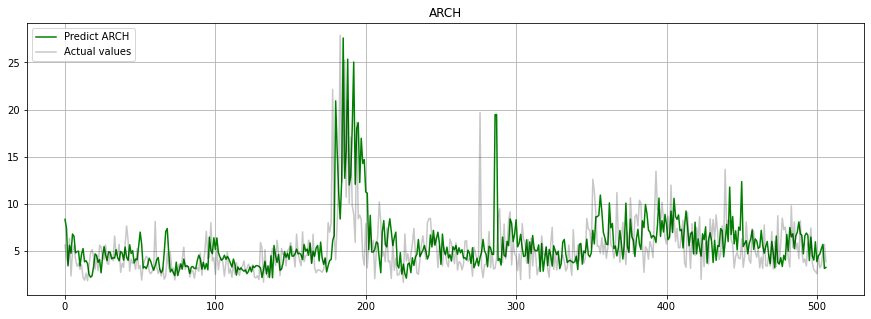

In [60]:
# example of ARCH model
from random import gauss
from random import seed
from matplotlib import pyplot
from arch import arch_model
# seed pseudorandom number generator
# create dataset
#data = [gauss(0, i*0.01) for i in range(0,100)]
# split into train/test
predict = []
test = []
for i in range(507,0,-1):
    data = (df.HIGH - df.LOW)[-i-20:-i]
    n_test = 1
    train = data[:-n_test-1]
    # define model
    model = arch_model(train, mean='Zero', vol='ARCH', p=10)
    # fit model
    model_fit = model.fit()
    # forecast the test set
    yhat = model_fit.forecast(horizon=n_test)
    # plot the actual variance
    #var = [i*0.01 for i in range(0,100)]
    predict.append(np.sqrt(np.array(yhat.variance.values[-1, :])))
    test.append(data[-1:])
    #pyplot.plot(test.values)
    # plot forecast variance
    #pyplot.plot(np.sqrt(np.array(yhat.variance.values[-1, :])), color='r')
    #pyplot.show()
    #tmp = 
plt.figure(figsize=(15,5))
plt.title("ARCH")
plt.plot(predict, "g", label="Predict ARCH")
plt.plot(test, "#0a0b0c3a",label="Actual values")
plt.legend(loc="upper left")
plt.grid(True)
error = mean_squared_error(test, predict)
print('Test MSE: %.3f' % error)
print(len(test))

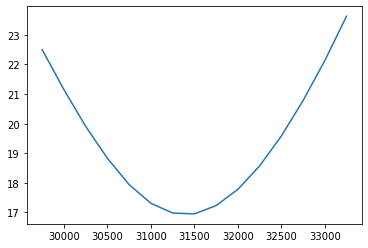

In [36]:
#spot=31.575
plt.plot(option.A,option.B)
plt.show()

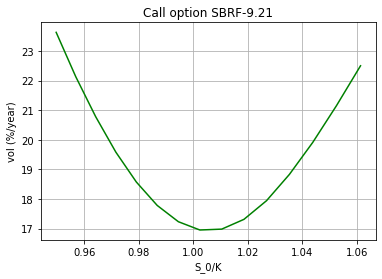

In [53]:
x = 31575/option.A
y = option.B
fig, ax = plt.subplots()
plt.title("Call option SBRF-9.21")
ax.plot(x, y, c = 'g')
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel('S_0/K')
ax.set_ylabel('vol (%/year)')

plt.show()

NameError: name 'ax' is not defined

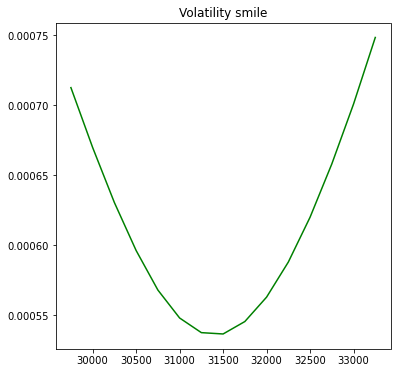

In [43]:
plt.figure(figsize=(6,6))
plt.title("Volatility smile")
plt.plot(option.A,(option.B/31575), "g")
ax.set_xlabel('время (с)')
ax.set_ylabel('скорость (м/с)')
plt.grid(True)

In [33]:
opt = pd.read_csv("option.csv",sep=',')
option = pd.DataFrame(opt)
print(option)

          A      B
0   29750.0  22.50
1   30000.0  21.15
2   30250.0  19.91
3   30500.0  18.83
4   30750.0  17.94
5   31000.0  17.31
6   31250.0  16.98
7   31500.0  16.95
8   31750.0  17.23
9   32000.0  17.78
10  32250.0  18.57
11  32500.0  19.58
12  32750.0  20.78
13  33000.0  22.13
14  33250.0  23.63
